<!-- # Table of Contents
* [Introduction](#Introduction)
* [Data Preparation and Cleaning](#Data-Preparation-and-Cleaning)
  * [Importing the Data](#Importing-the-Data)
  * [Duplicate and Missing Values](#Duplicate-and-Missing-Values)
  * [Observations and Features](#Observations-and-Features)
  * [Outliers](#Outliers)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Distribution of Features](#Distribution-of-Features)
  * [Distribution of Features by Category](#Distribution-of-Features-by-Category)
* [Correlation Analysis](#Correlation-Analysis)
* [](#)
* [Summary](#Summary) -->

\newpage
# Introduction

This report presents an exploratory data analysis (EDA) of job posting data collected throughout 2025. The primary goal is to identify the most required programming languages in the current labor market and understand how these requirements shift across different professional specializations. By analyzing the intersection of job titles and required programming languages, I will aim to provide some insights into the most popular programming languages defining the industry in the year 2025.

The initial raw data was gained from a large-scale coresignal jobs data, totaling approximately 60 million global job postings. The analyzed data set used in this report consists of 34 features and around 600 000 observations, ranging from January 1st, 2025, to December 19, 2025. For a detailed breakdown of the features, please refer to the @tbl-dictionary.

| Variable Name    | Type     | Description |
| -------------    | -------  | ----------- |
|  title           | STRING   | The professional title of the job listing.|
|  [manager, engineer, analyst, scientist, developer] | BOOL  | A flag indicating if the role is categorized as a management, engineering, analyst, scientist, developer role.|
| company_name     | STRING   | The name of the hiring organization. | 
| company_industry | STRING   | The sector the company operates in (e.g., Tech, Finance).|
| state            | STRING   | The US state of the job location.|
| created_at       | TIMESTAMP| The date when the job listing was added to the database.| 
| [Python, SQL, ...] | TIMESTAMP| Individual flags for 22 languages (e.g., Python, SQL, ...) indicating if the role listing ask experience in that role.| 

: The description of variables for data. {#tbl-dictionary}

# Data Preparation and Cleaning

For data preparation and cleaning please refer to "Appendix 1: Preparing the data set." It will give the detailed look into how the data frame that I will analyse here was prepared. 

A preview of the analysed dataset is presented below in @tbl-preview-1, @tbl-preview-2, @tbl-preview-3.

In [1]:
#| include: false
import sys
import os
import warnings

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
import plotly.io as pio

pio.renderers.default = "notebook_connected"
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#| include: false
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.feature_utils import (create_faang_df,
                               create_mango_df,
                               get_dominant_language_by_state)
from src.viz_utils import (plot_language_distribution_by_language,
                           plot_language_market_share,
                           plot_us_hiring_heatmap,
                           plot_us_language_dominance)

In [3]:
#| include: false
plt.style.use("fast")
plt.rcParams.update({
    "font.family": "Avenir",       
    "text.color": "#130f35",
    "axes.labelcolor": "#130f35",
    "xtick.color": "#130f35",
    "ytick.color": "#130f35",
    "figure.facecolor": "none",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.facecolor": "none",
    "axes.facecolor": "none",
    "savefig.transparent": True,
    "figure.autolayout": True
})

oxylab_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap", ["#130f35", "#52A8F8", "#23E6A8"]
)

In [4]:
#| label: tbl-preview-1
#| tbl-cap: "Raw data pre-view first 5 rows(part 1)"

df = pd.read_csv("../data/processed/jobs_filtered_2025_no_desc.csv")
df["created_at"] = pd.to_datetime(df["created_at"], format="mixed", utc=True)
df.rename(columns={"Go_verified": "Go"}, inplace=True)
print(df.shape)
df[["title", "company_name", "company_industry", "state", "created_at"]].head()


(581120, 33)


,title,company_name,company_industry,state,created_at
0,"Senior Manager, Capacity Engineering, North Am...",Amazon,Software Development,Tennessee,2025-09-10 20:07:14.383757+00:00
1,Business Intelligence Engineer,IntelliSavvy,IT Services and IT Consulting,Washington,2025-09-22 12:07:27.958388+00:00
2,HAZARDOUS SUBSTANCES ENGINEER,California Department of Toxic Substances Control,Environmental Services,California,2025-06-04 00:17:34+00:00
3,Senior ASIC Synthesis Engineer,NVIDIA,Computer Hardware Manufacturing,California,2025-07-02 06:12:14+00:00
4,Product Security Engineer,Grammarly,Software Development,California,2025-08-14 07:03:47.996797+00:00


In [5]:
#| label: tbl-preview-2
#| tbl-cap: "Raw data pre-view first 5 rows(part 2)"

df[["title", "manager", "engineer", "analyst", "scientist", "developer"]].head()

,title,manager,engineer,analyst,scientist,developer
0,"Senior Manager, Capacity Engineering, North Am...",1,1,0,0,0
1,Business Intelligence Engineer,0,1,0,0,0
2,HAZARDOUS SUBSTANCES ENGINEER,0,1,0,0,0
3,Senior ASIC Synthesis Engineer,0,1,0,0,0
4,Product Security Engineer,0,1,0,0,0


In [6]:
#| label: tbl-preview-3
#| tbl-cap: "Raw data pre-view first 5 rows(part 3)"

df[["title", "Python", "SQL", "JavaScript", "Java", "C#", "C++"]].head()

,title,Python,SQL,JavaScript,Java,C#,C++
0,"Senior Manager, Capacity Engineering, North Am...",1,1,0,0,0,0
1,Business Intelligence Engineer,1,1,0,0,0,0
2,HAZARDOUS SUBSTANCES ENGINEER,0,0,0,0,0,0
3,Senior ASIC Synthesis Engineer,1,0,0,0,0,0
4,Product Security Engineer,1,0,1,1,0,0


## Observations and Features

This section begins the detailed exploration of the dataset's structure. I will examine the characteristics of each column to ensure data integrity and understand the available information.

Specifically, for categorical features (like "title", "company_name", "company_industry", "state"), I'll identify the distinct categories present and count the number of unique observations in each. This step confirms the data types and prepares us for subsequent analysis. Below you can see the breakdown of each type.

In [7]:
prog_languages = df.columns.tolist()[10:-1]
cat_cols = ["title", "company_name", "company_industry", "state", "broad_industry_group"]
date_cols = ["created_at"]
jobs_cols = df.columns.tolist()[1:6]
print("Programming languages: ", prog_languages)
print("Categorical features: ", cat_cols)
print("Date features: ", date_cols)
print("Job titles: ", jobs_cols)

Programming languages:  ['Python', 'SQL', 'Java', 'JavaScript', 'TypeScript', 'C++', 'C#', 'Objective-C', 'C', 'R', 'Swift', 'PHP', 'Ruby', 'Kotlin', 'Rust', 'Matlab', 'Scala', 'Perl', 'Dart', 'Bash', 'Assembly', 'Go']
Categorical features:  ['title', 'company_name', 'company_industry', 'state', 'broad_industry_group']
Date features:  ['created_at']
Job titles:  ['manager', 'engineer', 'analyst', 'scientist', 'developer']


In total 22 programing languages are present in the data set. The categotical information about the jobs data is title, company_name, company_industry, state, broad_industry_group.
The date when the job posting was created is in the created_at column. And if the particular job posting is searching for a manager, engineer, analyst, scientist, developer.

> NOTE:
> Keep in mind that job posting can be in multiple job title categories, like scientist and analyst, as well as single job posting can ask experience in multiple programming languages.

## Outliers


> NOTE:
>
> Outliers were mainly handaled in Appendix 1. Please refer to the corresponding notebook/report for more details. The `extract_programming_languages` function utilizes the Ollama Large Language Model (LLM) to identify the meaning of the word "Go", "C", "R", and "Assembly". This means the categorization is not completely accurate. This was nessesessary because word "Go" could either be an english verb or the programming lanuage, also some programming languages might have some false positives, due to the typos in the job descriptions like "C omplety" or "R espocible". 

From the tables @tbl-description-cat and tbl-description-date we see there is not so much additional improvements we could do, we perhaps could fix some typos in the data but that will not be so crucial for this analyses. 

In [8]:
#| label: tbl-description-cat
#| tbl-cap: "Description of the categorical data"
df[cat_cols].describe()

,title,company_name,company_industry,state,broad_industry_group
count,581120,575457,519357,435424,581120
unique,269843,56935,384,54,11
top,Software Engineer,Jobs via Dice,Software Development,California,"Tech, Data & Telecom"
freq,4146,32099,112922,79214,256058


From this we can see that there are 54 states in US, which includes states and US territories.

In [9]:
#| label: tbl-description-date
#| tbl-cap: "Description of the date when job posting was created data."
df[date_cols].describe()

,created_at
count,581120
mean,2025-07-16 18:30:15.418261248+00:00
min,2025-01-01 00:14:36+00:00
25%,2025-05-06 01:13:53+00:00
50%,2025-07-29 07:03:16.500000+00:00
75%,2025-10-08 02:06:08.401540352+00:00
max,2025-12-19 02:45:18.817379+00:00


# Exploratory Data Analysis

This section presents the Exploratory Data Analysis (EDA) of the 2025 US job market for tech jobs. The goal is to identify patterns and trends within the job postings. The analysis begins with a general overview of the dataset, including the total number of observations and key features. This initial phase identifies the most common programming languages, the primary industries hiring for tech roles, and the organizations with the highest volume of postings. We also examine the timing of these posts to identify potential hiring seasons and pinpoint which geographic states are leading in tech employment.

## Distribution of Features

Understanding the foundational characteristics of the data is the first step. This part of the report covers:

- Dataset Volume: A summary of the total jobs analyzed.

- Language Popularity: An absolute and percentage-based ranking of the 24 identified programming languages.

- Industry and Company Presence: Identification of the sectors and specific employers driving the most activity.

- Temporal and Geographic Trends: A look at hiring cycles throughout 2025 and the states with the highest density of tech opportunities.




### Distribution of the Programming languages

Let's see what languages were the most popular in 2025. We can see that Python, SQL, Java, JavaScript, and C++ takes the top 5, for the full list see the @tbl-pop-langs. 

In [10]:
#| label: tbl-pop-langs
#| tbl-cap: "The most mentioned programming languages in 2025."
PRECISION_C = 0.32
PRECISION_R = 0.64
PRECISION_ASSEMBLY = 0.15


df_count = pd.DataFrame(df[prog_languages].sum())
df_count.columns = ["count"]
df_count[df_count.index == "C"] = df_count[df_count.index == "C"] * PRECISION_C 
df_count[df_count.index == "R"] = df_count[df_count.index == "R"] * PRECISION_R 
df_count[df_count.index == "Assembly"] = df_count[df_count.index == "Assembly"] * PRECISION_ASSEMBLY 
df_count["count"] = df_count["count"].astype(int)
df_count = df_count.sort_values(by="count", ascending=False)
df_count["percentage"]= 100* df_count["count"]/len(df)
df_count.round(2)

,count,percentage
Python,270961,46.63
SQL,257769,44.36
Java,118985,20.48
JavaScript,107389,18.48
C++,67077,11.54
Bash,64001,11.01
C#,52780,9.08
TypeScript,42748,7.36
R,34793,5.99
Go,27765,4.78


In [11]:
#| include: false
top_10_langs = df_count.index.to_list()[:10]
top_10_langs 

['Python',
 'SQL',
 'Java',
 'JavaScript',
 'C++',
 'Bash',
 'C#',
 'TypeScript',
 'R',
 'Go']

(<Figure size 960x576 with 1 Axes>,
 <Axes: title={'center': 'In-Demand Programming Languages: 2025 Market Share'}, xlabel='Programming Language', ylabel='Percentage of Total Job Postings (%)'>)

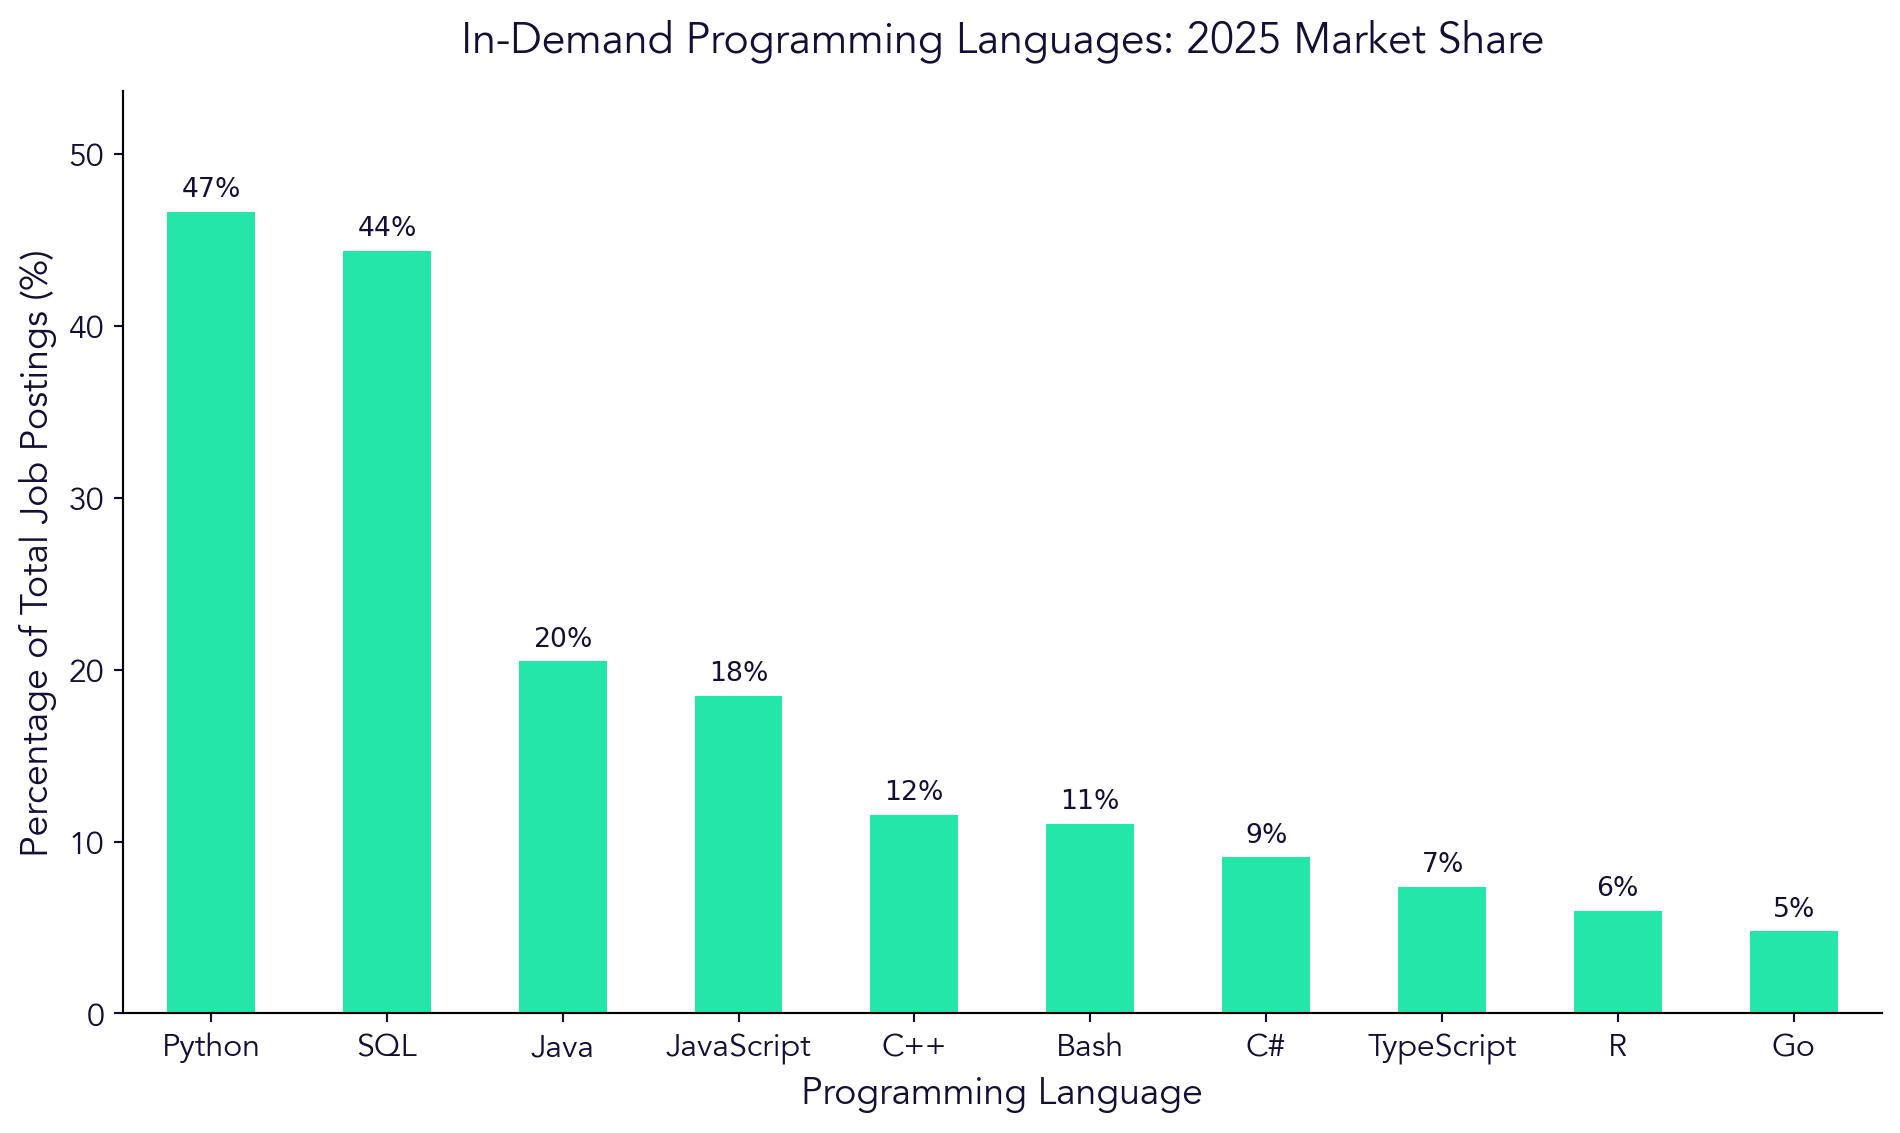

In [12]:
#| label: fig-pop-langs
#| fig-cap: "The most mentioned programming languages in 2025."

multipliers = {
    "C": PRECISION_C,
    "R": PRECISION_R,
    "Assembly": PRECISION_ASSEMBLY
}

plot_language_market_share(df, prog_languages, multipliers)

From the analysis of the 2025 job postings, we can see that Python and SQL are the most prominent requirements, mentioned in 47% and 44% of listings, respectively. This highlights a continued industry-wide focus on automation and data management.

Java and JavaScript follow in the third and fourth positions, appearing in 20% and 18% of roles, indicating their stable role in enterprise and web development. The mid-tier languages show a competitive landscape, with C++ at 12% and Bash at 11%.

The remaining top languages—C# (9%), TypeScript (7%), R (6%), and Go (5%)—represent specialized yet significant segments of the hiring market. These results demonstrate that while the "Big Two" dominate, a diverse set of technical skills remains necessary across the IT sector.

What people might miss here is C, but it takes 4% of share and scores the 11th place.

### Distribution of Job Titles by Job Type

In this section, we examine the distribution of job postings across primary professional categories. Based on the data visualized in @fig-job-titles, there is a clear and substantial demand for technical roles, particularly within the engineering domain.

Engineers represent the majority of the market share at 59%, significantly outpacing other roles. Developers and Analysts follow with a combined market share of 32% (at 16% each). Specialized roles such as Scientists and Managers constitute the remaining 5% and 4% of the postings, respectively. These findings suggest that for the 2025 hiring landscape, companies are prioritizing the foundational technical infrastructure provided by engineering talent.

In [13]:
df[jobs_cols].sum(axis=0).sort_values(ascending=False)

engineer     343827
developer     95714
analyst       92908
scientist     28481
manager       22698
dtype: int64

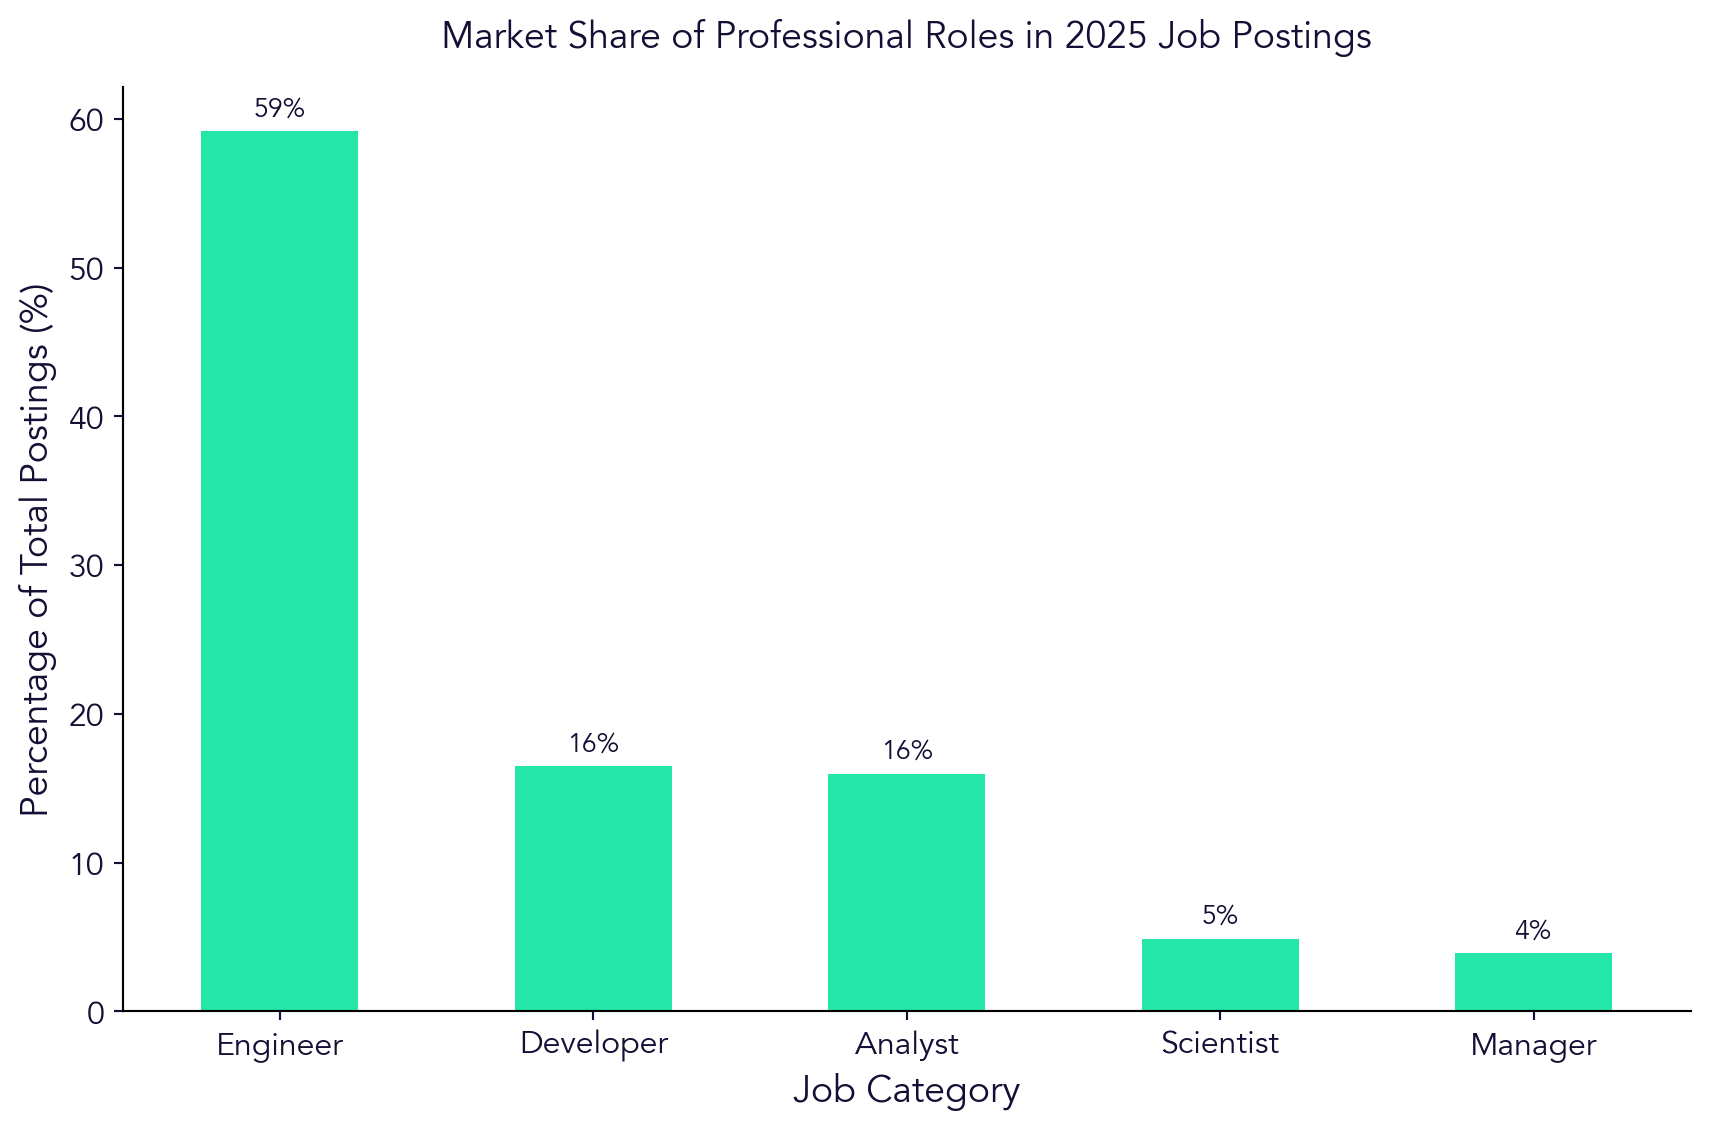

In [14]:
#| label: fig-job-titles
#| fig-cap: "Distribution of job titles in 2025 in job postings."

role_counts = df[jobs_cols].sum()
total_postings = len(df)
role_percentages = (role_counts / total_postings) * 100
role_percentages = role_percentages.sort_values(ascending=False)
role_percentages.index = [col.title() for col in role_percentages.index]

ax = role_percentages.plot(
    kind="bar",
    color="#23E6A8",
    figsize=(9, 6)
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%", padding=3)

ax.set_title("Market Share of Professional Roles in 2025 Job Postings", fontsize=14)
ax.set_ylabel("Percentage of Total Postings (%)")
ax.set_xlabel("Job Category")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribution of Company Names

In this section, we examine the leading organizations driving the demand for technical talent in the United States. While the tech landscape is vast and diverse, a small group of industry giants and specialized platforms accounts for a significant portion of total hiring activity.

From @fig-dist-companies, we can observe that Job via Dice maintains a commanding presence, representing 6% of the entire tech job market in the USA. This high volume highlights the platform's role as a primary aggregator for technical specialized roles.

When analyzing the "Big Tech" sector specifically, Amazon, Microsoft, Google, and Apple all appear within the top 20 hiring entities. However, only Amazon and Google secure spots within the top 10, each accounting for approximately 1% of the total market share. This data suggests that while these tech behemoths are influential, the market remains highly fragmented, with a significant amount of hiring distributed across thousands of mid-sized firms and diverse industry sectors.

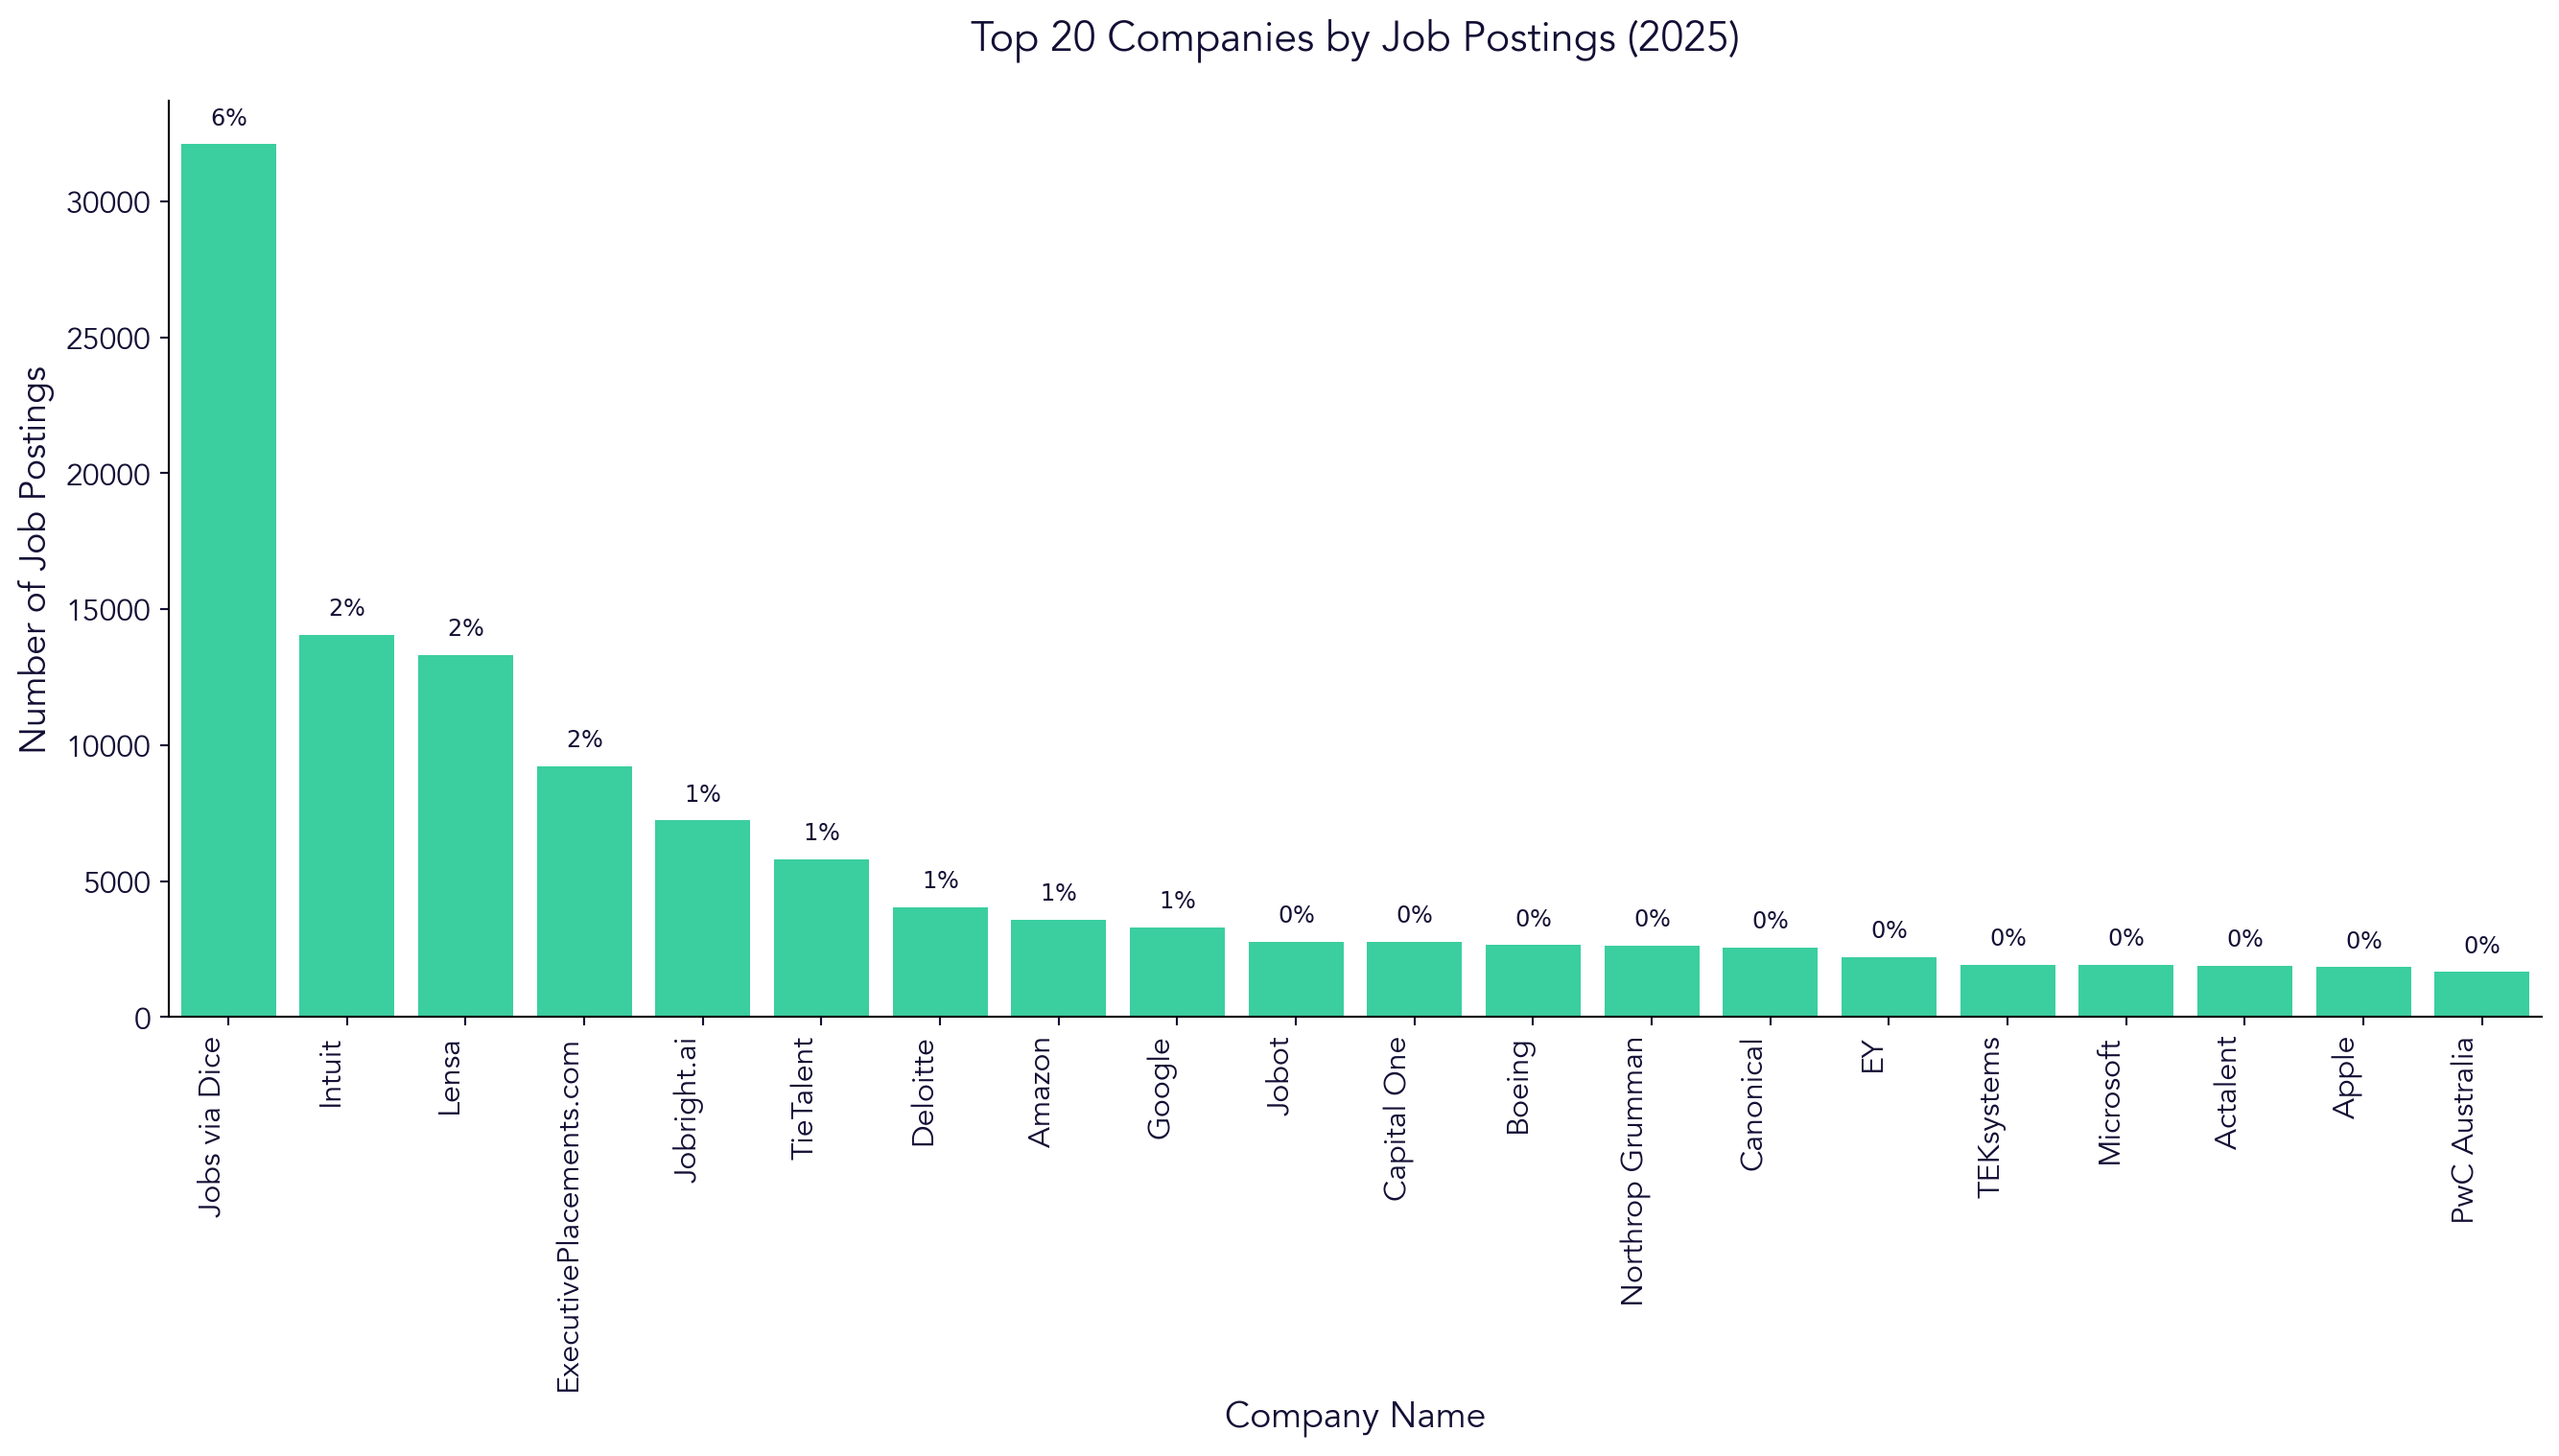

In [15]:
#| label: fig-dist-companies
#| fig-cap: "Barplot of the most mentioned companies in 2025 in job postings."

total_jobs = len(df)

top_companies = df["company_name"].value_counts().nlargest(20).index
subset = df[df["company_name"].isin(top_companies)]

plt.figure(figsize=(14, 8))
ax = sns.countplot(
    data=subset, 
    x="company_name", 
    order=top_companies, 
    color="#23E6A8"
)

for p in ax.patches:
    count = int(p.get_height())
    percentage = (100 * count) / total_jobs
    label = f"${percentage:.0f}\\%$"
    
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", 
        va="bottom",
        xytext=(0, 5), 
        textcoords="offset points",
        fontsize=9
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title("Top 20 Companies by Job Postings (2025)", pad=20)
plt.xlabel("Company Name")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90, ha="right")

plt.tight_layout()
plt.show()

### Distribution of Industries

In this section, we analyze the distribution of technology-related roles across various economic sectors. Understanding where demand originates provides critical context for the current hiring landscape and identifies the primary drivers of technical growth.

Based on the data visualized in @fig-dist-broad-industries, the Tech, Data & Telecom industry remains the dominant force, accounting for 44% of all professional requirements. This sector continues to outpace all others, reinforcing its role as the primary engine for tech employment.

Outside of the core technology sector, the demand is significantly more distributed. Professional, Legal & Business Services follow with a 14% market share, while Manufacturing, Industrial & Defense represents 10% of the postings. The Finance, Insurance & Real Estate (FinTech) sector accounts for 8%, highlighting a stable need for technical expertise in modernizing financial infrastructure. Notably, all other industries each represent less than 3% of the market share, indicating a high concentration of tech talent within the top four sectors.

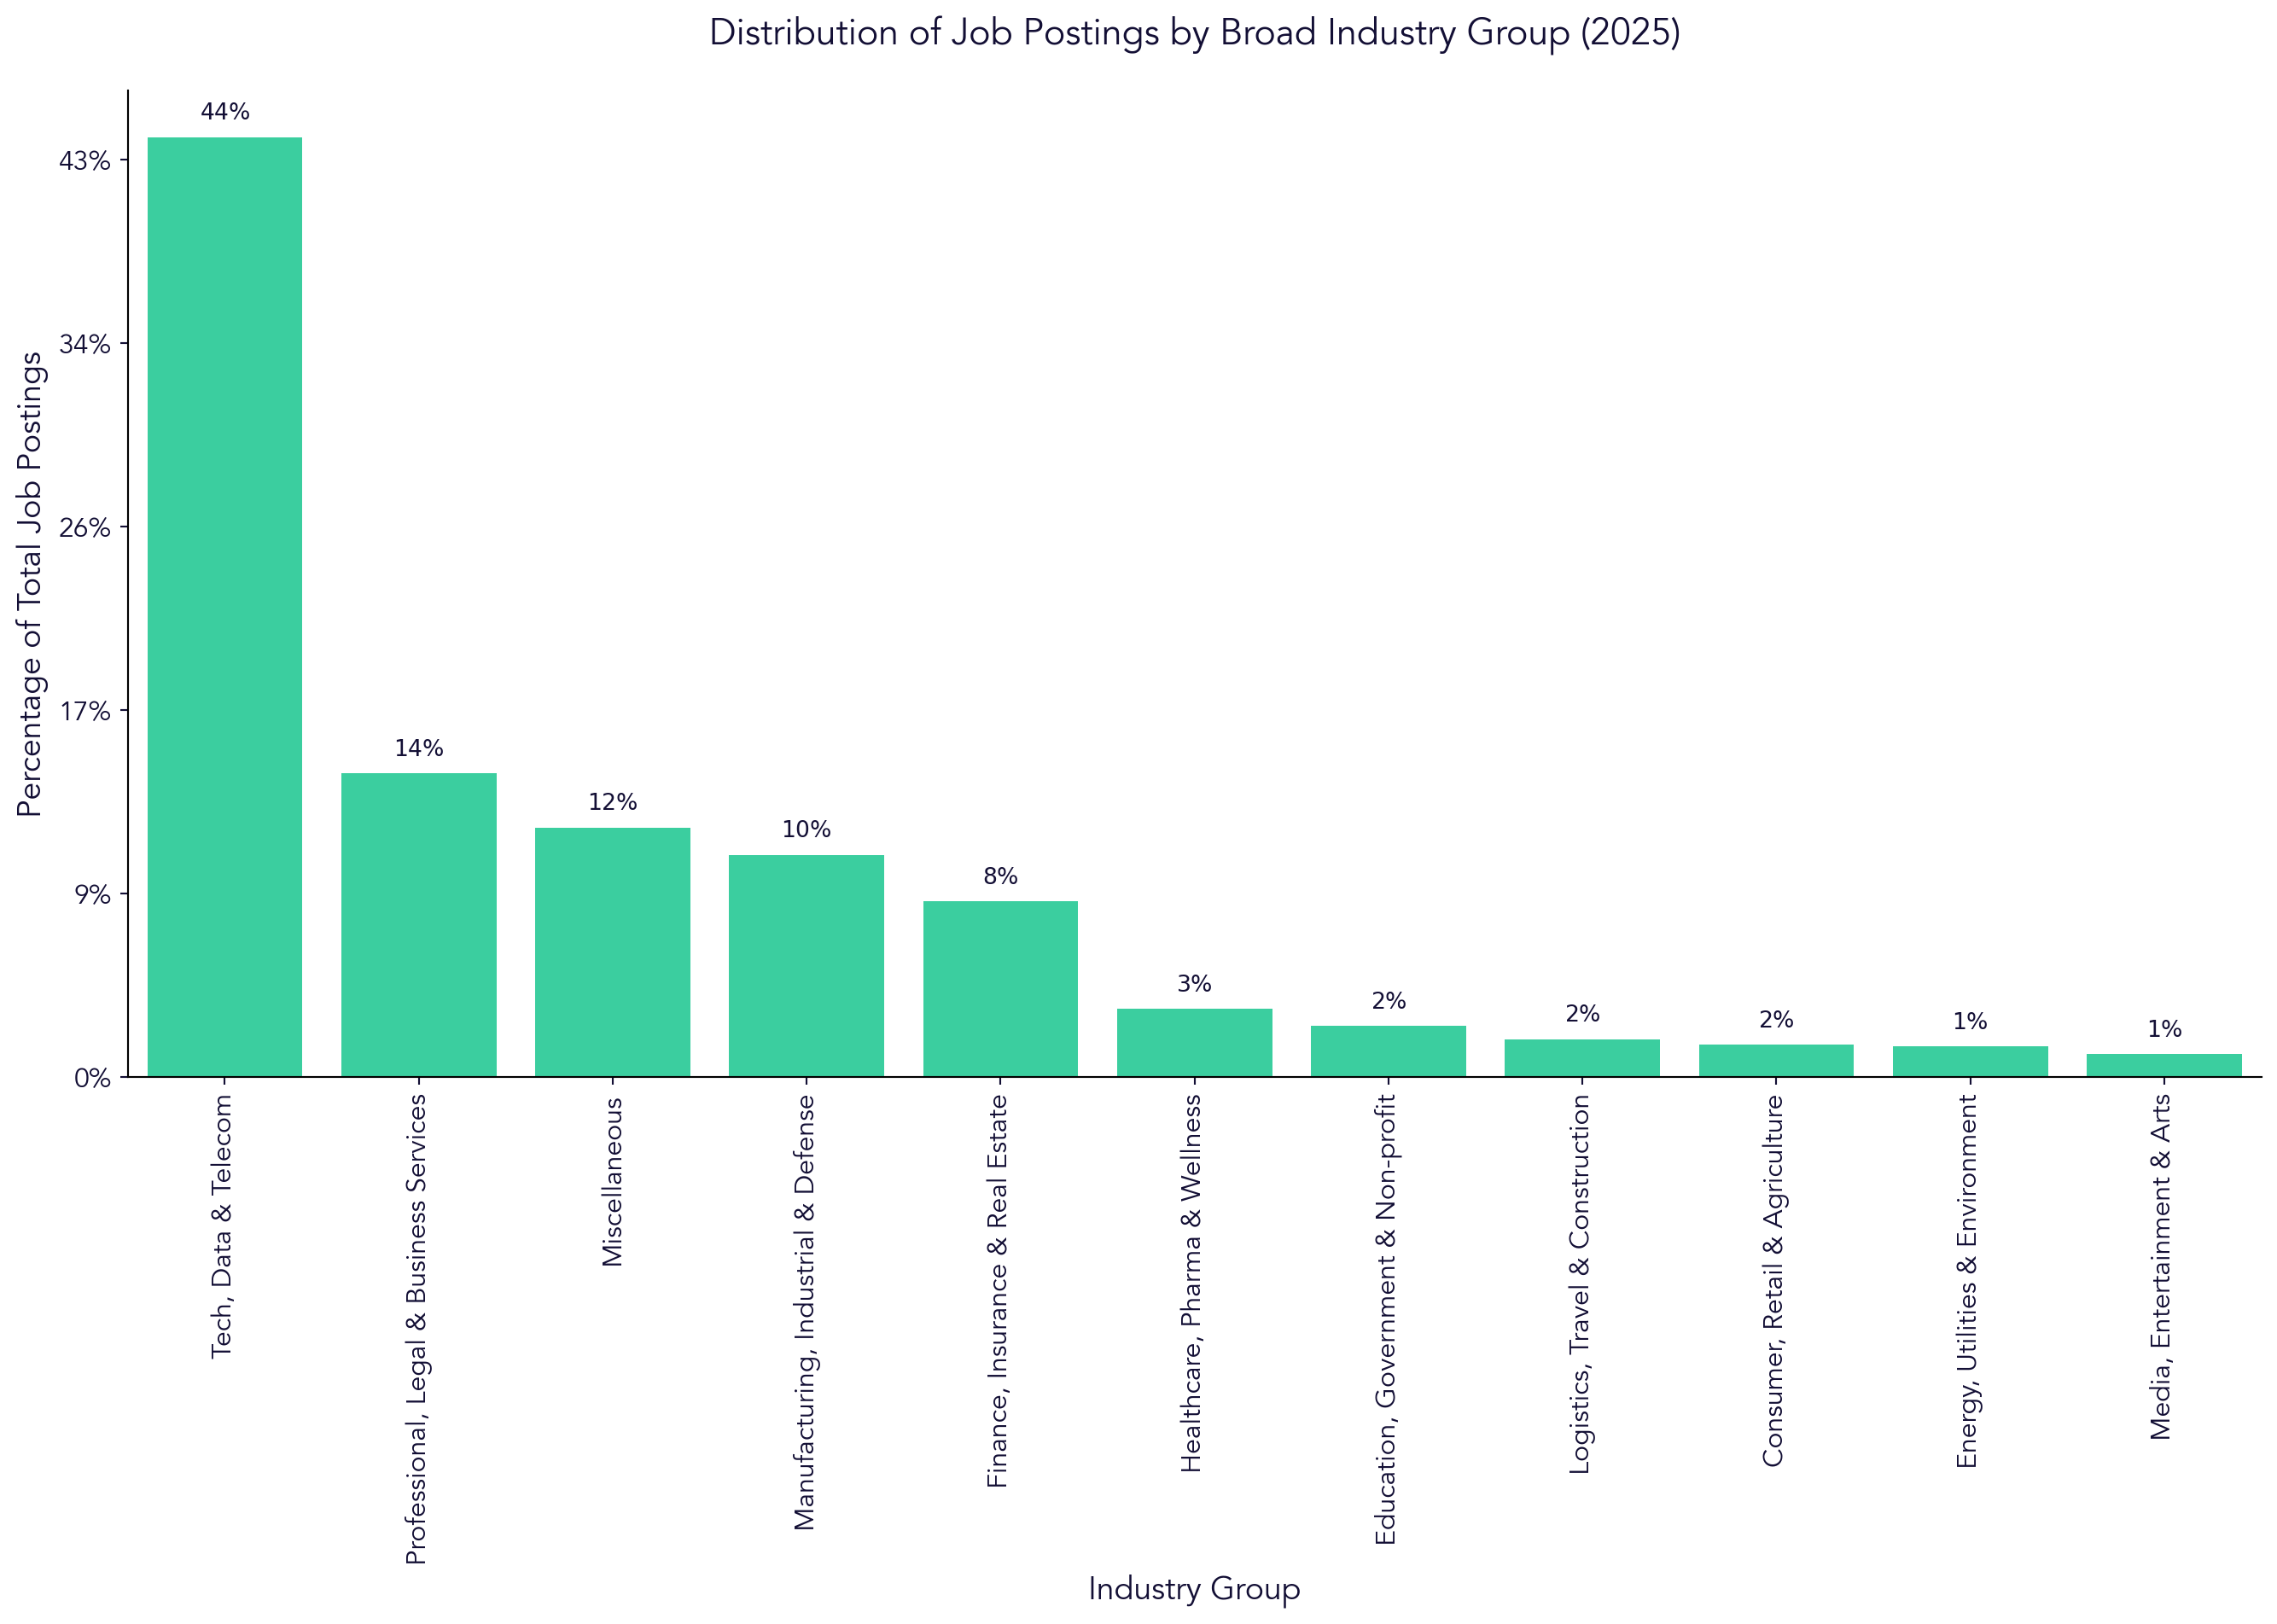

In [16]:
#| label: fig-dist-broad-industries
#| fig-cap: "Barplot of the most mentioned broad industries in 2025 in job postings."

top_industries = df["broad_industry_group"].value_counts().nlargest(15).index
subset = df[df["broad_industry_group"].isin(top_industries)]

plt.figure(figsize=(14, 10))
ax = sns.countplot(
    data=subset, 
    x="broad_industry_group", 
    order=top_industries, 
    color="#23E6A8"
)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs
   
    label = f"${percentage:.0f}\\%$"
    
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center", 
        va="bottom",
        xytext=(0, 5), 
        textcoords="offset points",
        fontsize=10,
        fontweight="bold"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%"))
plt.ylabel("Percentage of Total Job Postings")
plt.title("Distribution of Job Postings by Broad Industry Group (2025)", pad=20)
plt.xlabel("Industry Group")


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Below @dist-company-industries you can see the raw  distribution of the top 20 industries that are not cleaned, just for the sake of understanding the raw data.

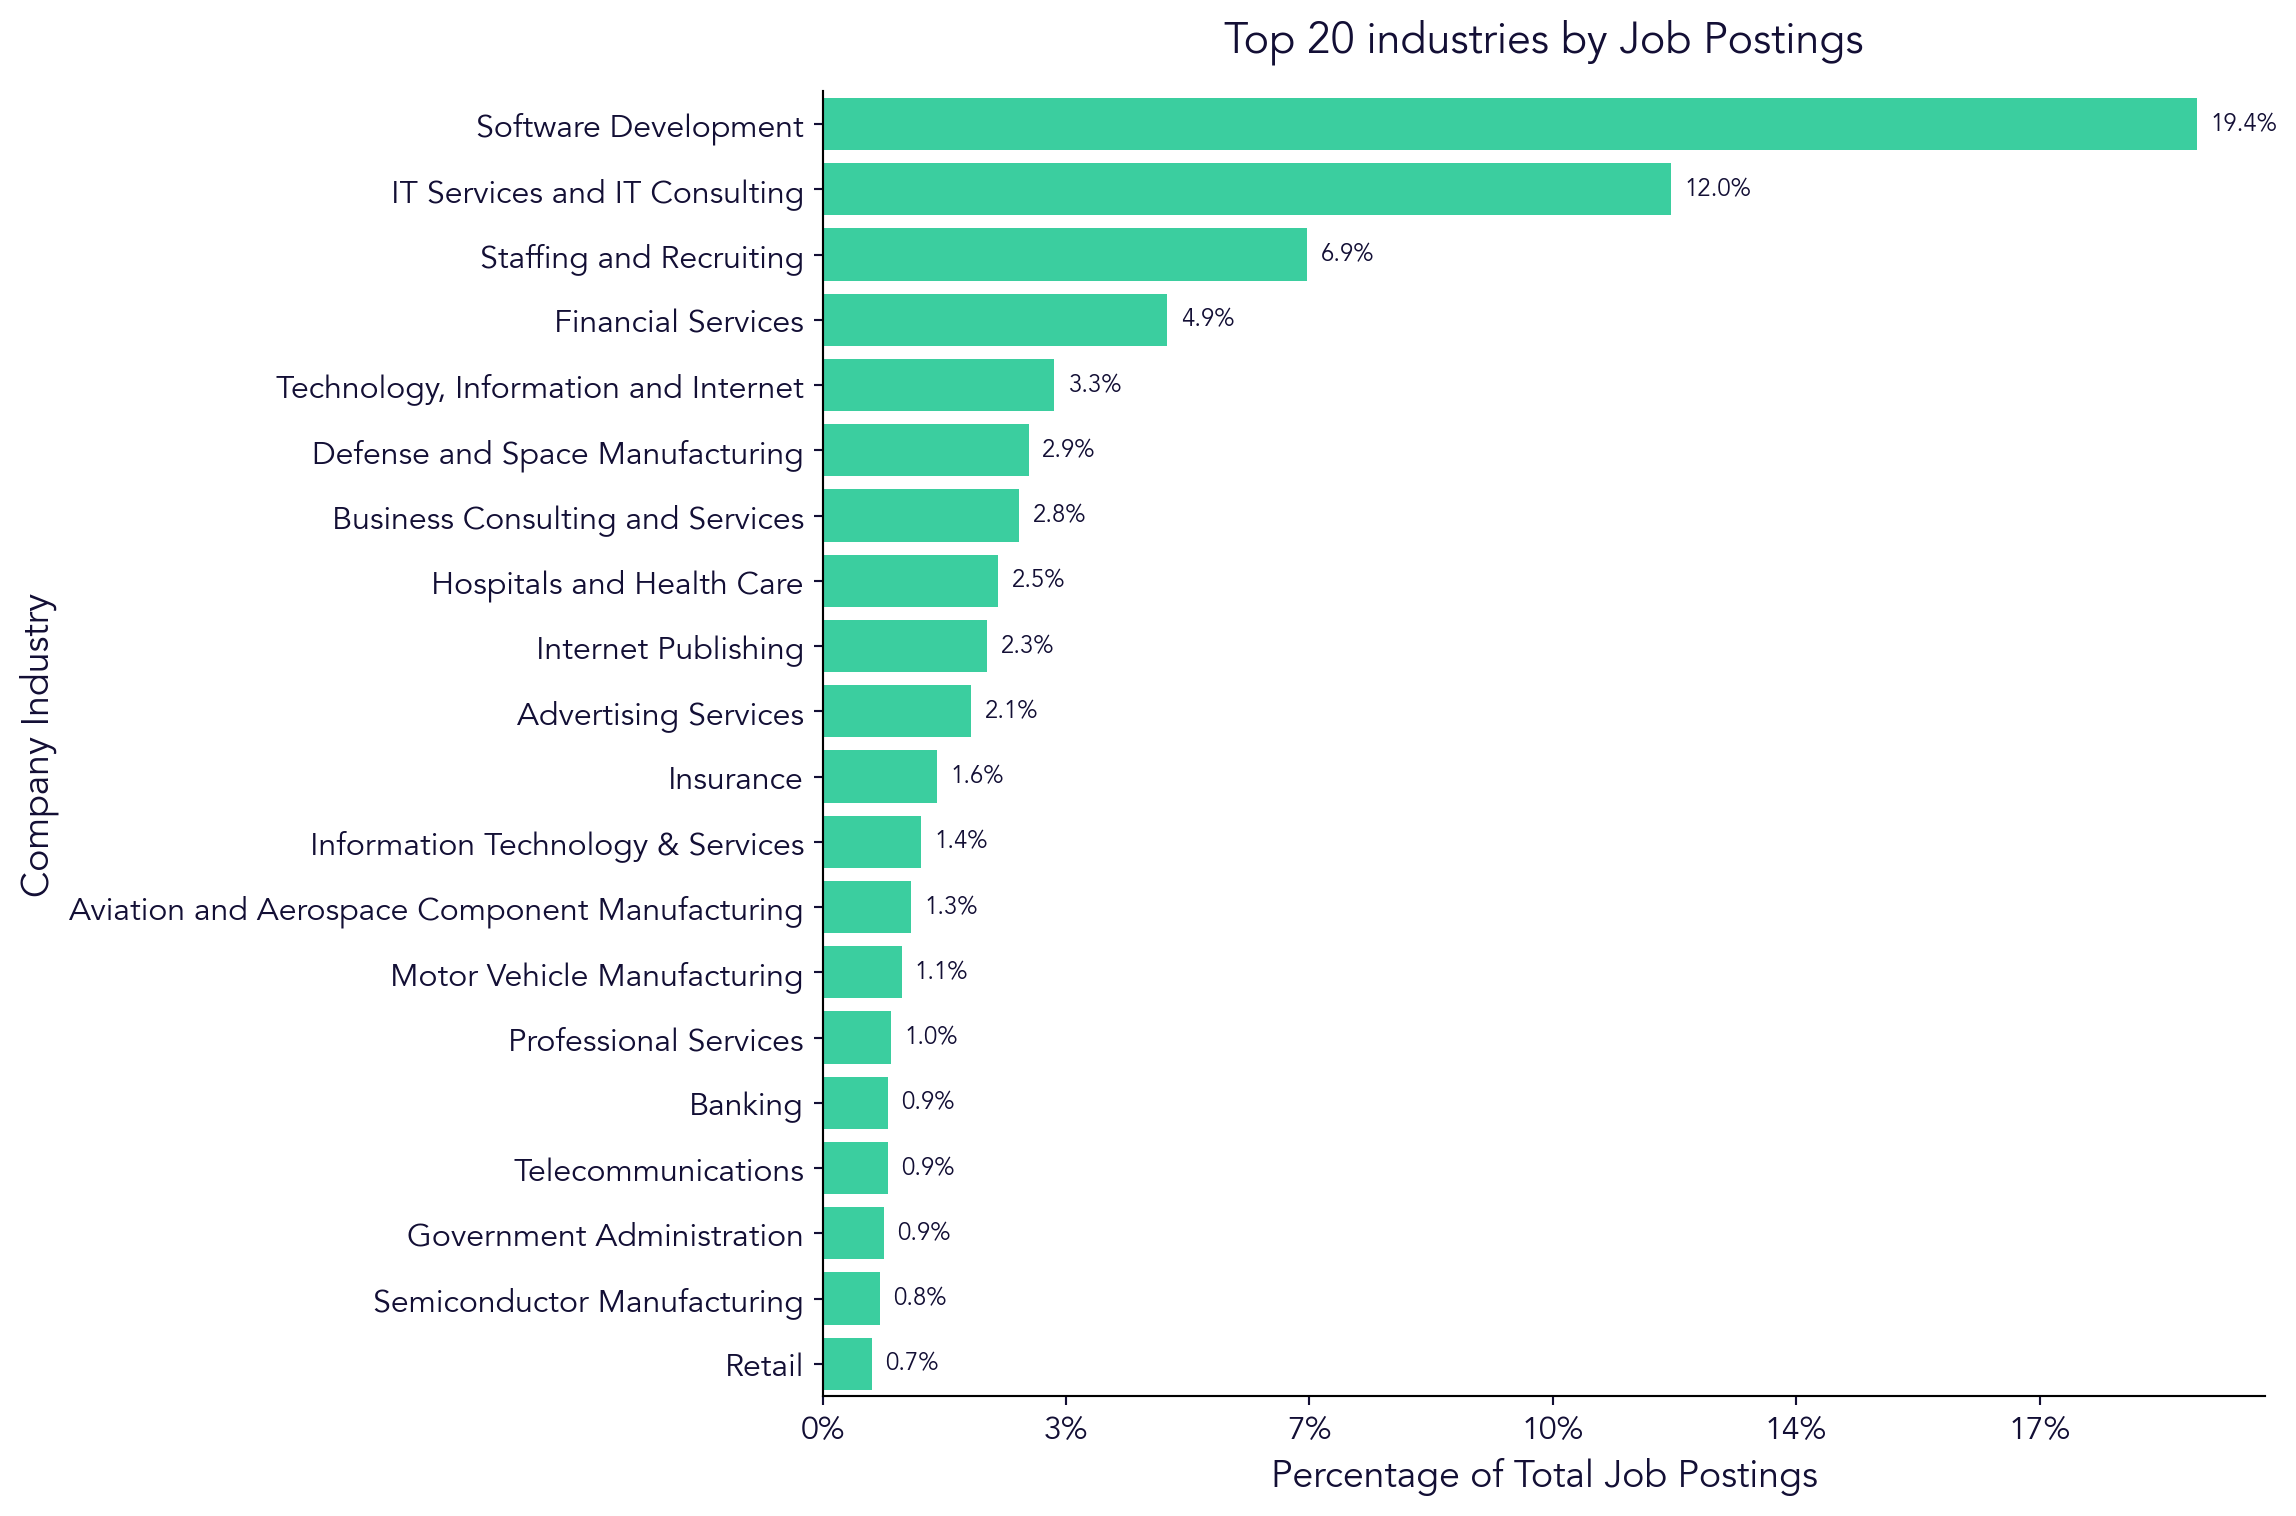

In [17]:
#| label: fig-dist-company-industries
#| fig-cap: "Barplot of the most mentioned raw company industries in 2025 in job postings."

top_industries = df["company_industry"].value_counts().nlargest(20).index
subset = df[df["company_industry"].isin(top_industries)]

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=subset, y="company_industry", order=top_industries, color="#23E6A8")

for p in ax.patches:
    count = int(p.get_width())
    percentage = 100 * count / total_jobs
    ax.annotate(
        f"{percentage:.1f}%",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        xytext=(5, 0),
        textcoords="offset points",
        va="center",
        fontsize=9,
    )

ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%"))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Percentage of Total Job Postings")

plt.title("Top 20 industries by Job Postings")
plt.ylabel("Company Industry")
plt.tight_layout()
plt.show()

### Distribution of States

In this section, we analyze the geographic distribution of tech talent demand across the United States. Identifying these "hiring hubs" allows us to understand the regional concentrations of the digital economy and where companies are focusing their recruitment efforts.

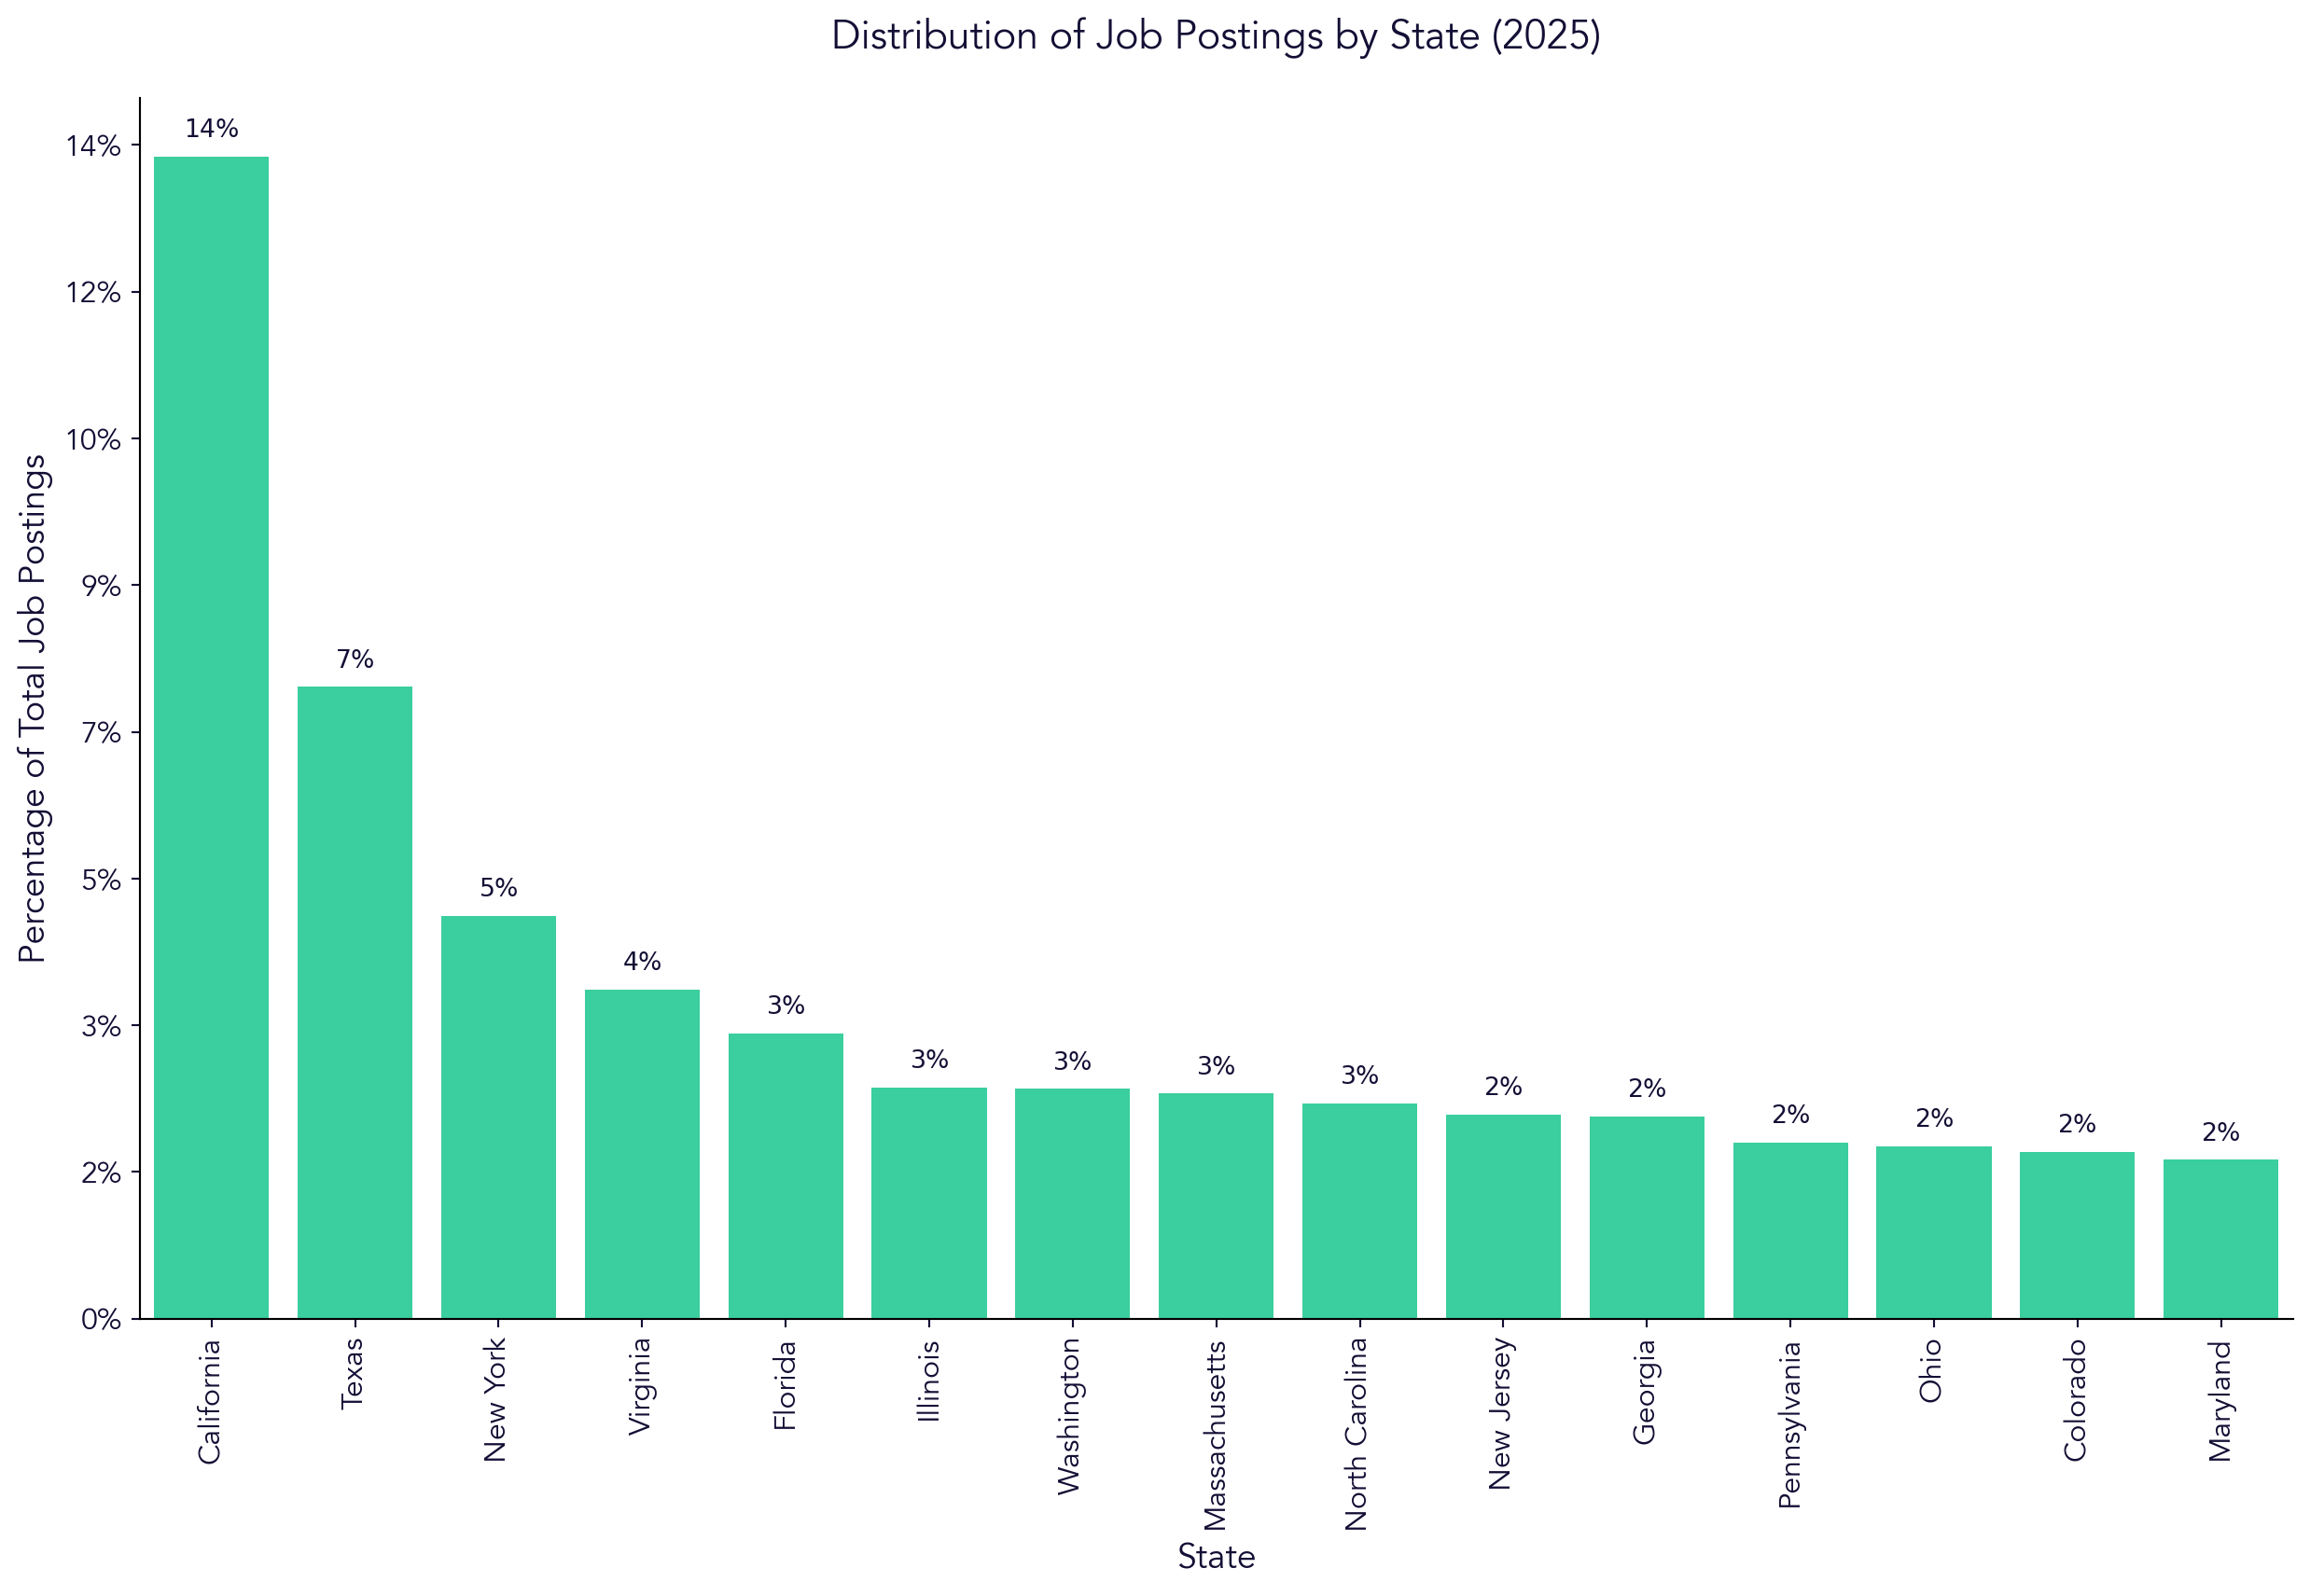

In [18]:
#| label: fig-dist-states
#| fig-cap: "Distribution of job postings by state in 2025."

top_states = df["state"].value_counts().nlargest(15).index
subset = df[df["state"].isin(top_states)]

plt.figure(figsize=(13, 9))
ax = sns.countplot(
    data=subset, 
    x="state", 
    order=top_states, 
    color="#23E6A8"
)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs
   
    label = f"${percentage:.0f}\\%$"
    
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center", 
        va="bottom",
        xytext=(0, 5), 
        textcoords="offset points",
        fontsize=10,
        fontweight="bold"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%"))

plt.ylabel("Percentage of Total Job Postings")

plt.title("Distribution of Job Postings by State (2025)", fontsize=16, pad=20)
plt.xlabel("State")


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [19]:
state_to_code = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
    "District of Columbia": "DC"
}

df["state_clean"] = df["state"].str.strip().str.title()
df["state_code"] = df["state_clean"].map(state_to_code)
state_counts = df["state_code"].value_counts().reset_index()
state_counts.columns = ["state_code", "counts"]

plot_us_hiring_heatmap(state_counts, total_jobs, "us_hiring_map_by_state")

![2025 US Job Market. Regional Demand Distribution](../outputs/figures/us_hiring_map_by_state.png){#fig-map-hiring width="90%"}

Based on the data visualized in @fig-dist-states and @fig-map-hiring, California remains the primary driver of technical employment, accounting for 14% of all job postings. Texas follows closely as the second-largest market, reinforcing its status as a significant and growing center for technology and innovation. New York has the third-largest market taking up 5% of all postings. Together, these three states represent a substantial portion of the national demand. 

For a more granular view of regional trends, an interactive heatmap is available in the project files at `outputs/figures/us_hiring_map.html`. This interactive asset allows for state-by-state comparisons and provides specific market share details for each territory.

### Distribution of Job Posting Times

In this section, we analyze the seasonal variations in hiring activity throughout 2025. Understanding these temporal peaks is essential for the PR team to align media pitches with the periods of highest market engagement.

Based on the data visualized in @fig-monthly-dist, the hiring landscape exhibits a distinct "double peak" pattern. The highest volume of activity occurs in August and November, with each month accounting for 13% of the total annual postings. These surges likely correspond to the conclusion of the summer period and the finalization of year-end technical projects, respectively. Identifying these windows allows our department to release targeted content when the recruitment market is at its most active.

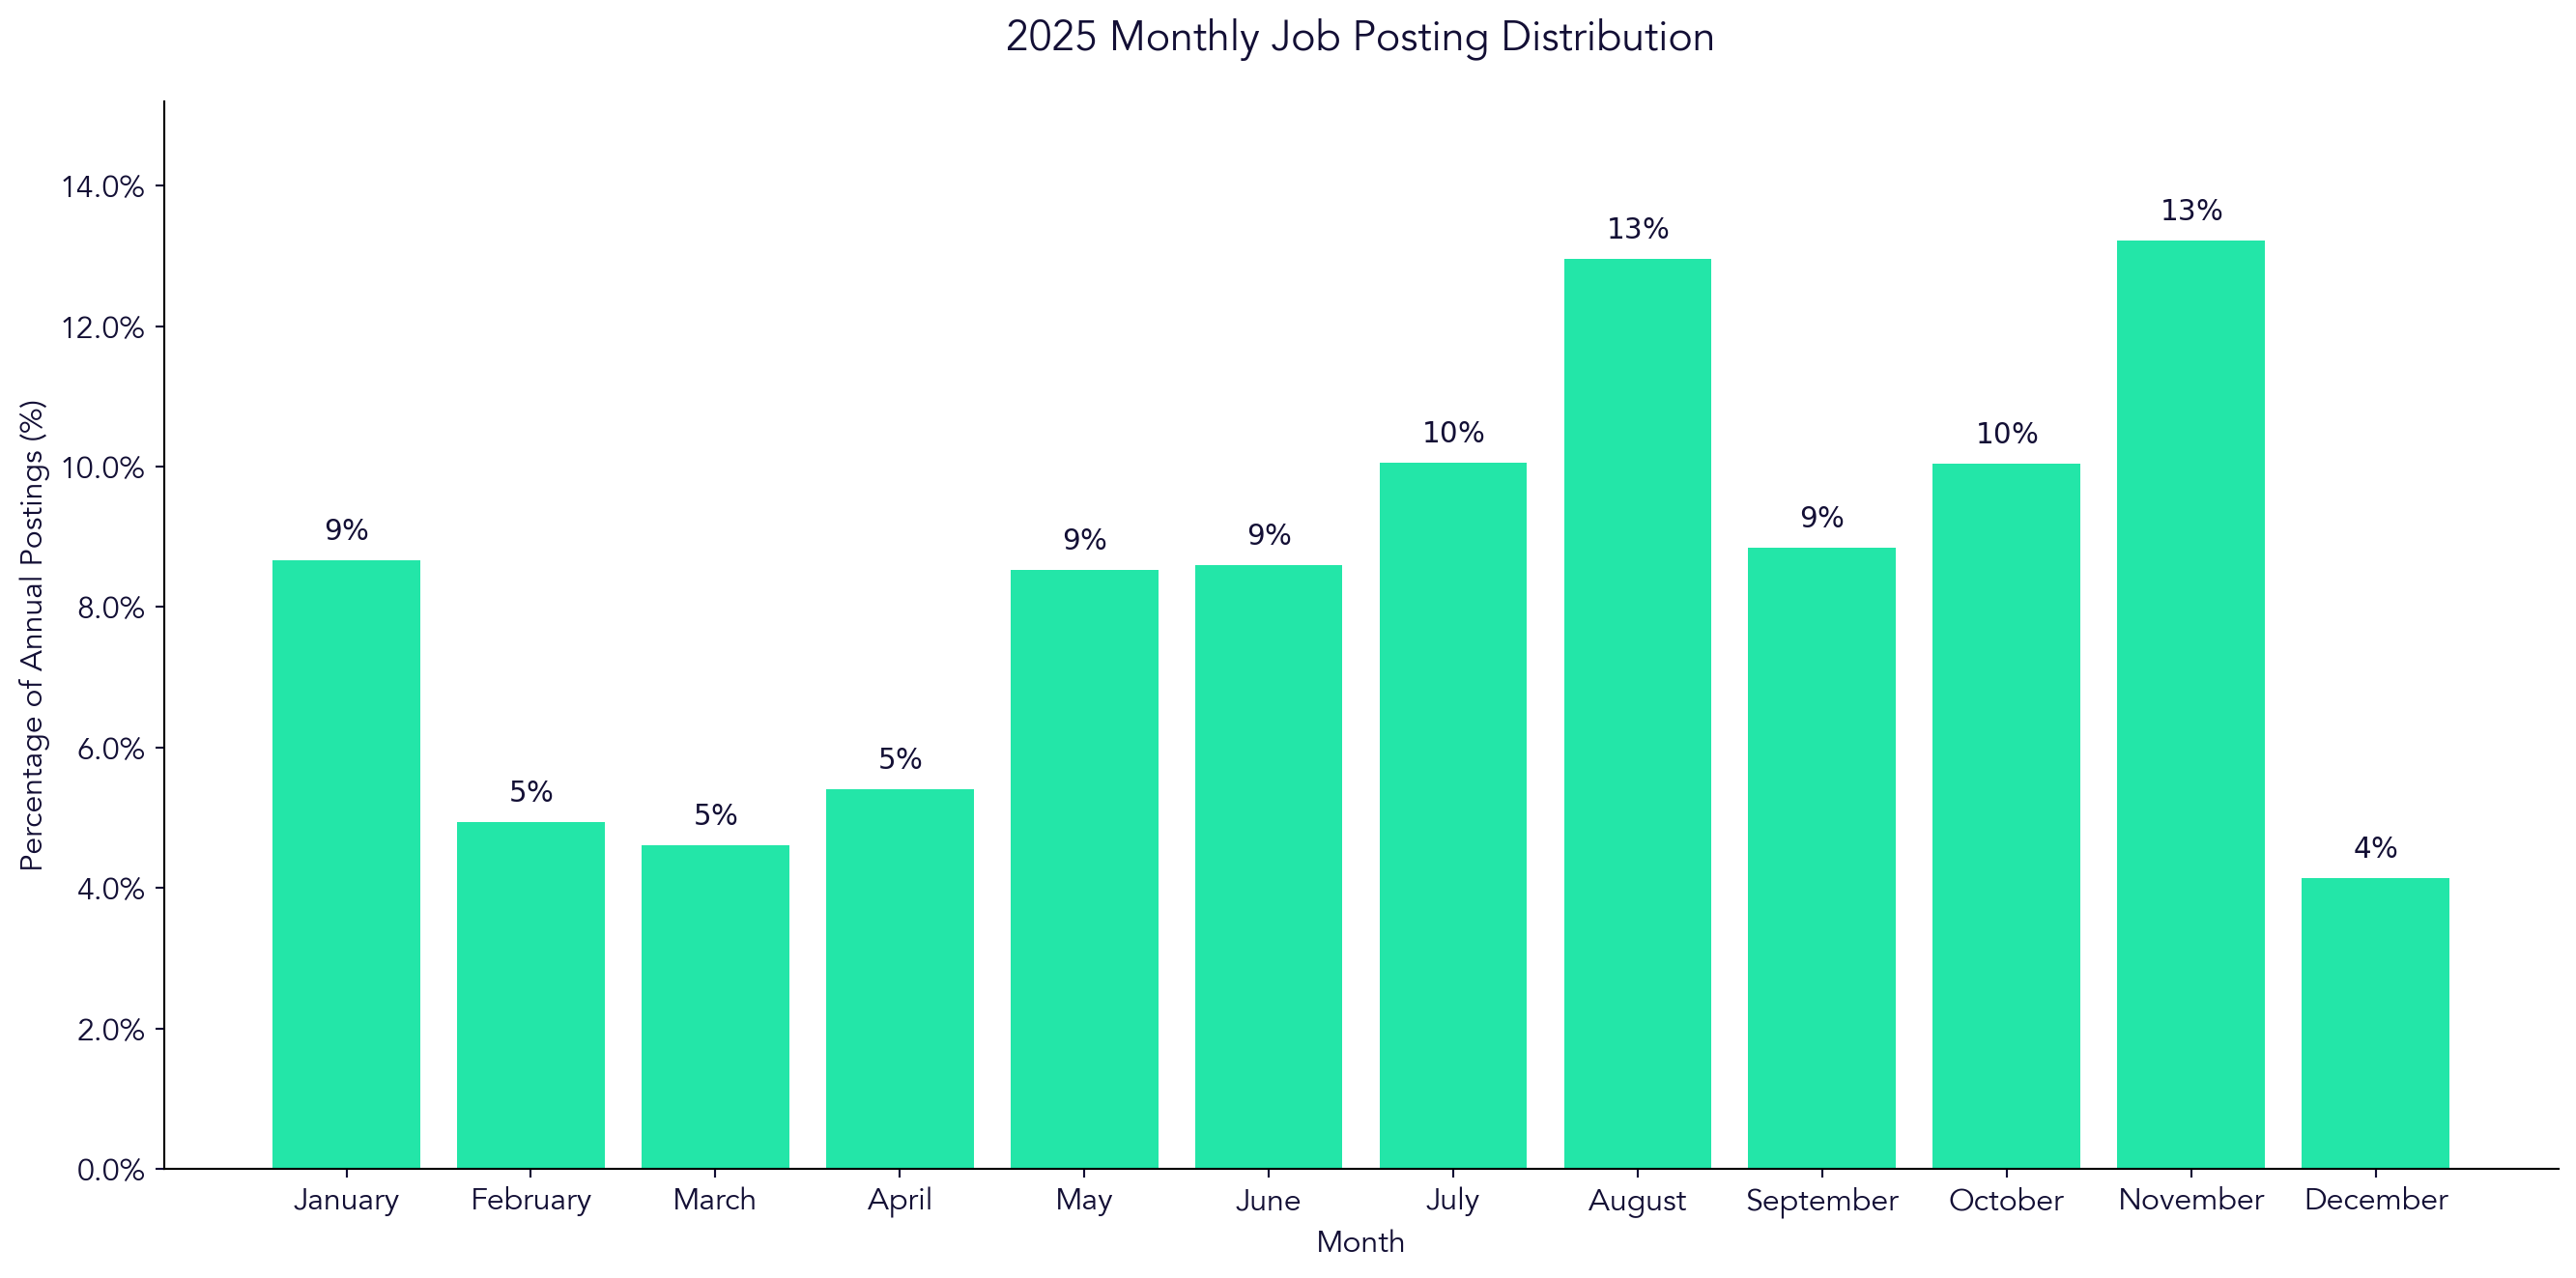

In [20]:
#| label: fig-monthly-dist
#| fig-cap: "Distribution of job postings by month in 2025."

total_postings = len(df)
    
monthly_counts = df["created_at"].dt.month.value_counts().sort_index()
monthly_percentages = (monthly_counts / total_postings) * 100

month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
plot_series = pd.Series(
    monthly_percentages.values, 
    index=[month_names[m] for m in monthly_percentages.index]
)

fig, ax = plt.subplots(figsize=(14, 7), facecolor="none")
ax.set_facecolor("none")

bars = ax.bar(plot_series.index, plot_series.values, color="#23E6A8")

for bar in bars:
    height = bar.get_height()
    label = f"${height:.0f}\\%$"
    
    ax.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center", 
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=11,
        fontweight="bold",
        color="#130f35"
    )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title("2025 Monthly Job Posting Distribution", fontsize=16, pad=20)
ax.set_ylabel("Percentage of Annual Postings (%)", fontsize=12)
ax.set_xlabel("Month", fontsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=0)
ax.set_ylim(0, plot_series.max() * 1.15)
plt.tight_layout()

## Language Demand by Category

After establishing the baseline, the analysis investigates how language requirements vary across different contexts. This section explores the relationship between programming languages and:

- Job Titles: Which languages are synonymous with roles like "Data Scientist" or "Software Engineer."

- Languages Duos: Which languages are going together in the jobs descriptions.

- Industries: How the tech stack in "Finance" differs from "Healthcare" or "Manufacturing."

- Geography: Regional preferences for specific technologies across the United States.

### Language Demand by Job Title

In this section, we analyze the specific technical requirements for leadership roles. Understanding the linguistic preferences for management-level positions provides insight into the tools required to oversee modern technical teams and data-driven projects.

- For the Manager category, the data reveals a high reliance on data processing and automation tools. The top two languages are Python, mentioned in 51% of job postings, and SQL, mentioned in 49%. This nearly equal split suggests that managers are increasingly expected to possess both scripting capabilities and direct database proficiency. Secondary requirements include Java (23%) and JavaScript (17%), which reflect the oversight of enterprise applications and web-based platforms. For a more detailed breakdown of these trends, please see @fig-langs-managers.

![Programming languages demand for managers distribution](../outputs/figures/langs_for_managers.png){#fig-langs-managers width="90%"}

- Technical Engineers show a strong preference for backend and automation stability. Python leads at 51%, serving as the primary language for automation and system integration. SQL follows at 31%, while Java (23%), JavaScript (18%), and C++ (16%) round out the core stack required for building scalable infrastructure. For a more detailed breakdown of these trends, please see @fig-langs-engineers.

![Programming languages demand for engineers distribution](../outputs/figures/langs_for_engineers.png){#fig-langs-engineers width="90%"}

- For Analysts, SQL is the undisputed leader, appearing in 73% of job postings. This underscores the fundamental requirement for direct data extraction and manipulation. Python (35%) and R (12%) serve as the secondary toolkit for advanced statistical modeling and visualization, while other languages represent a marginal share of the market. For a more detailed breakdown of these trends, please see @fig-langs-analysts.

![Programming languages demand for analysts distribution](../outputs/figures/langs_for_analysts.png){#fig-langs-analysts width="90%"}

- Data Scientists exhibit the most concentrated language requirements. Python dominates this field at 86%, confirming its status as the industry standard for machine learning and research. SQL remains vital at 50% for data retrieval, while R retains a significant foothold at 23% for specialized statistical analysis. For a more detailed breakdown of these trends, please see @fig-langs-scientists.

![Programming languages demand for scientists distribution](../outputs/figures/langs_for_scientists.png){#fig-langs-scientists width="90%"}

- The Developer profile differs significantly, emphasizing application logic and database interaction. SQL takes the lead at 55%, indicating that database management is a core developer responsibility. JavaScript (42%) and Java (33%) highlight the focus on front-end and enterprise development. Notably, Python appears in only 29% of these roles, while C# maintains a strong presence at 20%. For a more detailed breakdown of these trends, please see @fig-langs-developers.

![Programming languages demand for developers distribution](../outputs/figures/langs_for_developers.png){#fig-langs-developers width="90%"}

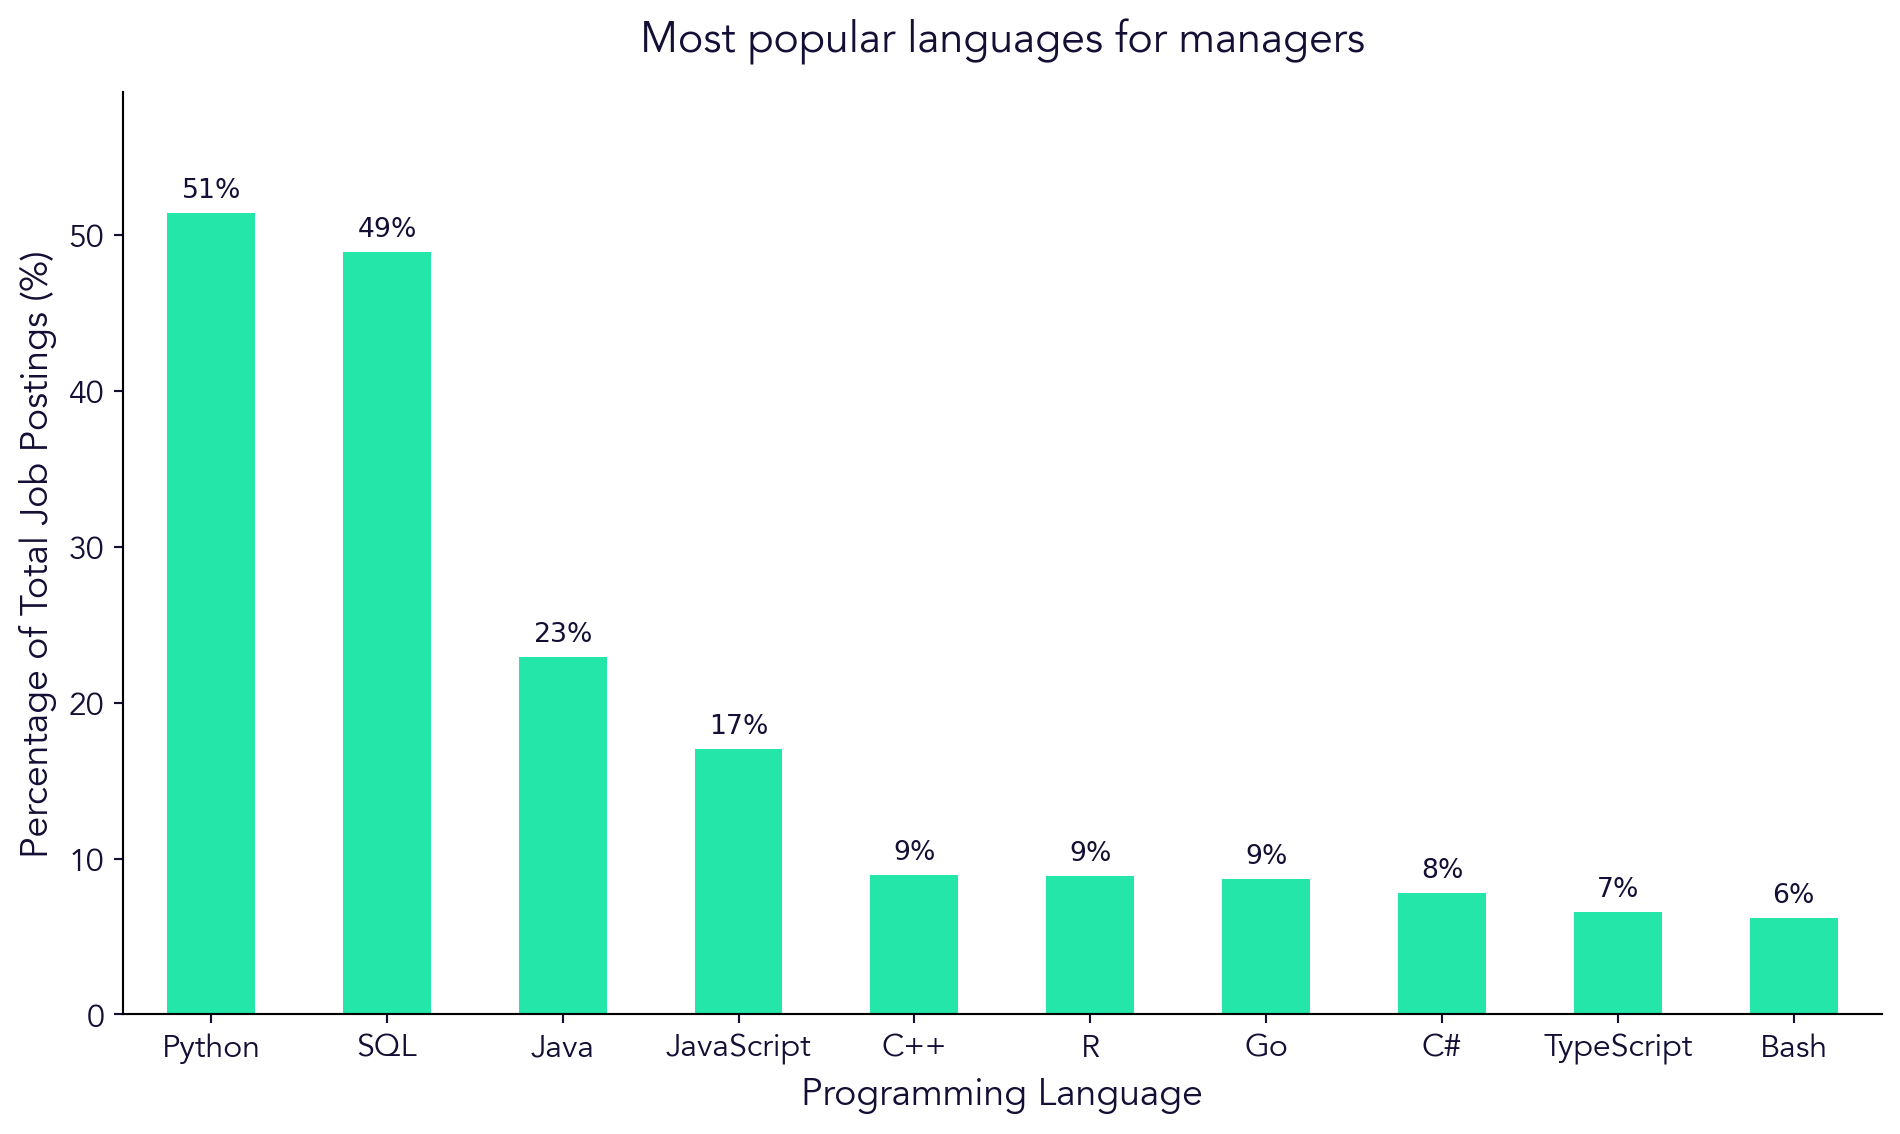

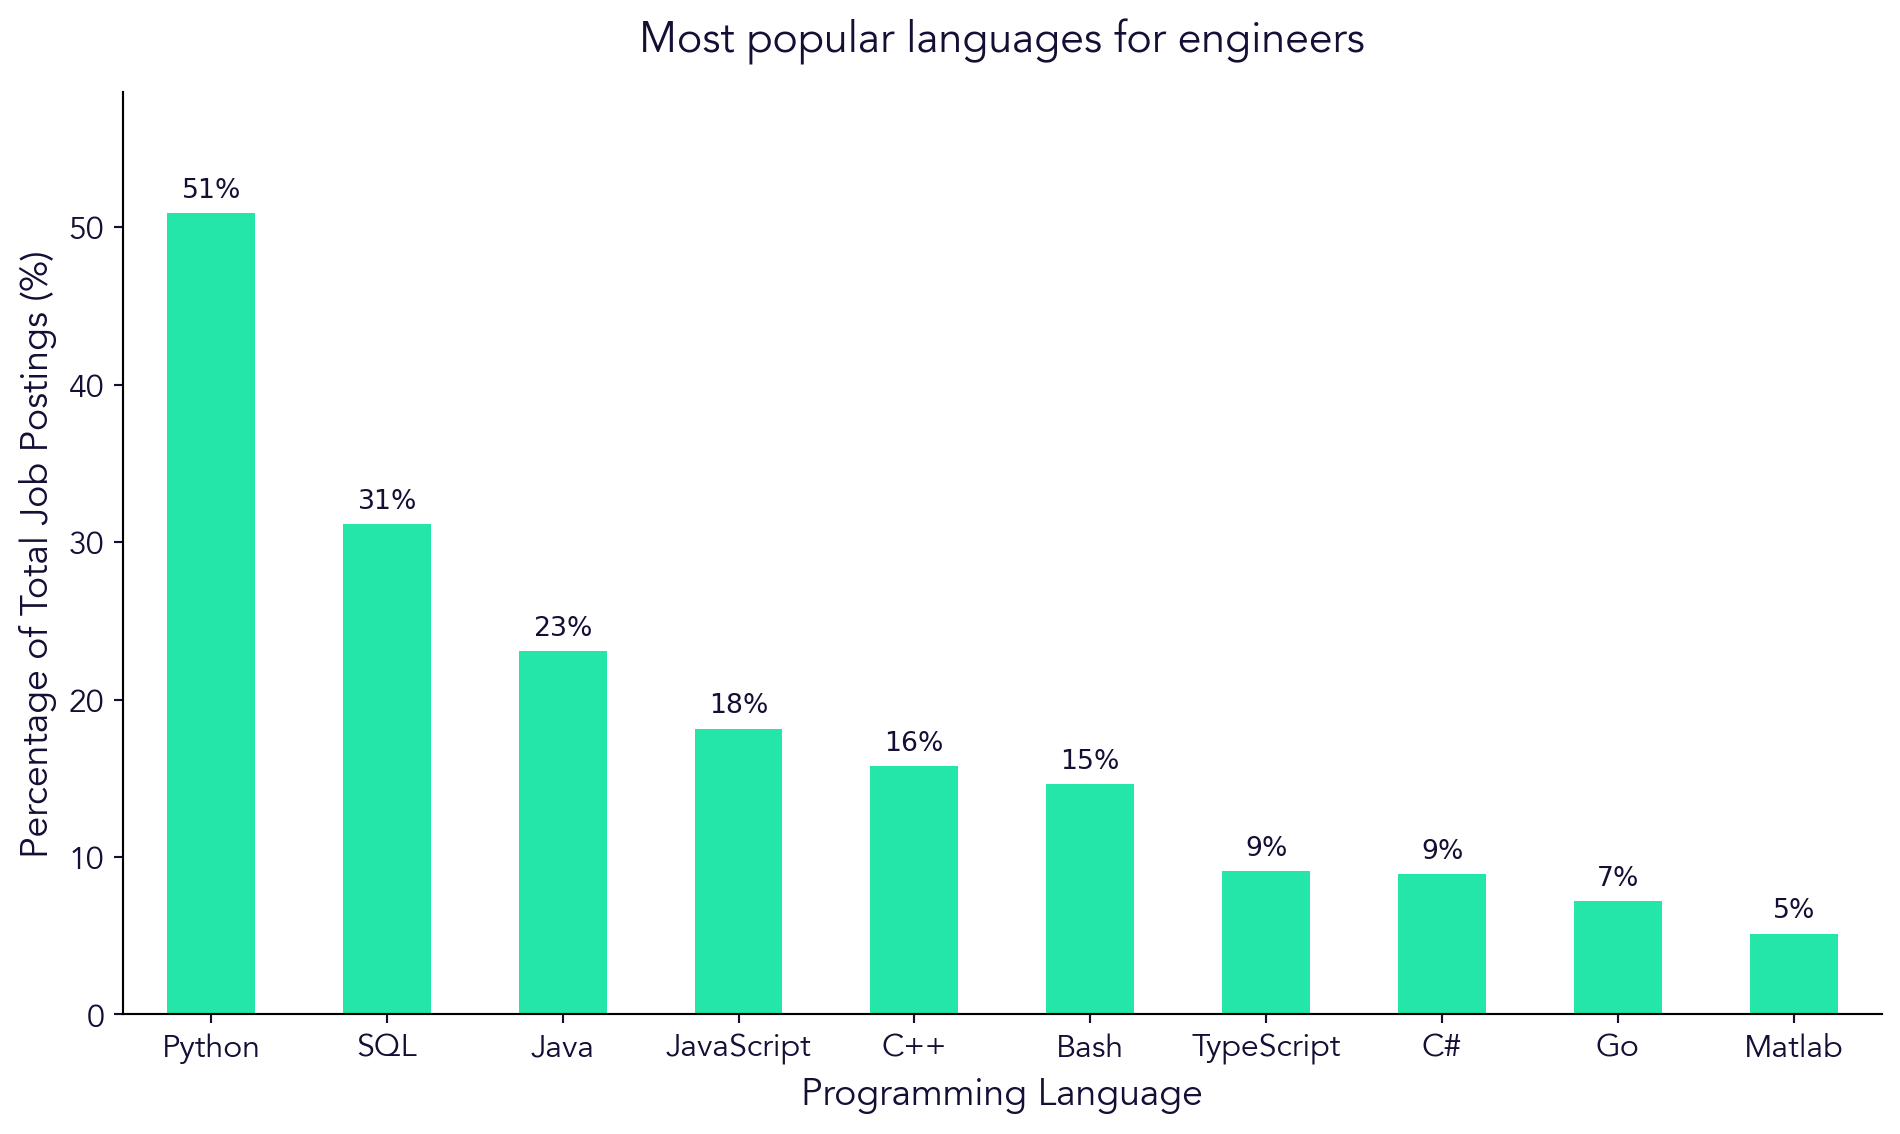

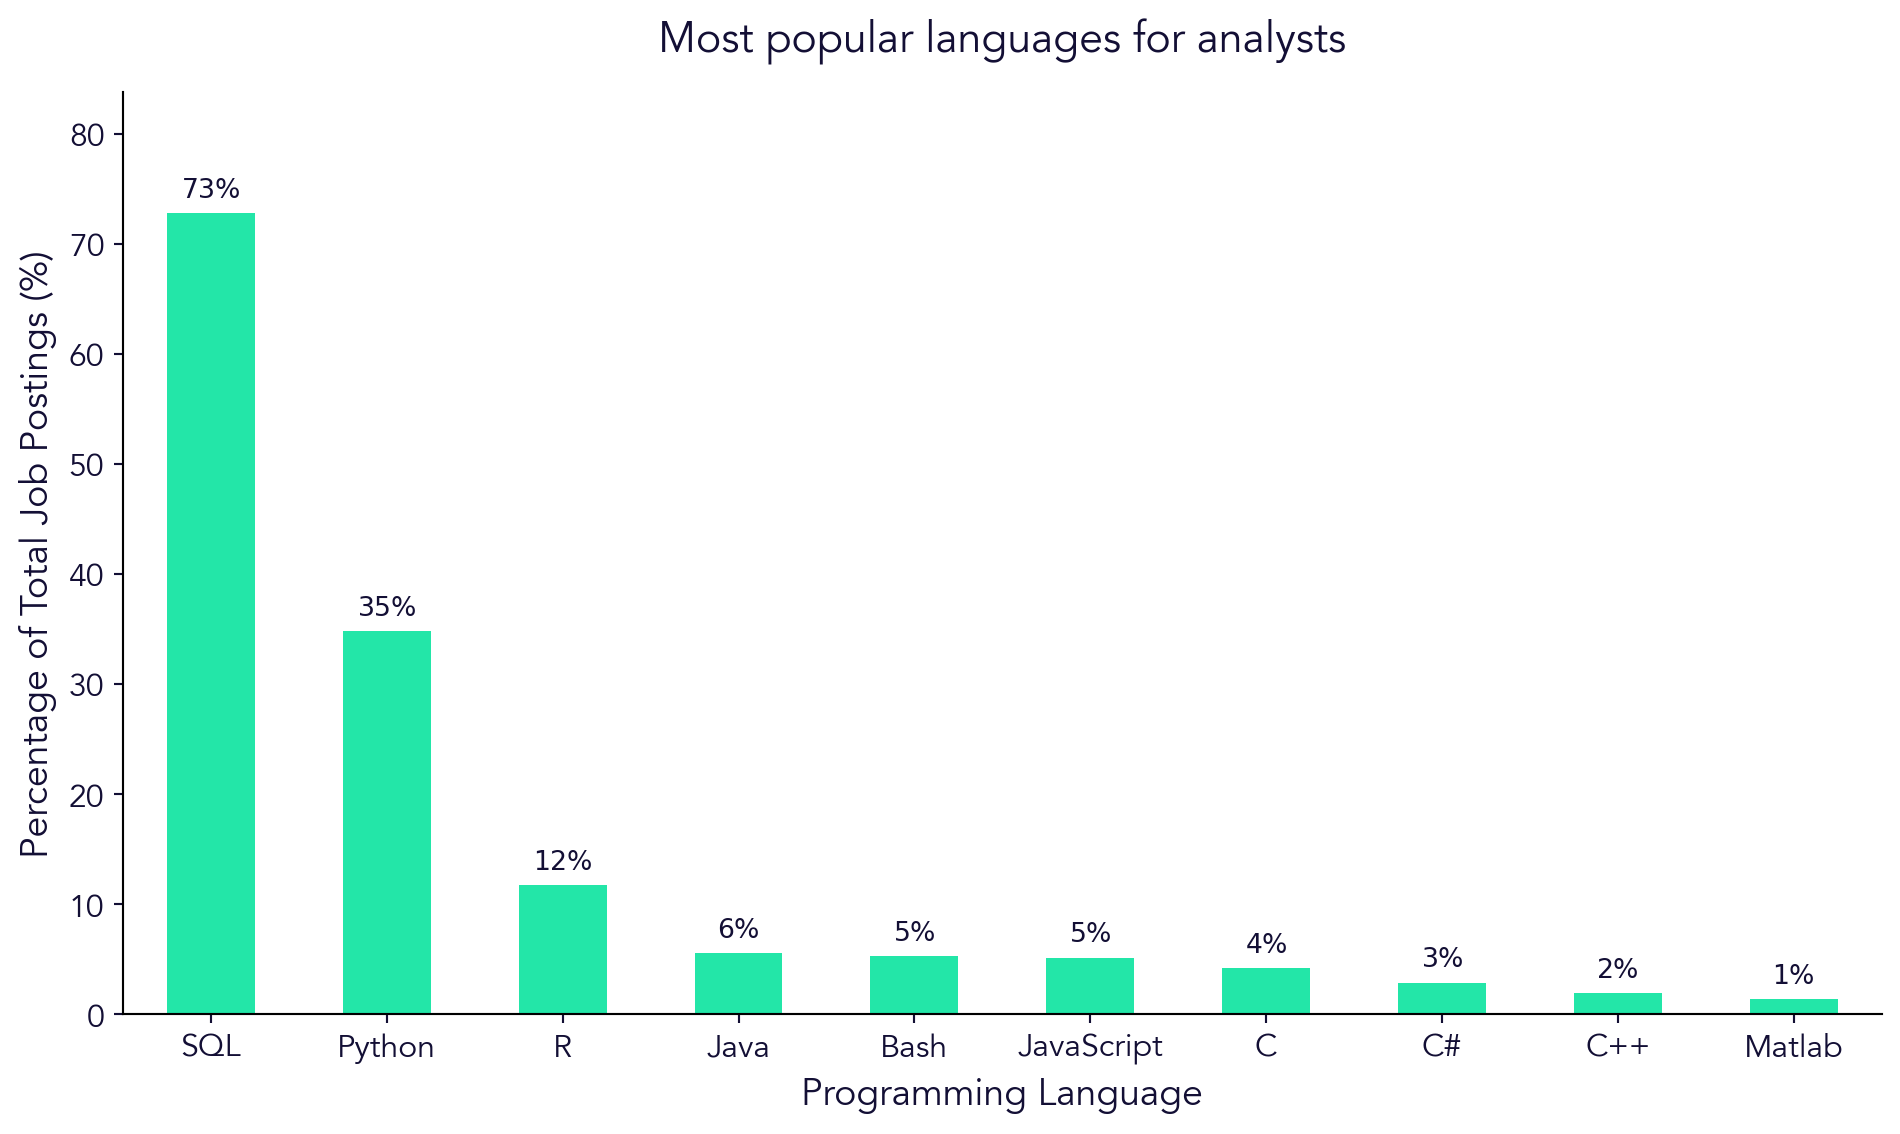

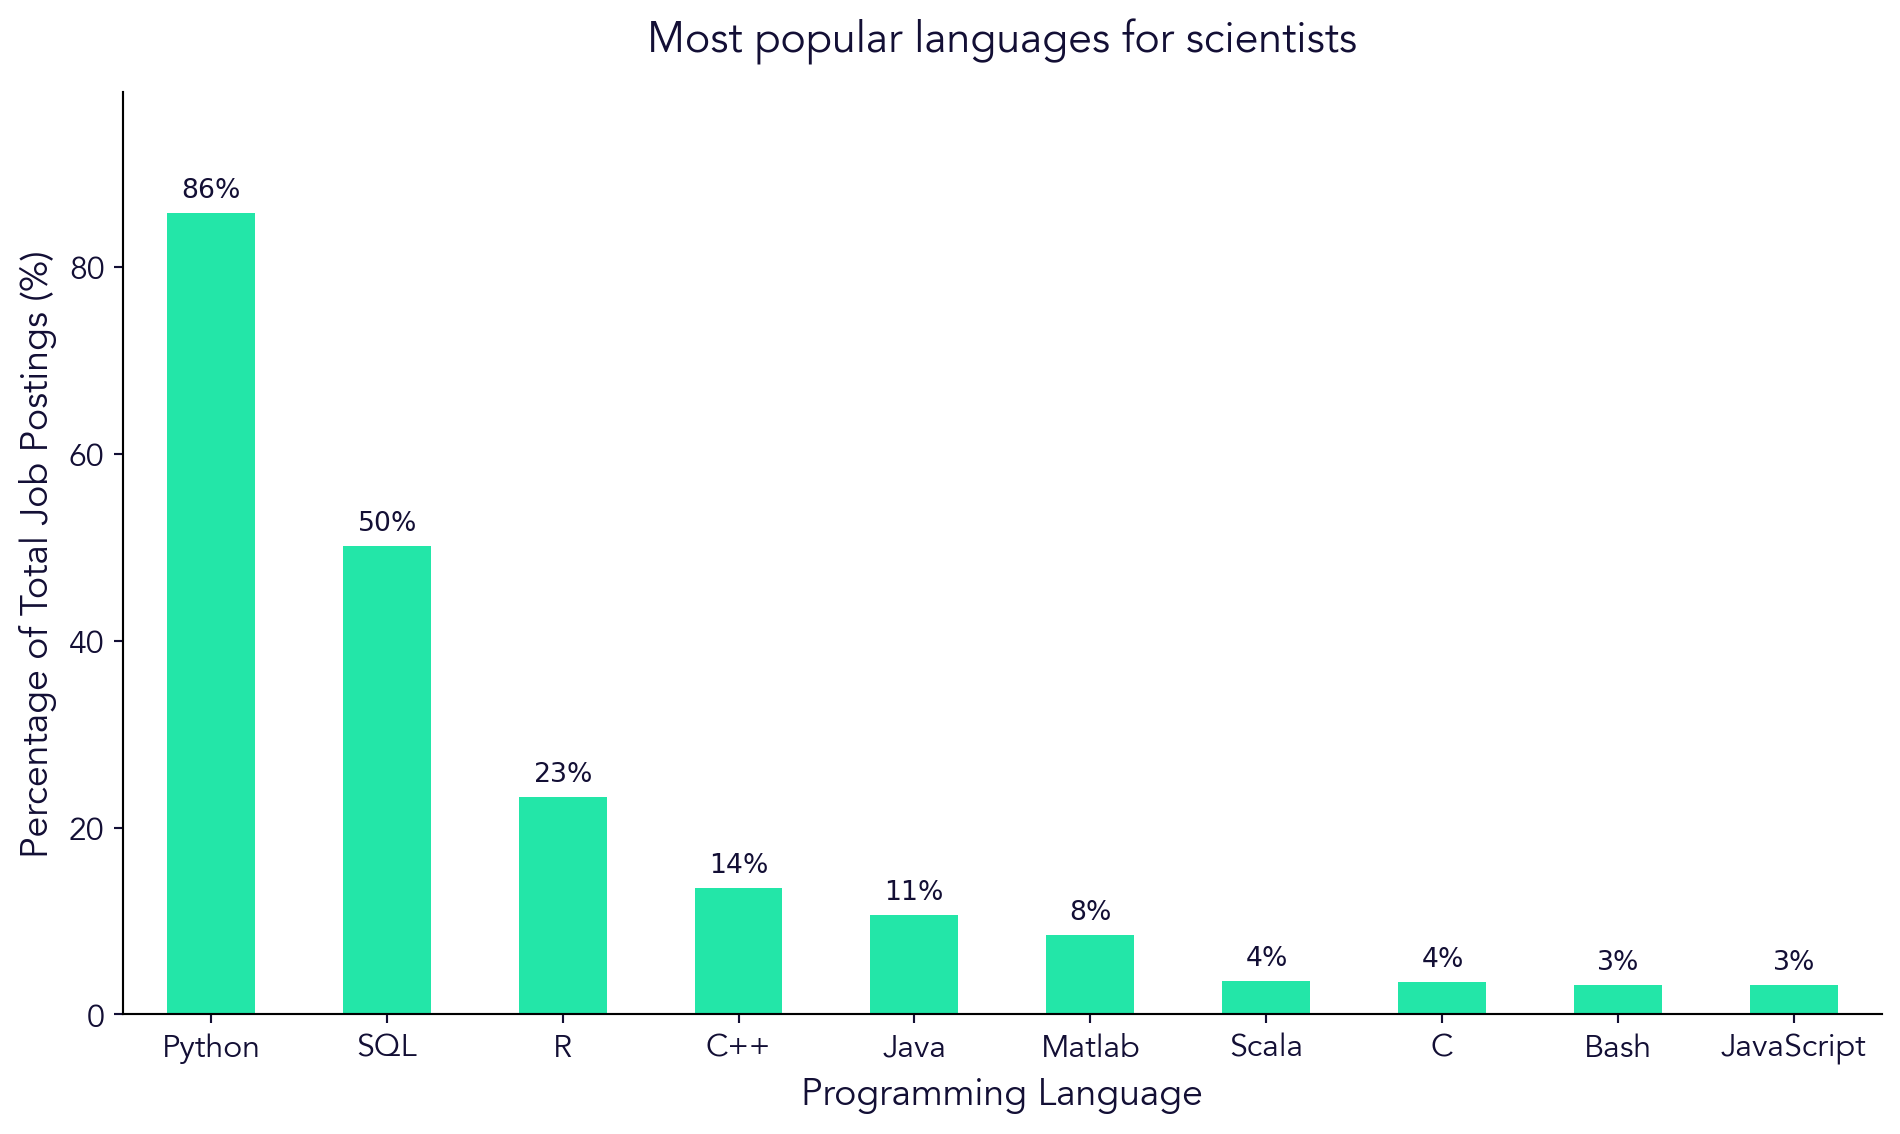

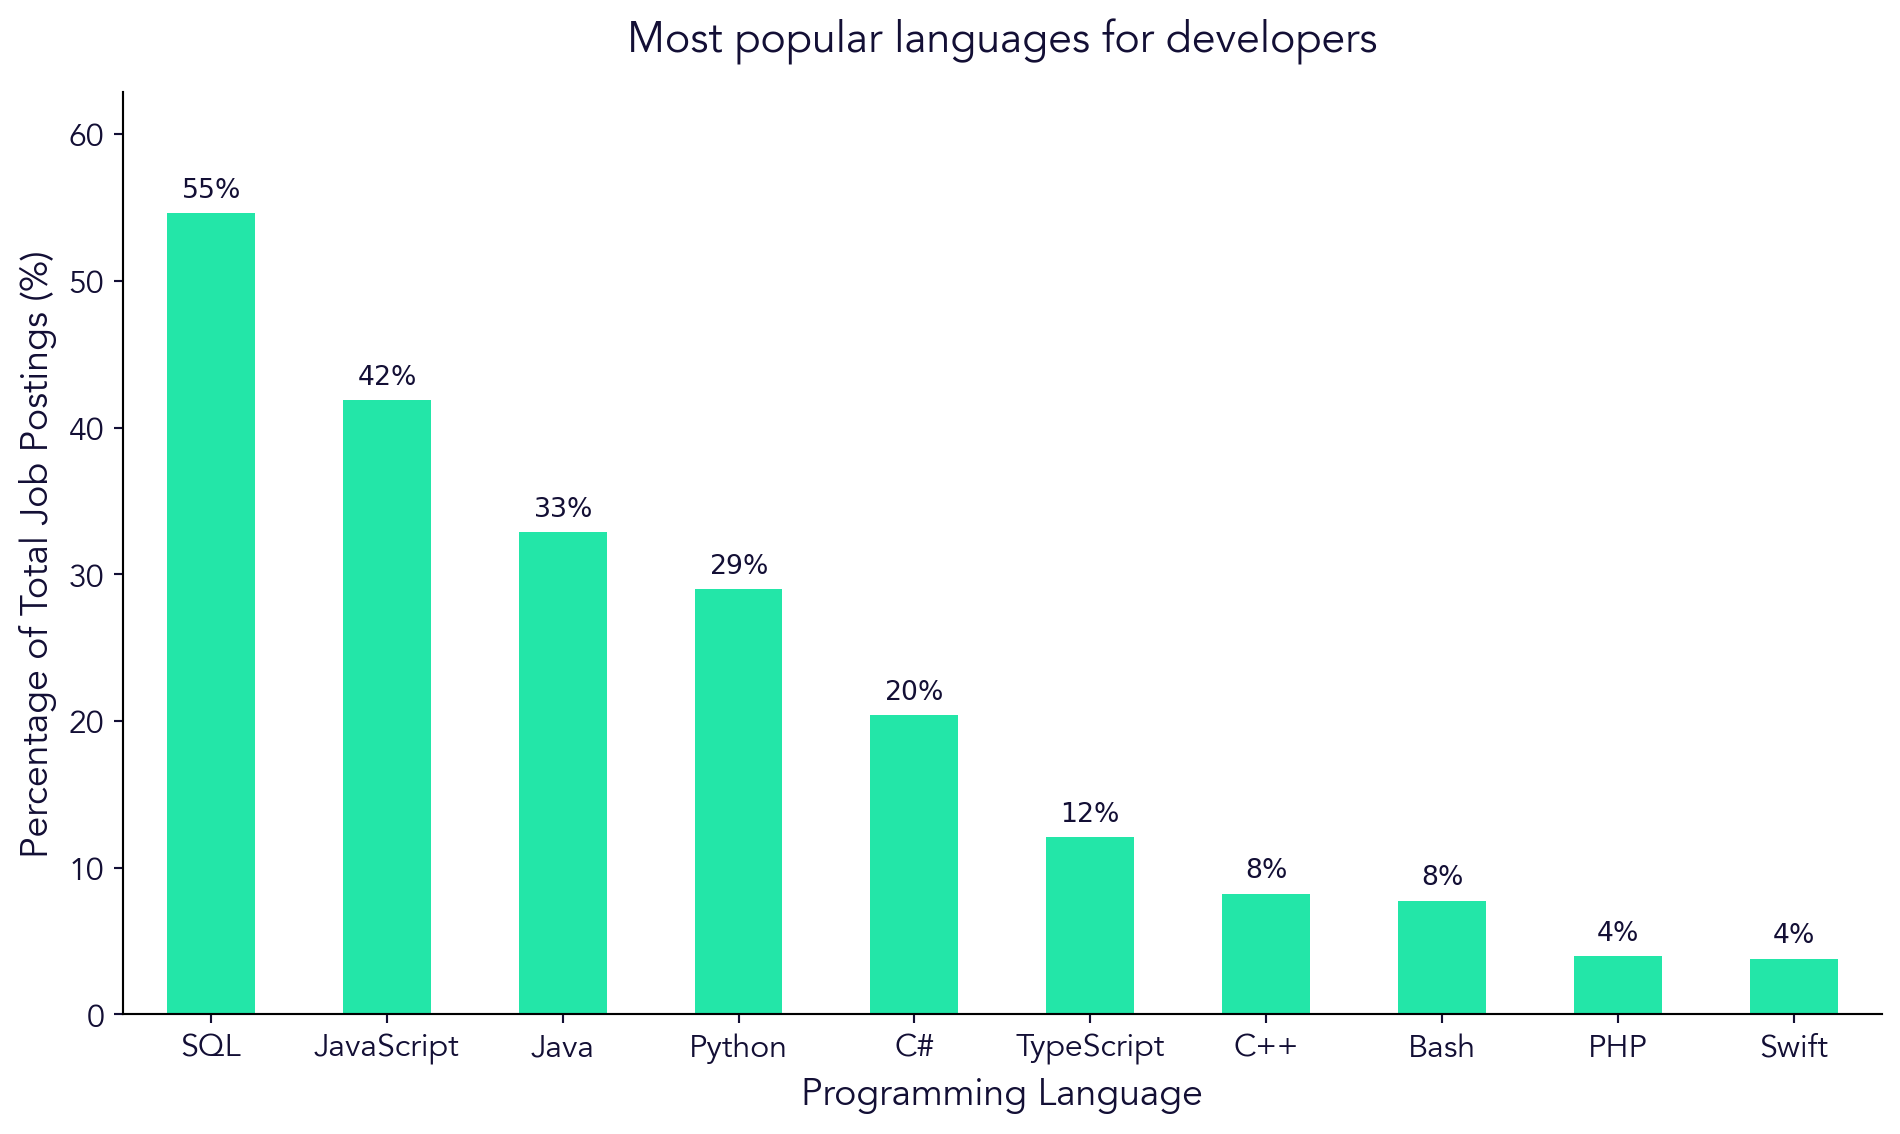

In [21]:
#| include: false
for job in jobs_cols:
    df_job = df[df[job] == 1]
    df_top_10_langs_job = df_job[prog_languages].sum(axis=0).sort_values(ascending=False)[:10]
    fig, ax = plot_language_market_share(df_job, prog_languages, multipliers, title = f"Most popular languages for {job}s")
    fig.savefig(f"../outputs/figures/langs_for_{job}s.png", dpi=600)

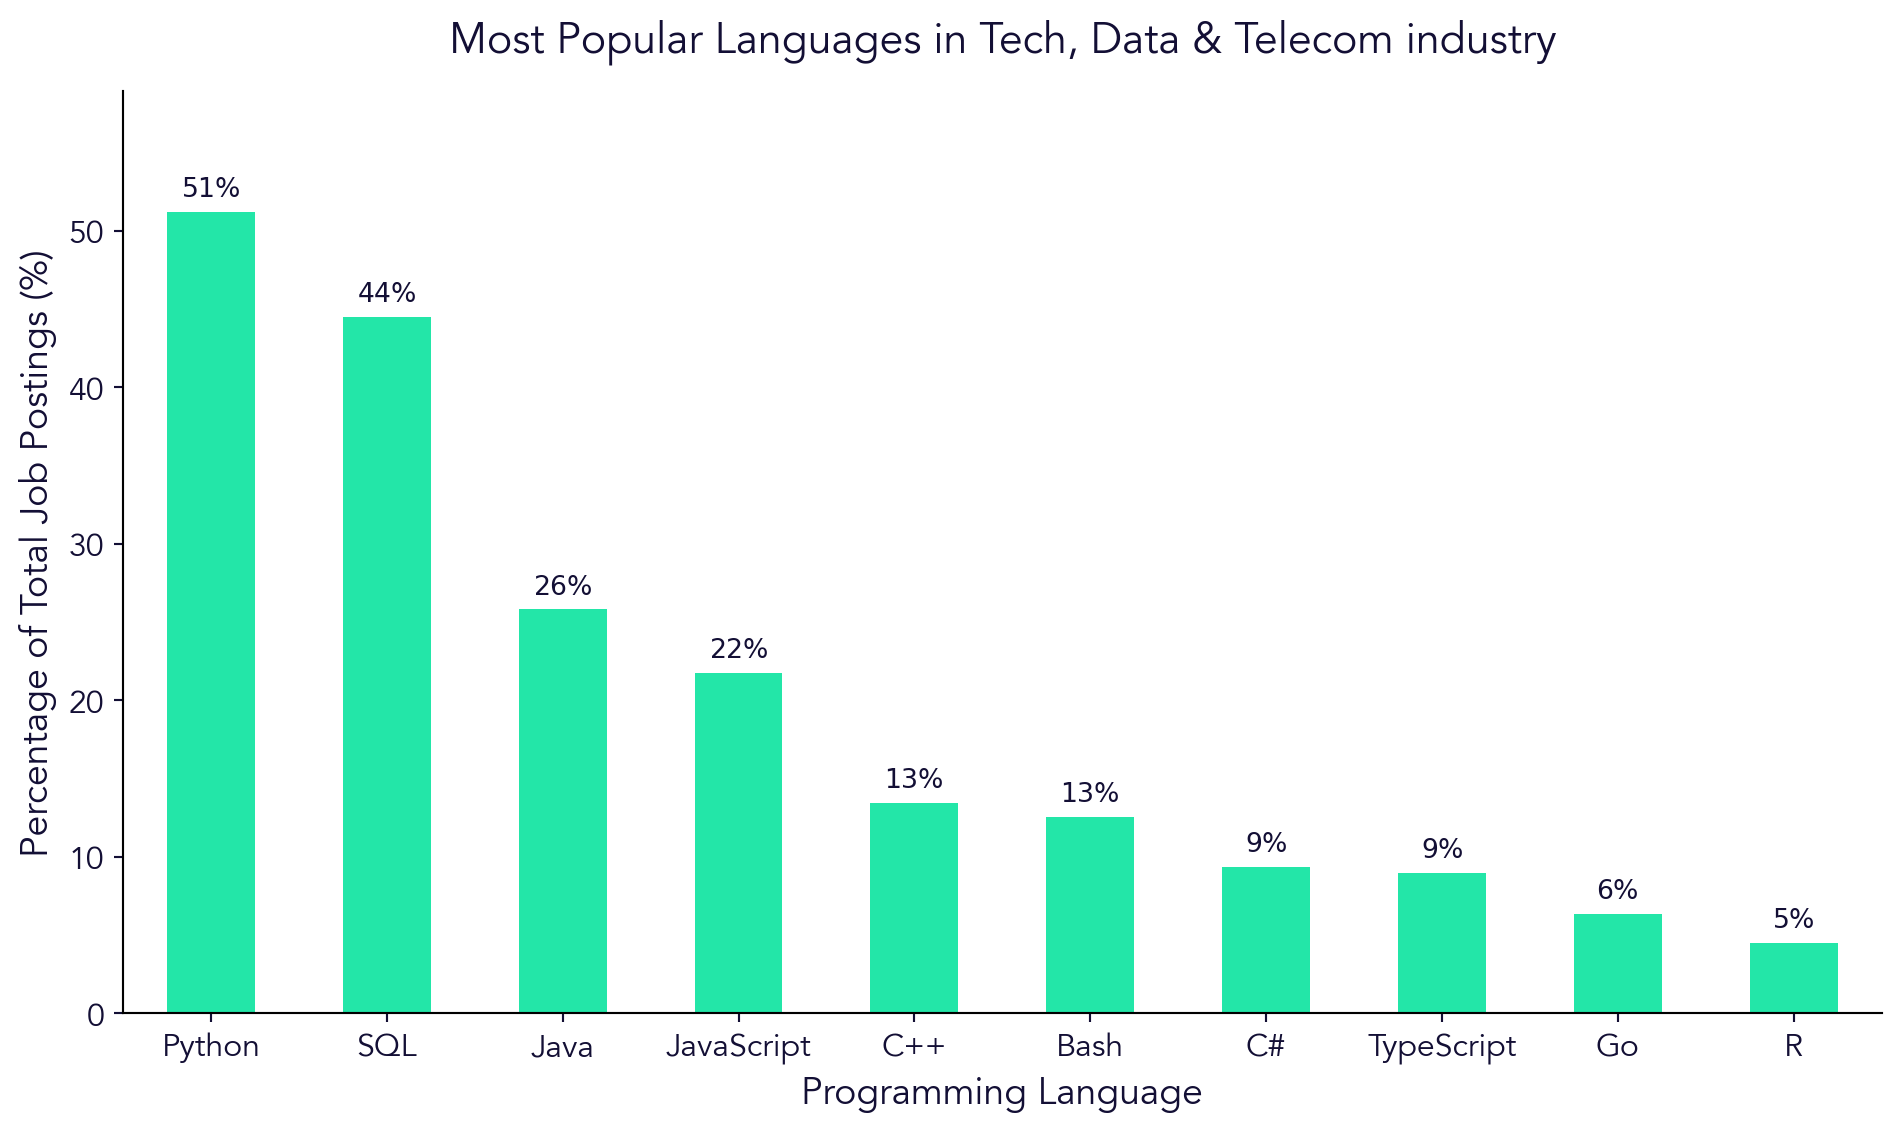

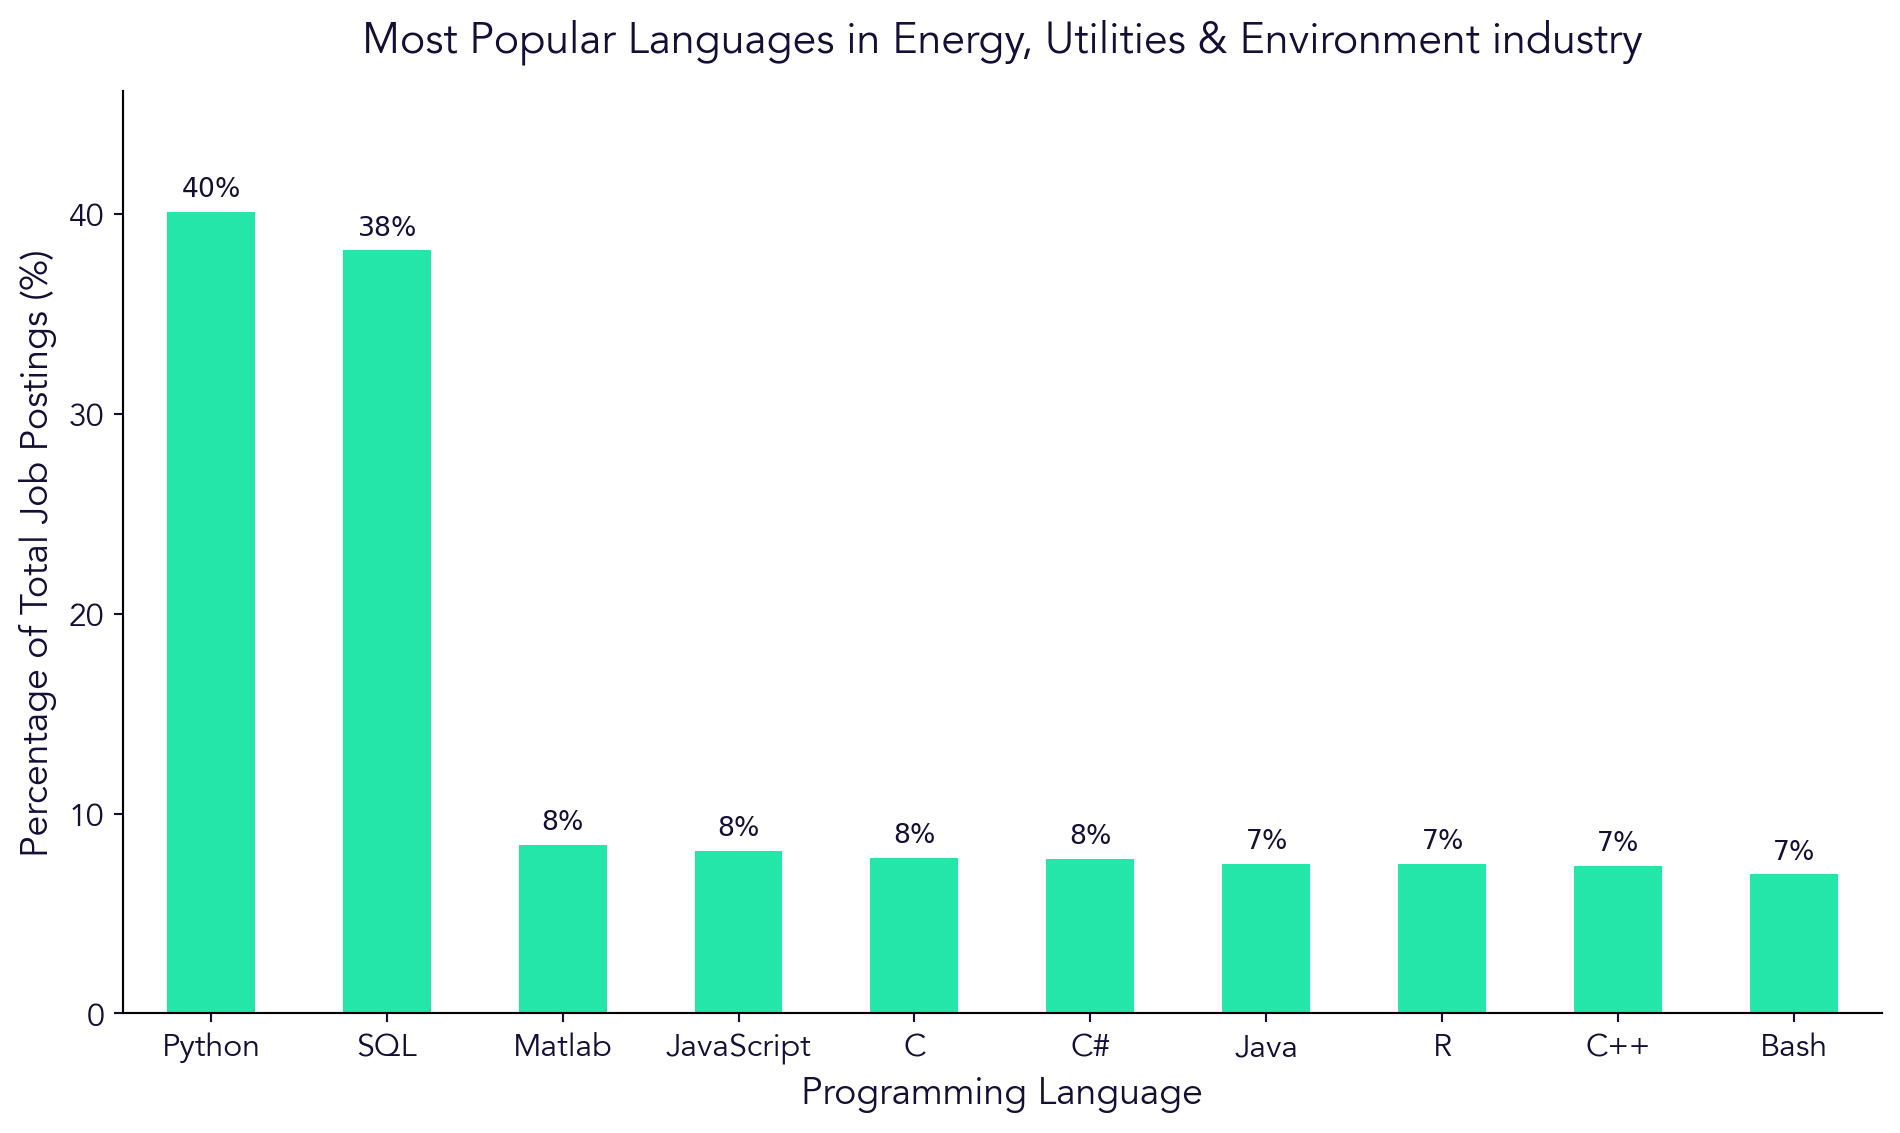

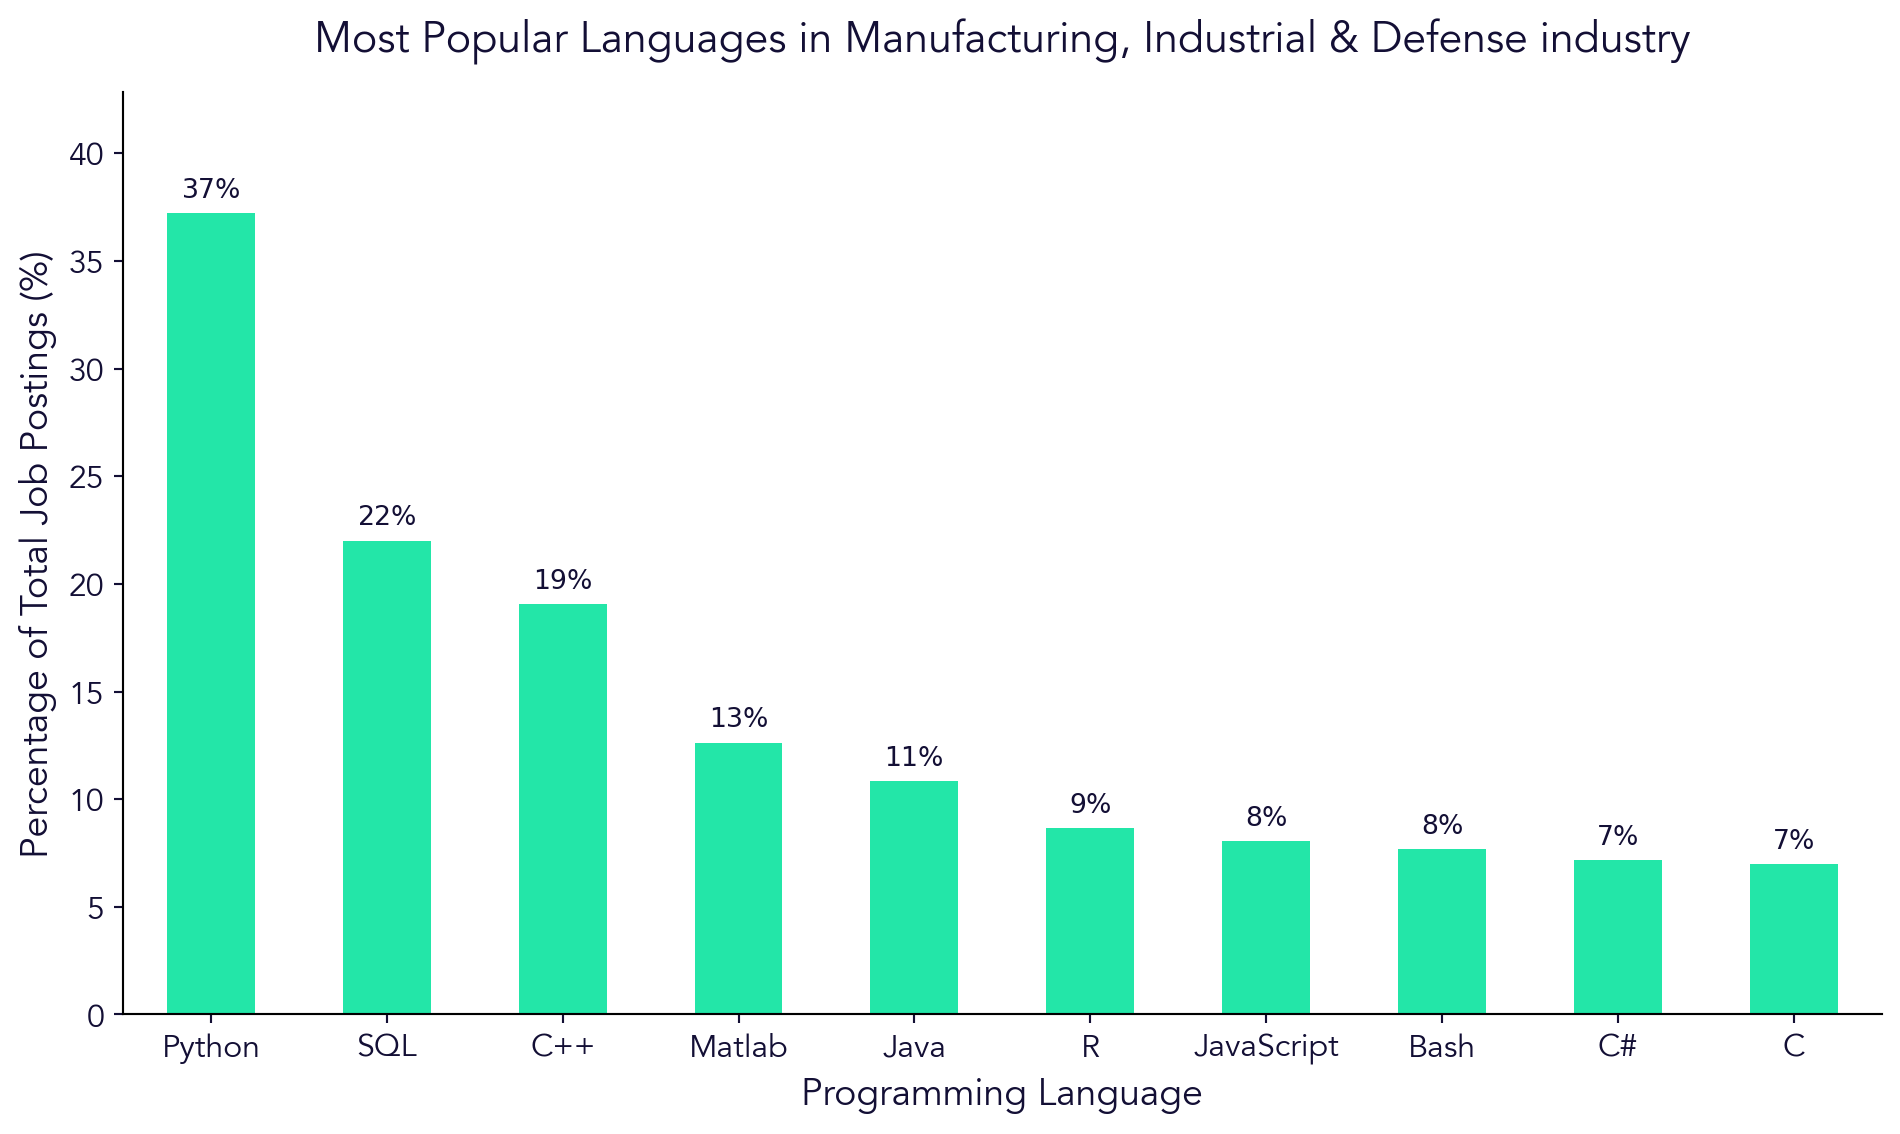

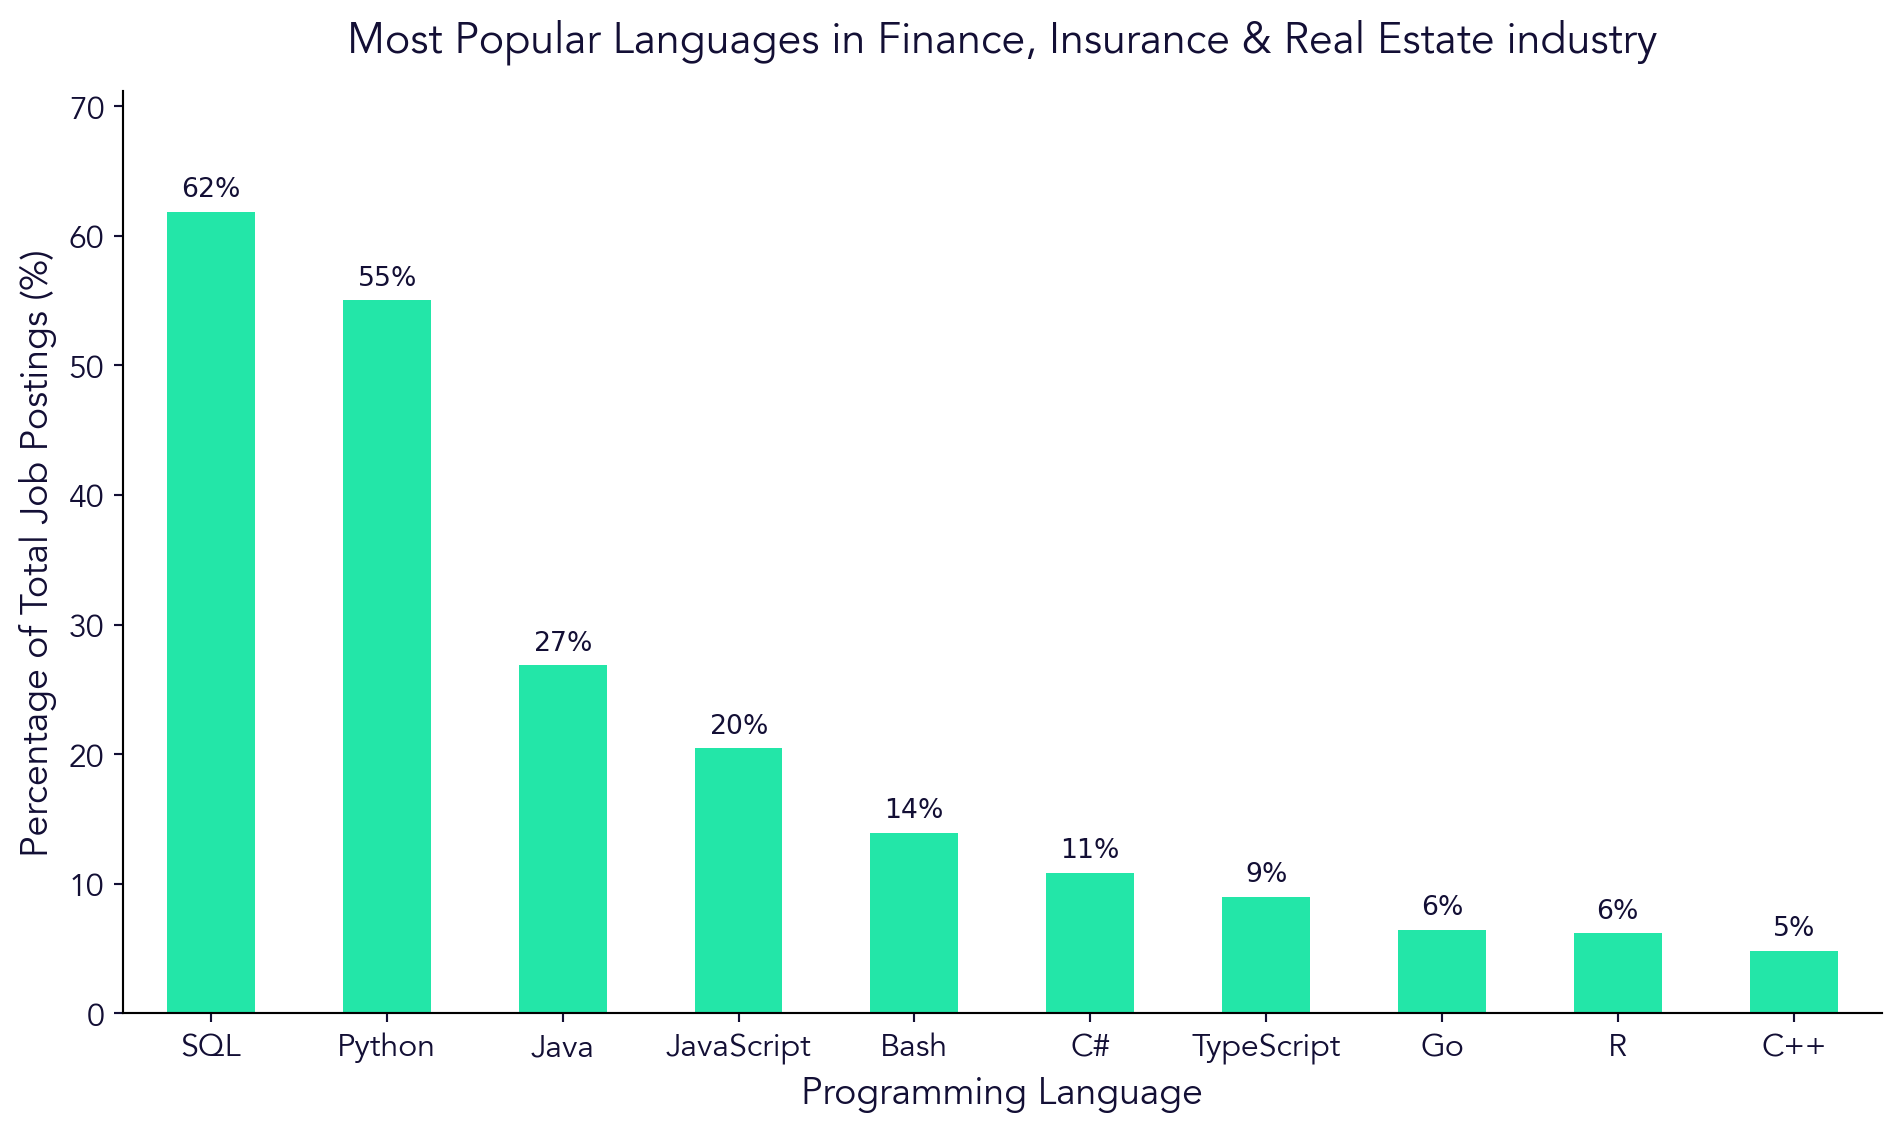

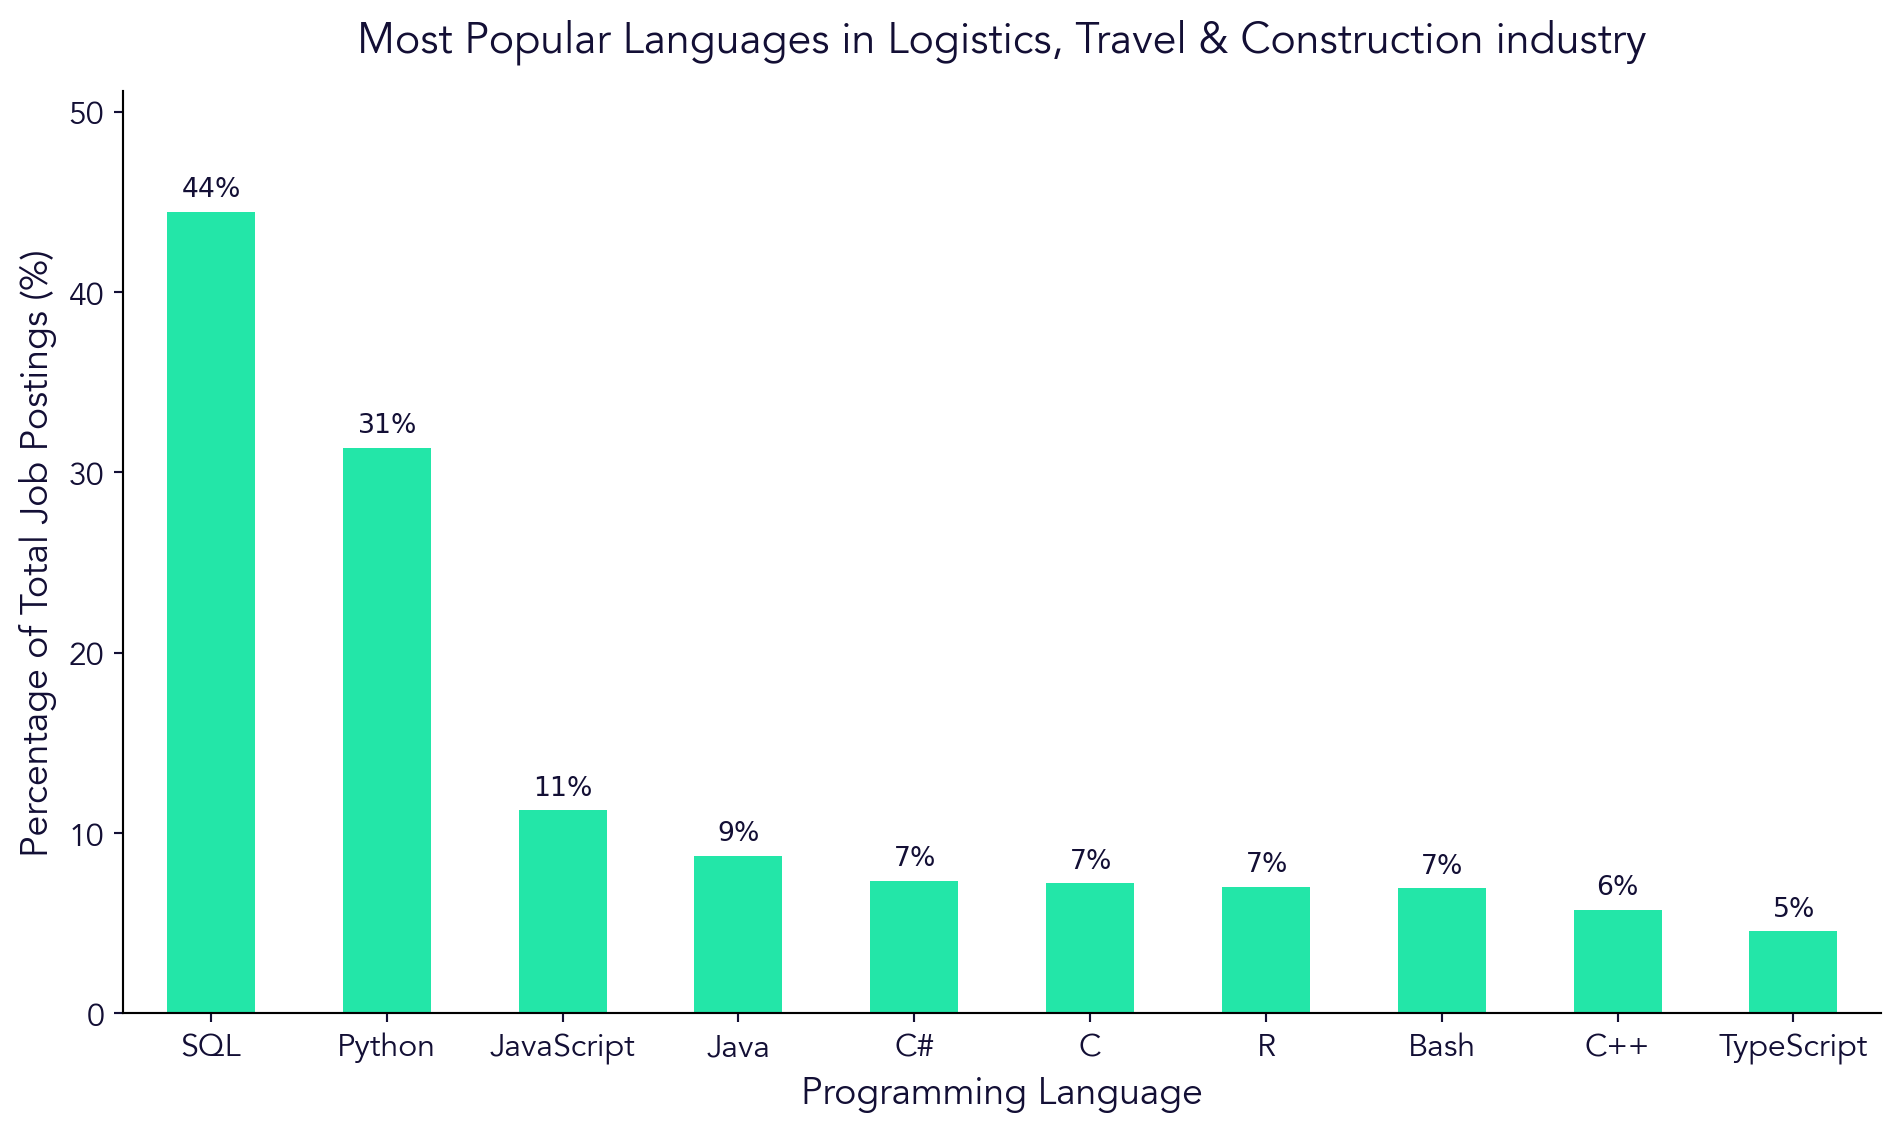

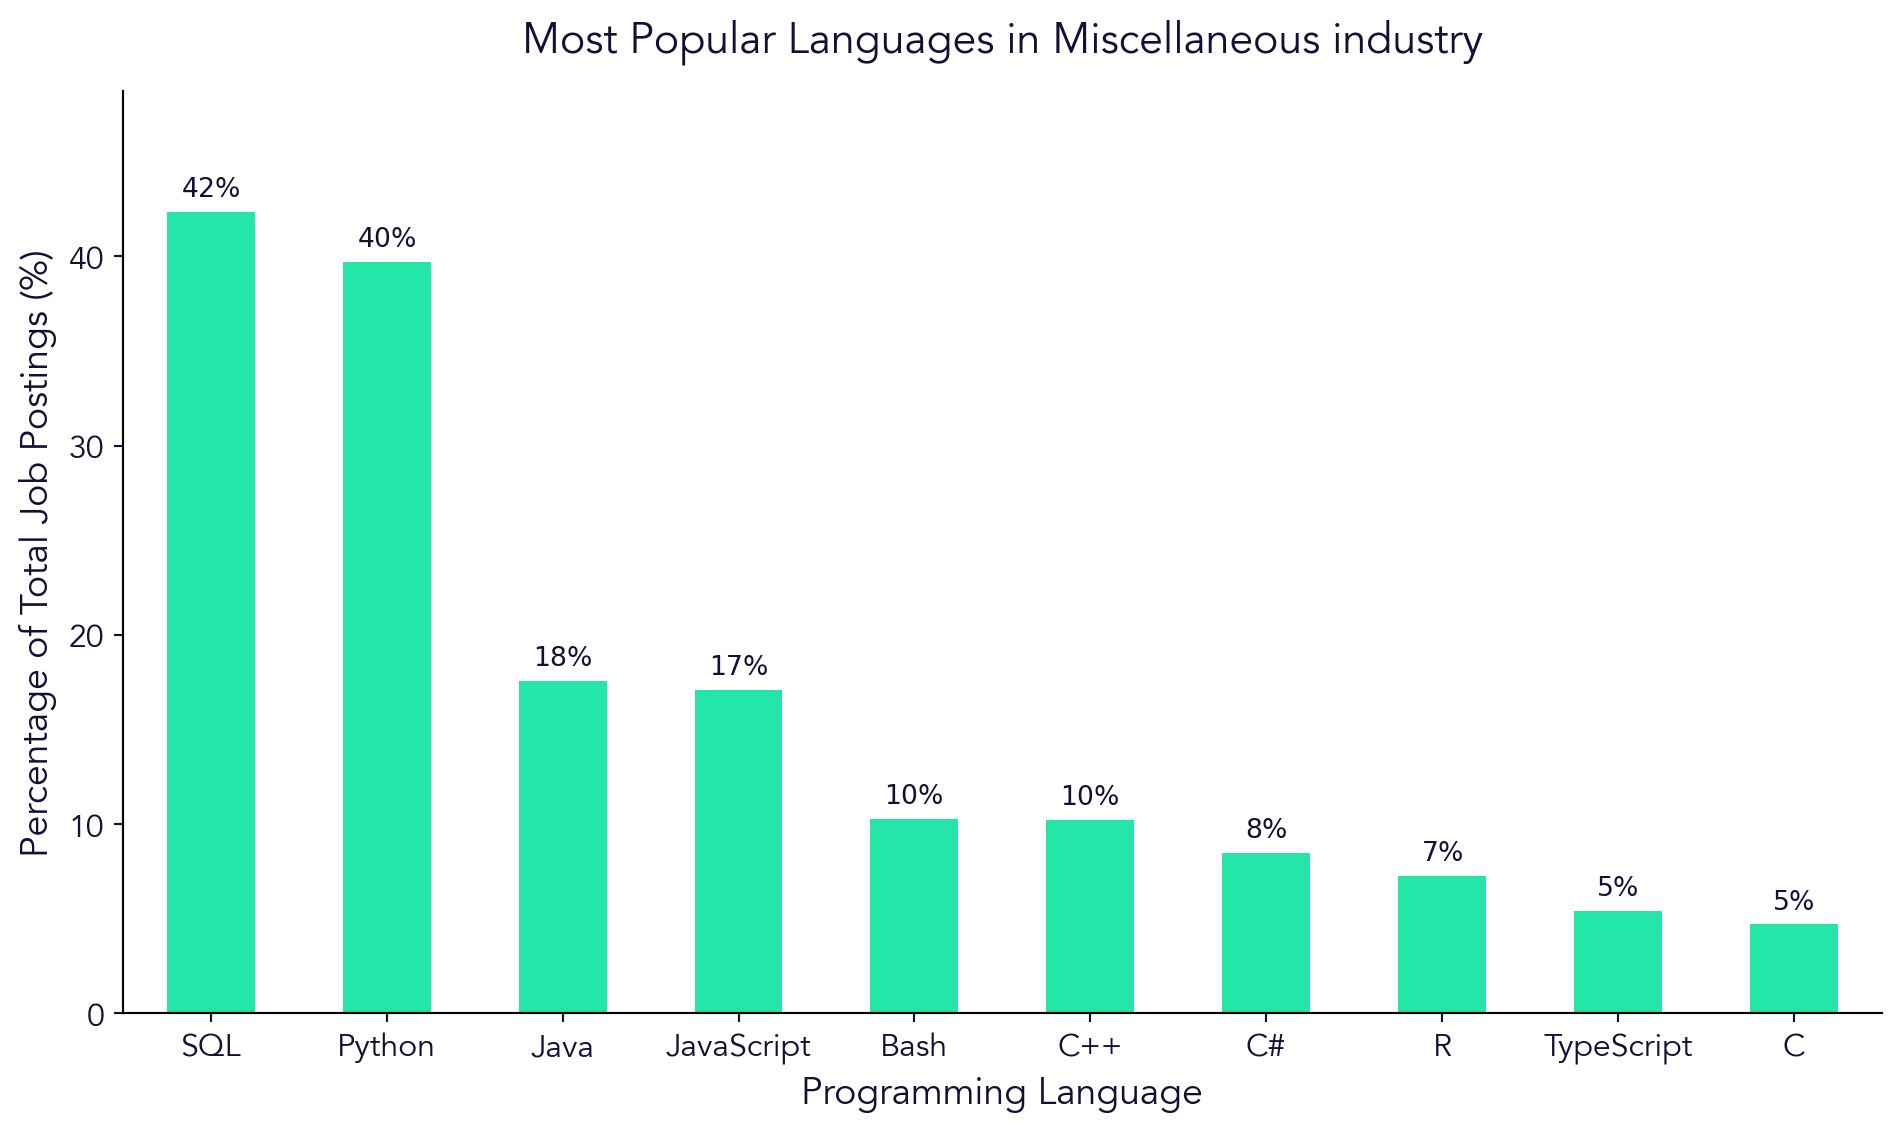

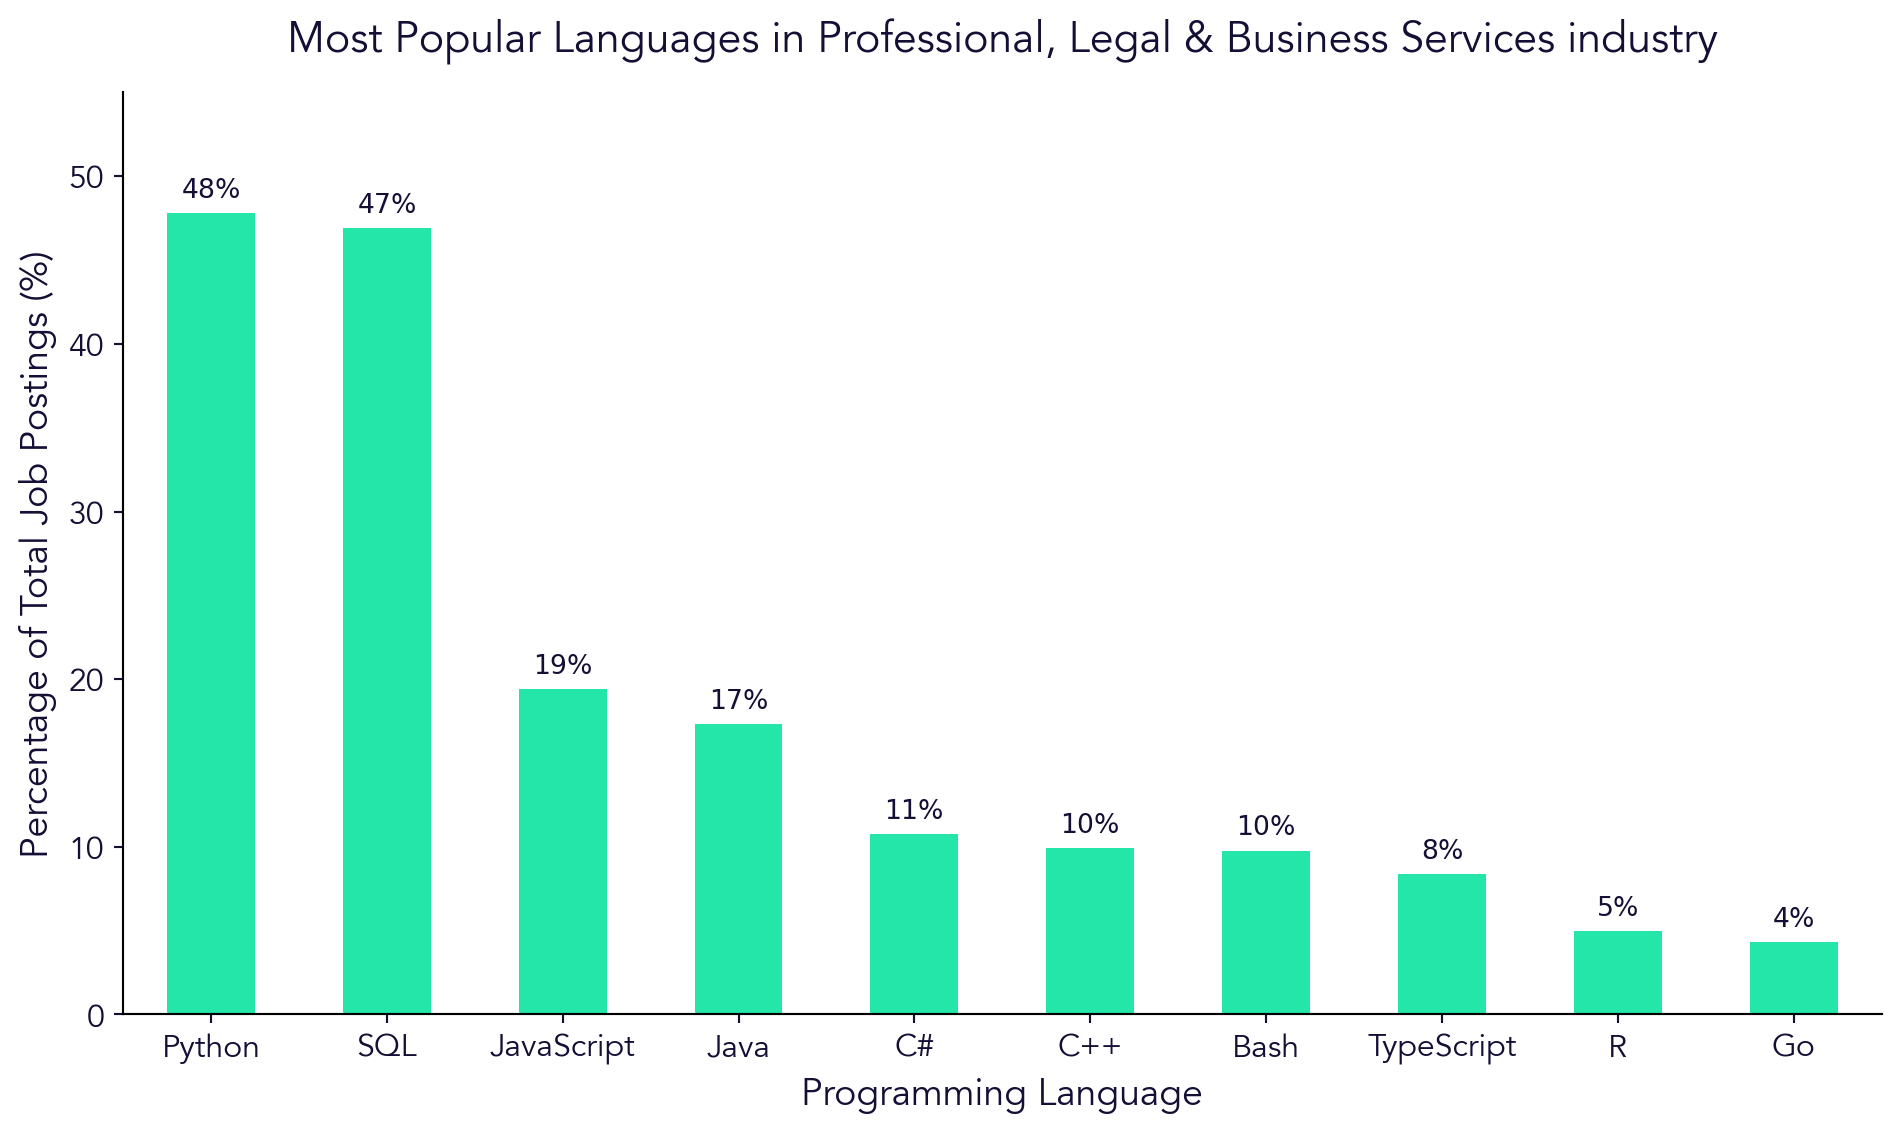

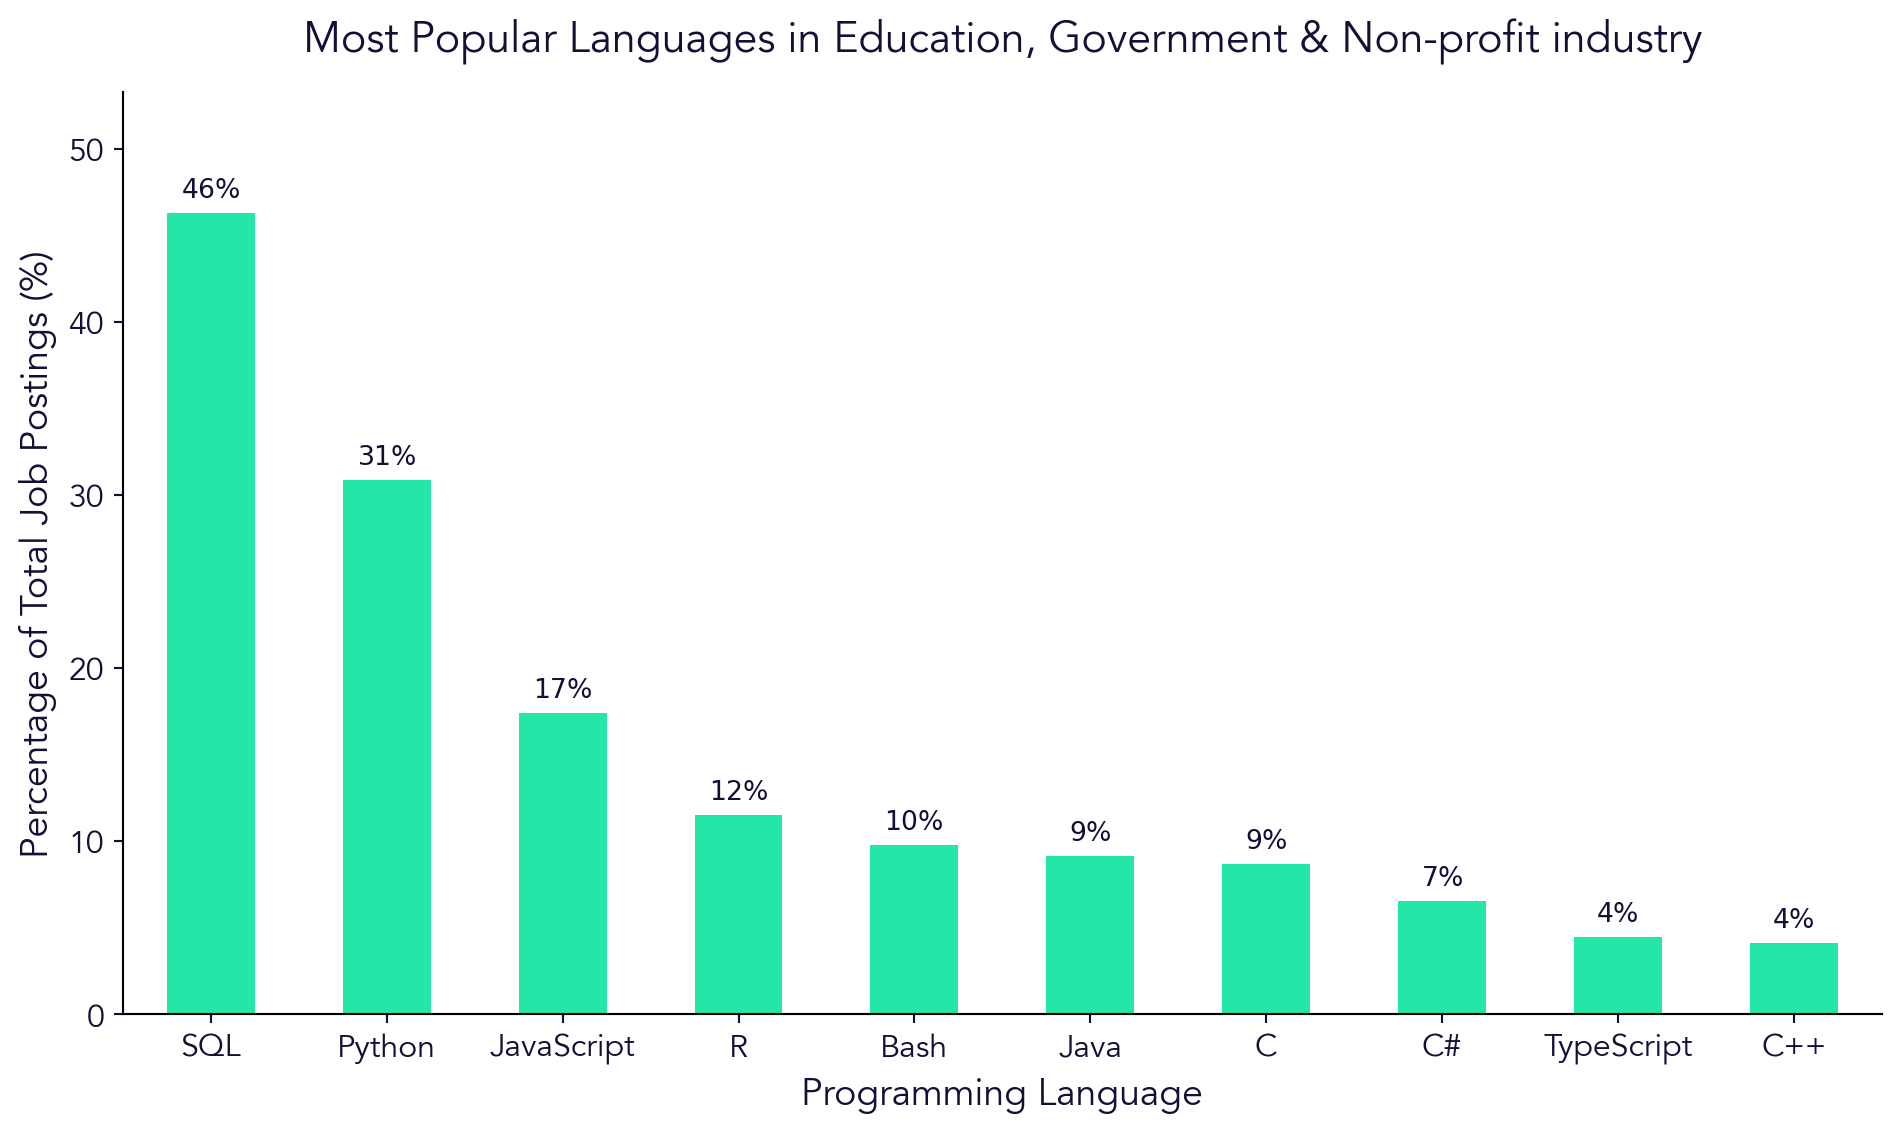

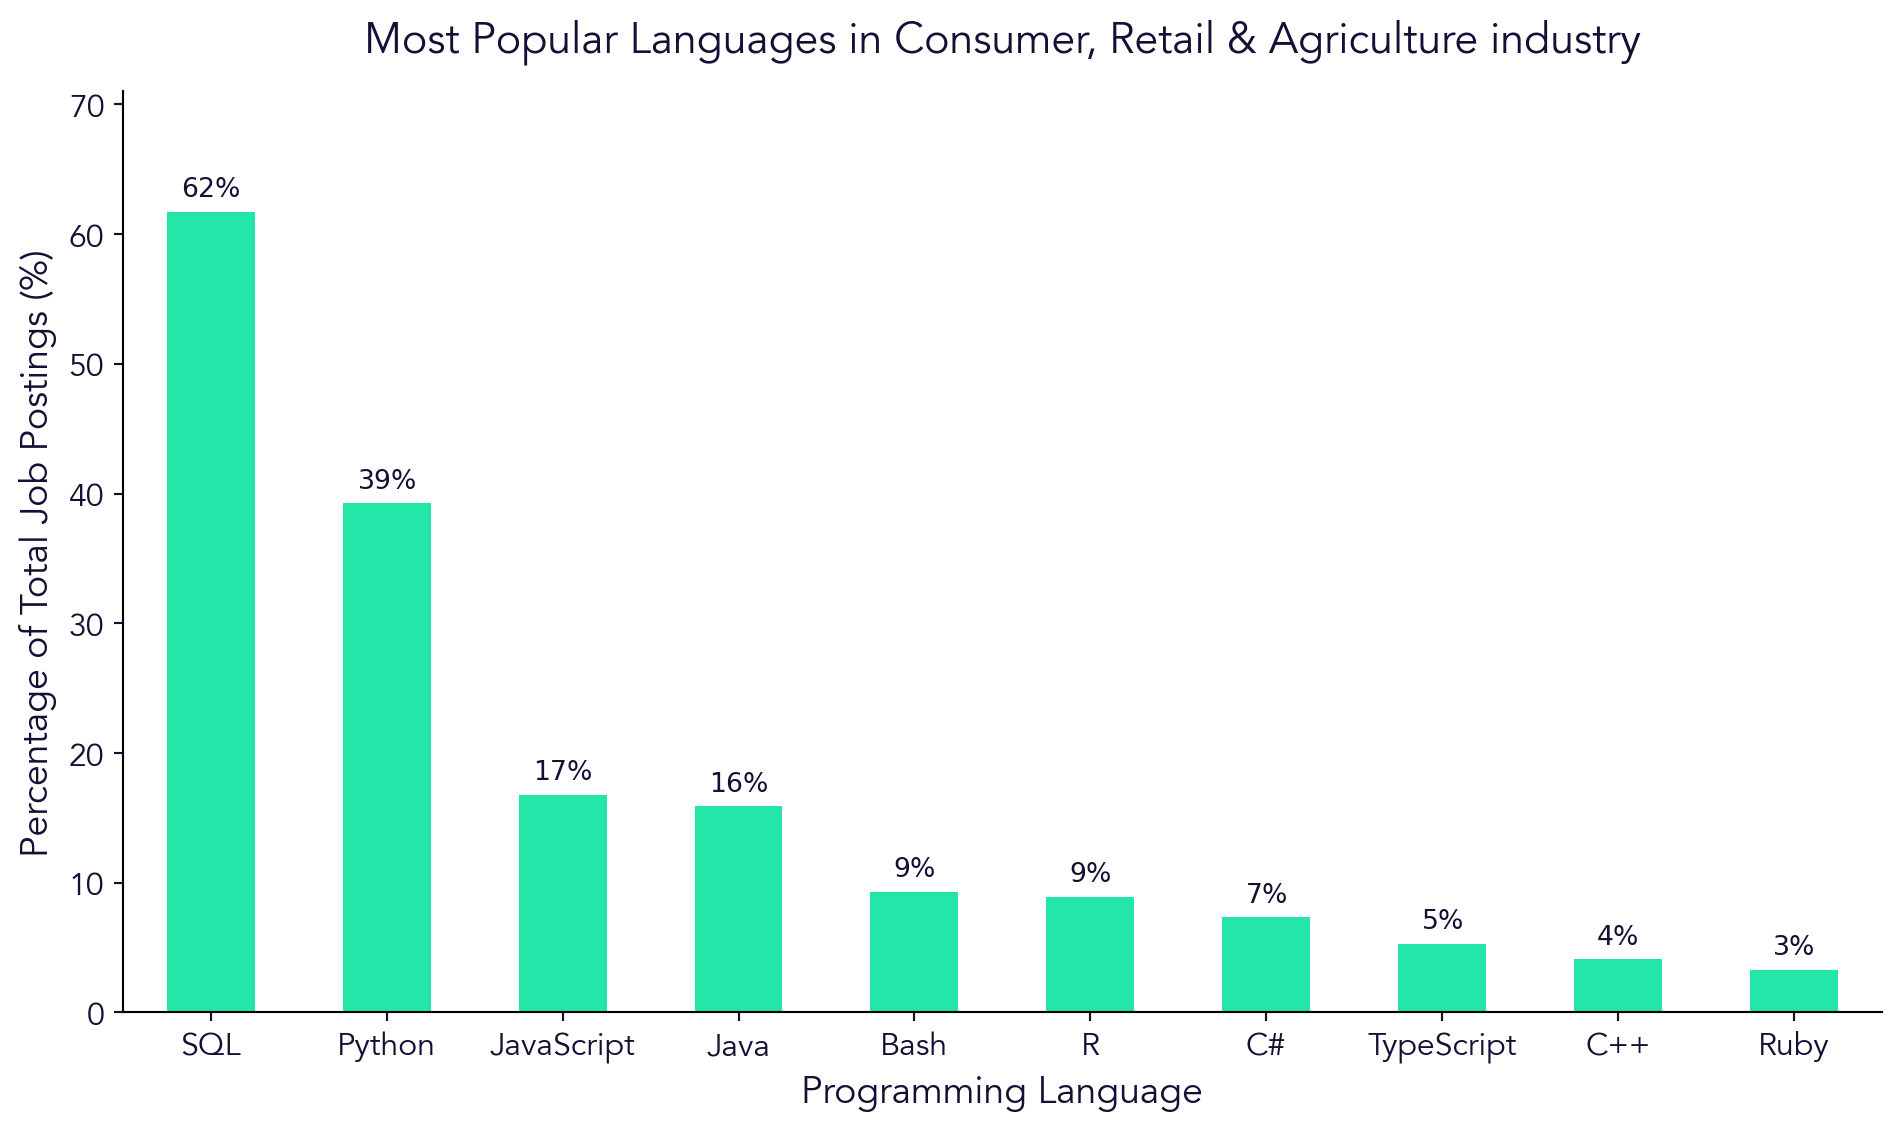

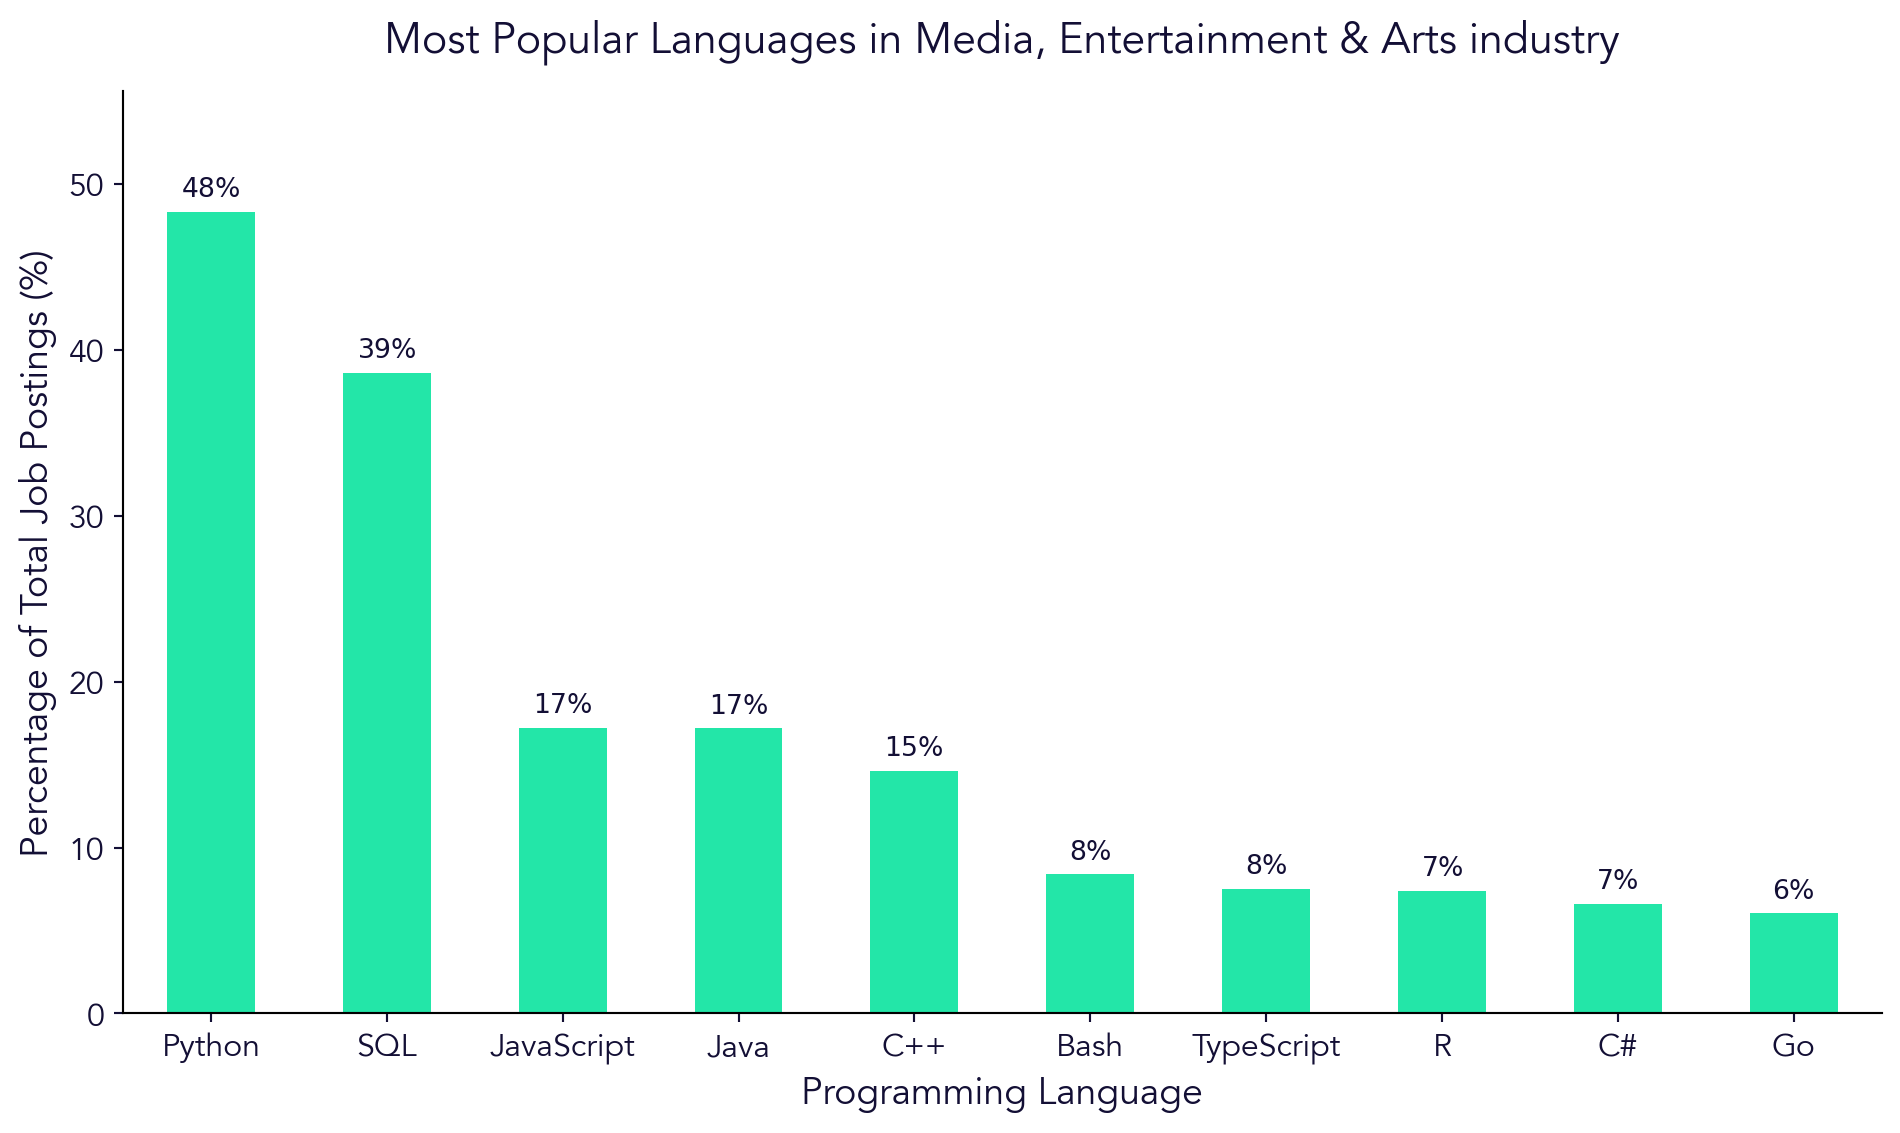

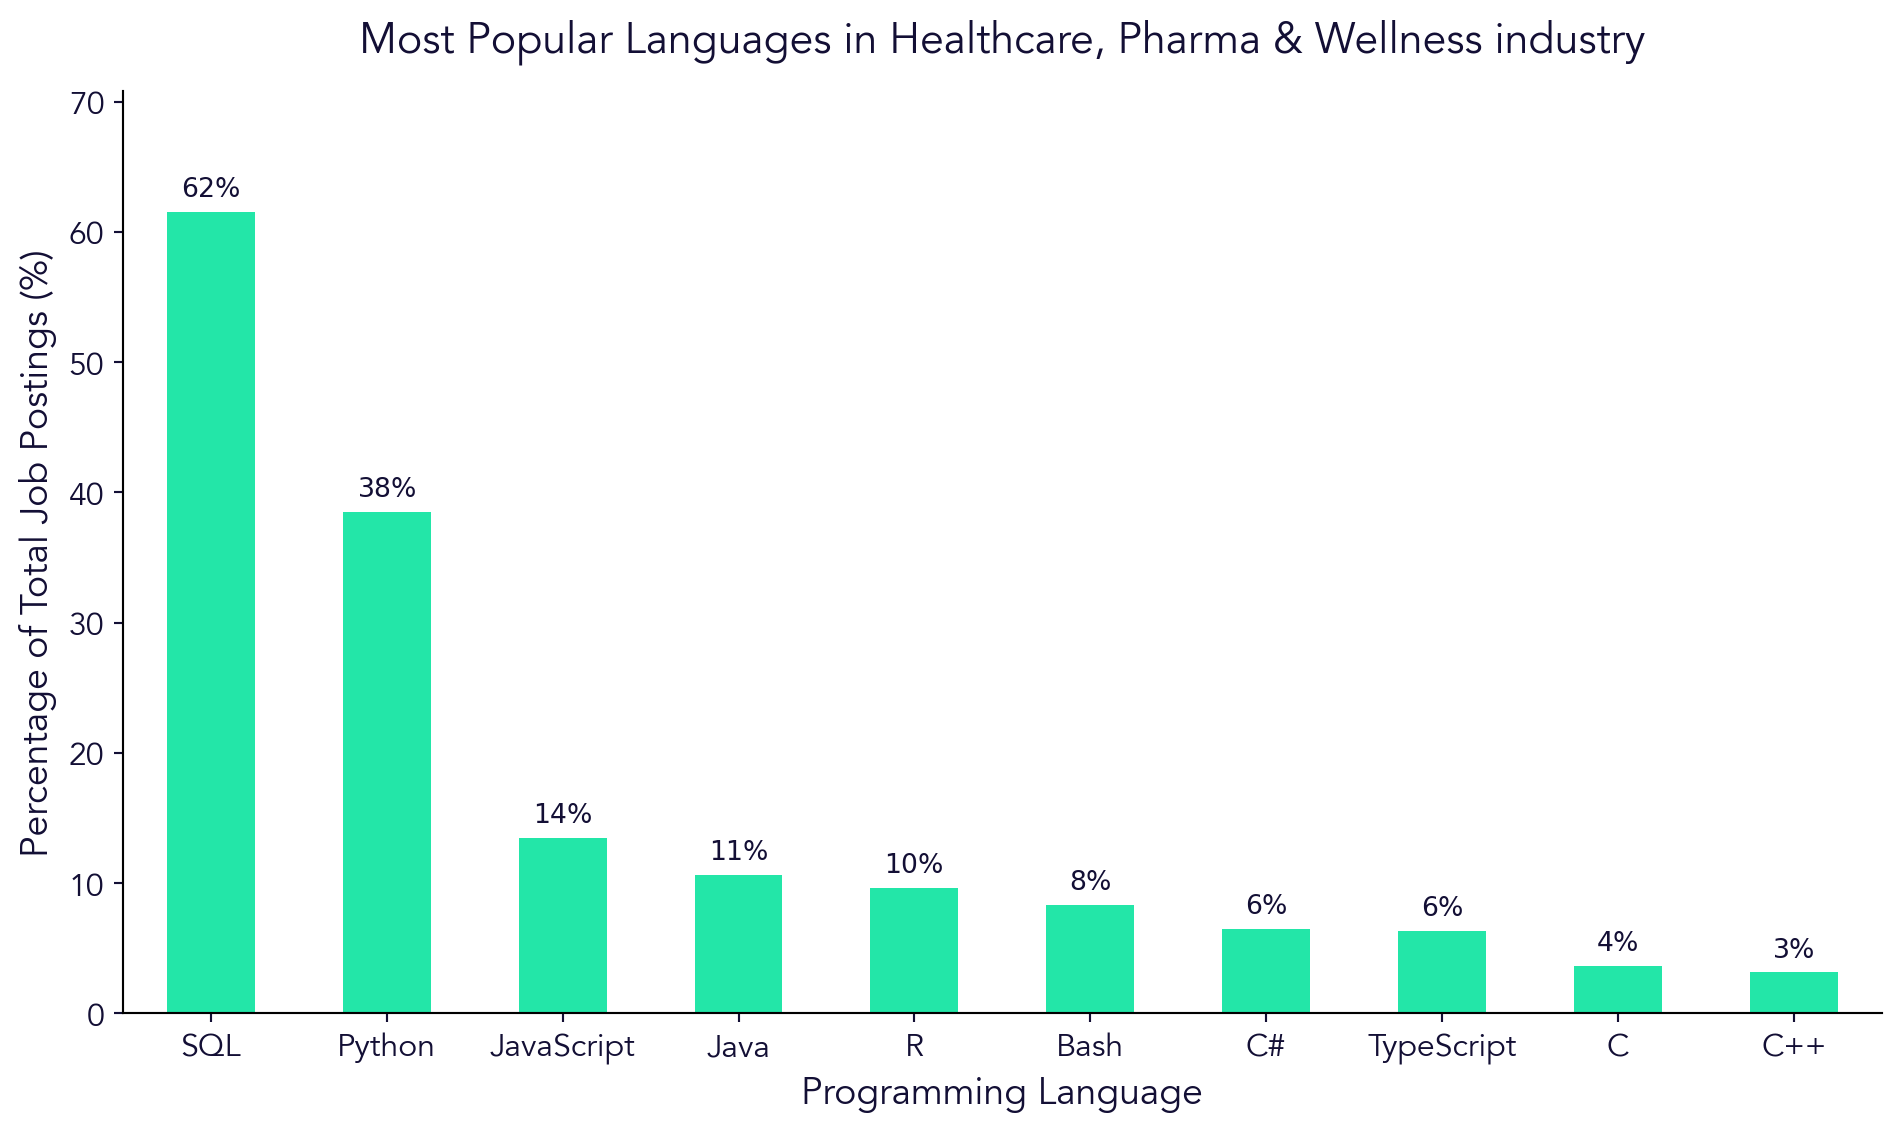

In [23]:
#| include: false
for industry in df["broad_industry_group"].unique().tolist():
    df_industry = df[df["broad_industry_group"] == industry]
    df_top_10_langs_industry = df_industry[prog_languages].sum(axis=0).sort_values(ascending=False)[:10]
    fig, ax = plot_language_market_share(df_industry, prog_languages, multipliers, title = f"Most Popular Languages in {industry} industry")
    fig.savefig(f"../outputs/figures/langs_in_{industry}_industry.png", dpi=600)

### Language Co-occurrence Frequency

In this section, we explore the relationships between different programming languages by analyzing how frequently they are mentioned together within the same job postings. Understanding these pairings provides a clearer picture of the "tech stacks" currently favored by employers in 2025.

Based on the data visualized in @fig-langs-heatmap, the most significant synergy exists between SQL and Python, which appear together in 21% of all job postings. This highlights the standard industry expectation for professionals to combine data retrieval skills with automation and analytical scripting.

Other notable combinations include Java and Python, which co-occur in 11% of listings, often indicating roles involved in large-scale enterprise integration or backend infrastructure. Beyond these primary pairings, other language combinations remain relatively rare, suggesting that most roles are either highly specialized in a specific ecosystem or centered around the dominant Python-SQL core.

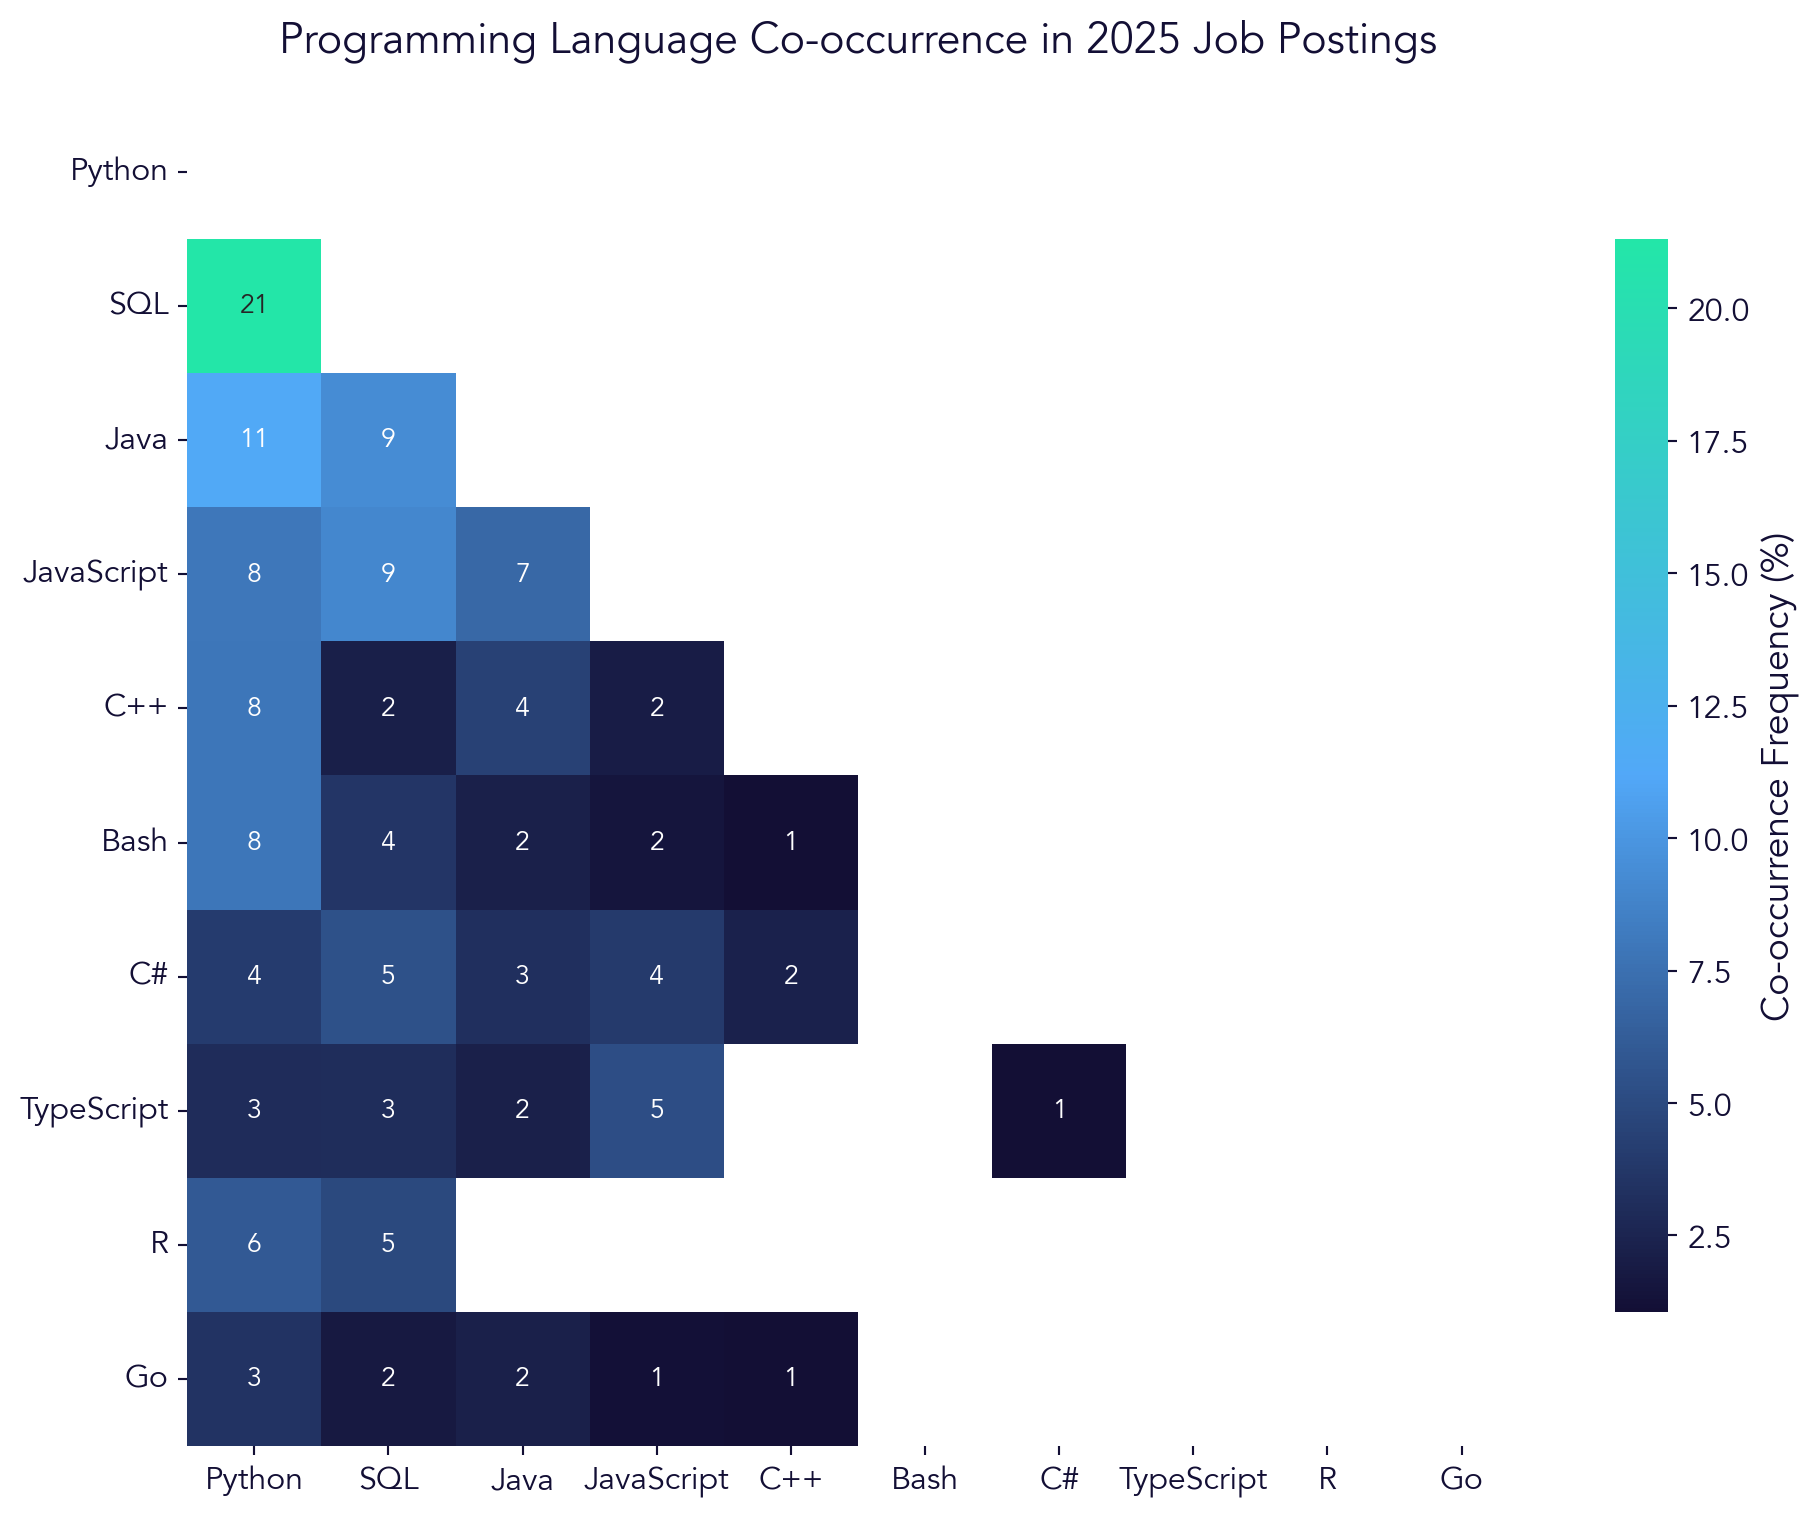

In [24]:
#| label: fig-langs-heatmap
#| fig-cap: "Language co-occurrence heatmap for 2025."
plot_language_distribution_by_language(df, languages=top_10_langs, threshold=1.0)

### The Most in Demand Language by State

In this section, we explore which programming language holds the dominant position within individual states. By identifying the most frequently requested language in each region, we can map out the technical "territories" of the 2025 US job market.

According to the data visualized in @fig-lang-dominance, the national landscape is characterized by a dual dominance of Python and SQL. While SQL is the most popular language in the majority of states—particularly across the Midwest and Southern regions—Python maintains a strong stronghold in specific high-tech corridors. Python is the leading language across the West Coast (California, Oregon, and Washington) and the Northeast/East Coast (New York, Vermont, New Hampshire, Massachusetts, Virginia, and Maryland). Interestingly, Python also takes the top spot in non-contiguous states and specific hubs such as Alabama, Hawaii, and Alaska. This geographic split suggests that while SQL remains the universal standard for data-heavy business operations, Python is the preferred tool for the innovation-heavy clusters on the coasts.

![Most popular programming language by state.](../outputs/figures/us_lang_dominance.png){#fig-lang-dominance width="90%"}




In [25]:
df_dominant = get_dominant_language_by_state(df, prog_languages)
plot_us_language_dominance(df_dominant)

## Market Leader Deep Dive: FAANG and MANGO

The final part of the analysis focuses on the industry giants that often set the trend for the rest of the market. We compare two distinct groups:

**FAANG (Meta, Apple, Amazon, Netflix, Google)**
These established leaders provide a benchmark for high-scale, mature tech environments. We analyze their core language requirements to see which traditional technologies remain dominant.

**MANGO (Microsoft, Apple, Nvidia, Google, OpenAI/Anthropic)**
The MANGO index represents the architects of the current AI era. This section highlights the languages preferred by companies at the forefront of hardware innovation and Large Language Model development. Comparing these groups reveals whether AI-centric firms are pivoting toward newer languages faster than the broader market.

### FAANG

In this section, we examine the hiring patterns of the world’s most influential technology giants. These organizations often set the standard for technical requirements and recruitment volume across the global IT sector.

Based on the data in @fig-dist-faang-companies, Amazon emerges as the clear leader in recruitment volume among the FAANG group, accounting for 39% of all job postings within this elite cohort. Google follows with 24%, while Microsoft represents 15% of the demand. Apple and Meta round out the group with 13% and 10% of the market share, respectively. This distribution highlights Amazon’s aggressive expansion and its significant role as a primary employer for technical talent.

The technical requirements for these companies, as shown in @fig-langs-faang, reflect a heavy emphasis on versatility and systems performance. Python is the undisputed standard, required in 67% of all postings. There is also a notable demand for systems-level and enterprise languages, with C++ mentioned in 42% of roles and Java in 37%. Data management remains a core competency with SQL at 32%, while JavaScript represents 17% of the requirements, primarily for front-end and full-stack engineering positions.

In [26]:
#| include: false
df_fang = create_faang_df(df)
df_fang.head()

,title,manager,engineer,analyst,scientist,developer,company_name,company_industry,state,created_at,...,Scala,Perl,Dart,Bash,Assembly,Go,broad_industry_group,state_clean,state_code,faang_category
0,"Senior Manager, Capacity Engineering, North Am...",1,1,0,0,0,Amazon,Software Development,Tennessee,2025-09-10 20:07:14.383757+00:00,...,0,0,0,0,0,0,"Tech, Data & Telecom",Tennessee,TN,Amazon
172,"Data Engineering Manager, Analytics (Monetizat...",1,1,0,0,0,Meta,Software Development,California,2025-02-12 07:57:01+00:00,...,0,0,0,0,0,0,"Tech, Data & Telecom",California,CA,Meta
323,"Software Engineer - Systems, Multiple Locations",0,1,0,0,0,Microsoft,Software Development,Washington,2025-05-06 06:38:11+00:00,...,0,0,0,0,0,0,"Tech, Data & Telecom",Washington,WA,Microsoft
673,"Business Intelligence Engineer, NA AMZL L D Pr...",0,1,0,0,0,Amazon,Software Development,Tennessee,2025-06-17 11:04:54+00:00,...,0,0,0,0,0,0,"Tech, Data & Telecom",Tennessee,TN,Amazon
902,"Software Engineer, Android",0,1,0,0,0,Meta,Software Development,California,2025-01-21 20:37:05+00:00,...,0,0,0,0,0,0,"Tech, Data & Telecom",California,CA,Meta


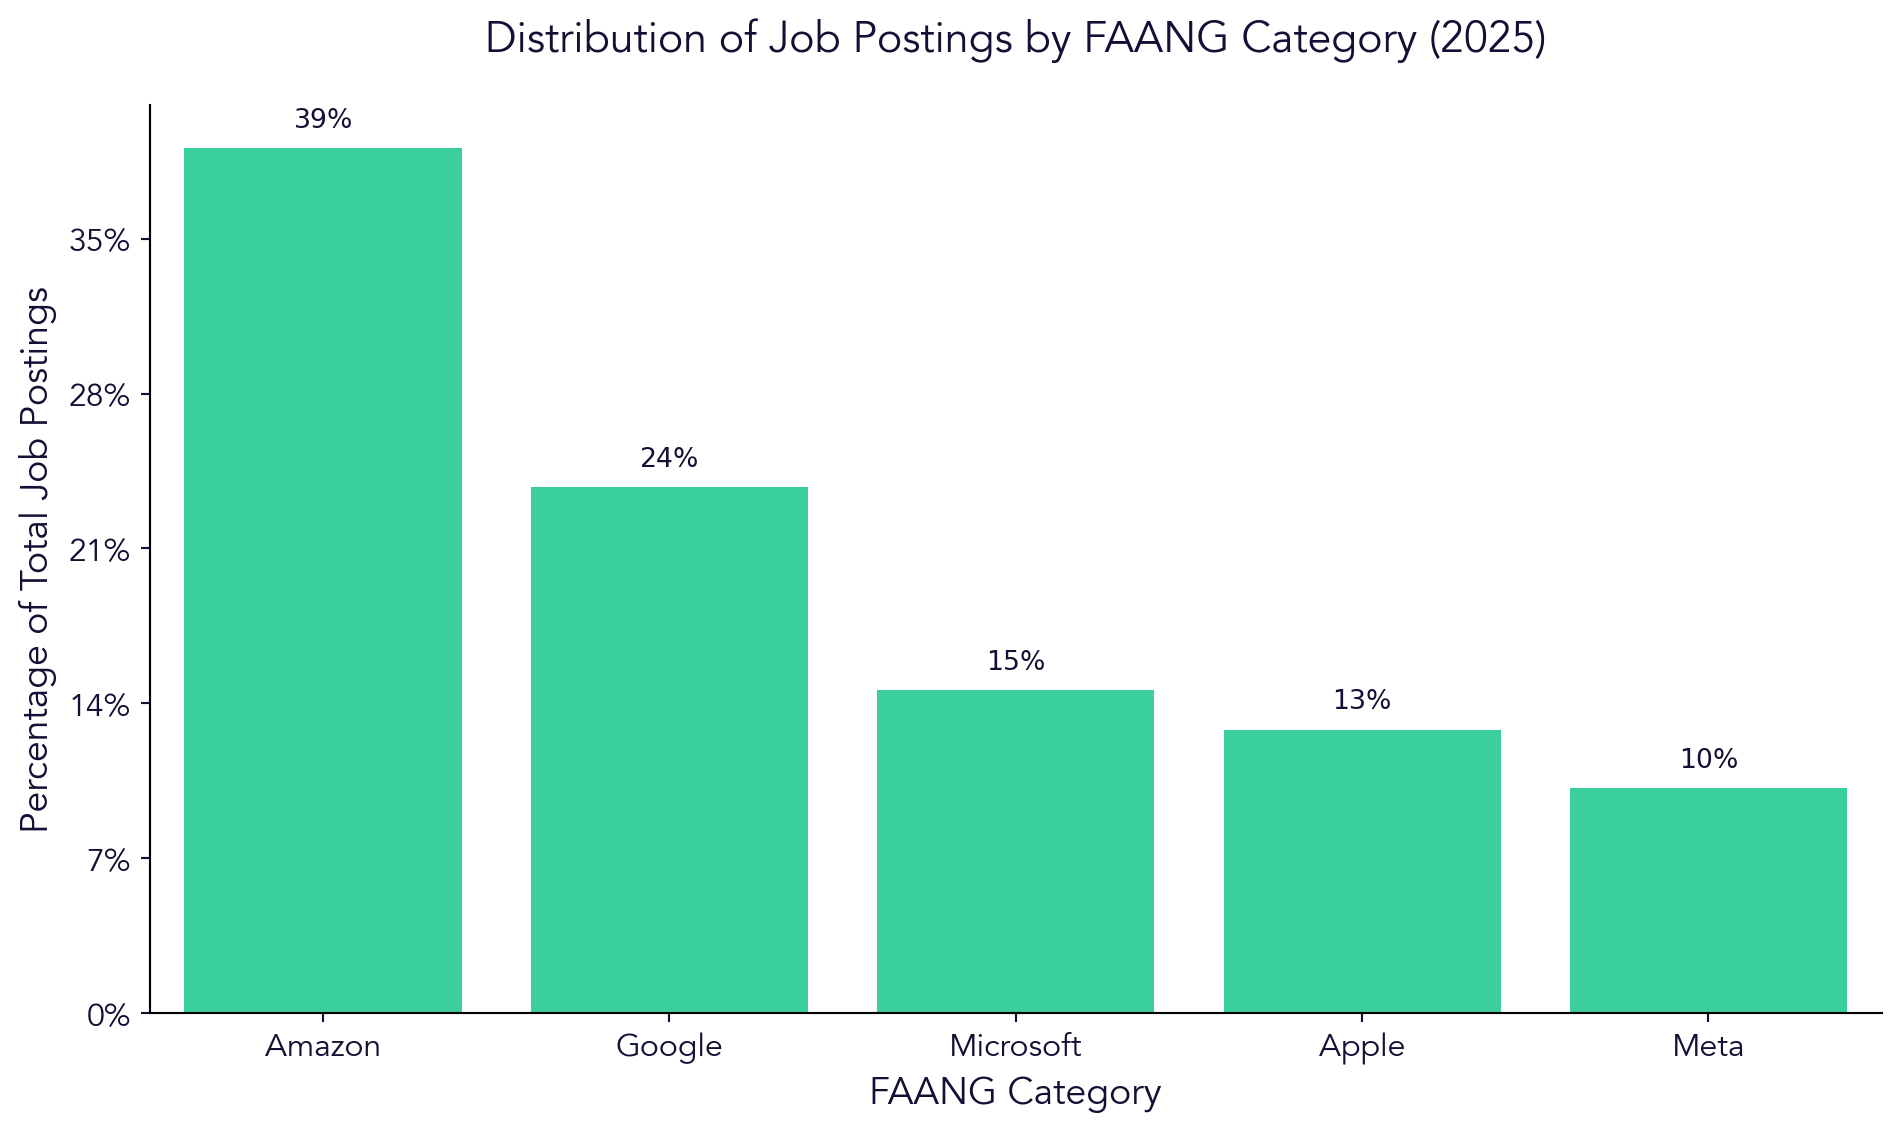

In [27]:
#| label: fig-dist-faang-companies
#| fig-cap: "Distribution of job postings within the FAANG companies."
total_jobs = len(df_fang)
top_categories = df_fang["faang_category"].value_counts().nlargest(15).index
subset = df_fang[df_fang["faang_category"].isin(top_categories)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=subset, 
    x="faang_category", 
    order=top_categories, 
    color="#23E6A8"
)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs
   
    label = f"${percentage:.0f}\\%$"
    
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center", 
        va="bottom",
        xytext=(0, 5), 
        textcoords="offset points",
        fontsize=10,
        fontweight="bold"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%"))

plt.ylabel("Percentage of Total Job Postings")

plt.title("Distribution of Job Postings by FAANG Category (2025)", pad=20)
plt.xlabel("FAANG Category")


plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

(<Figure size 960x576 with 1 Axes>,
 <Axes: title={'center': 'FAANG most wanted programming languages for 2025'}, xlabel='Programming Language', ylabel='Percentage of Total Job Postings (%)'>)

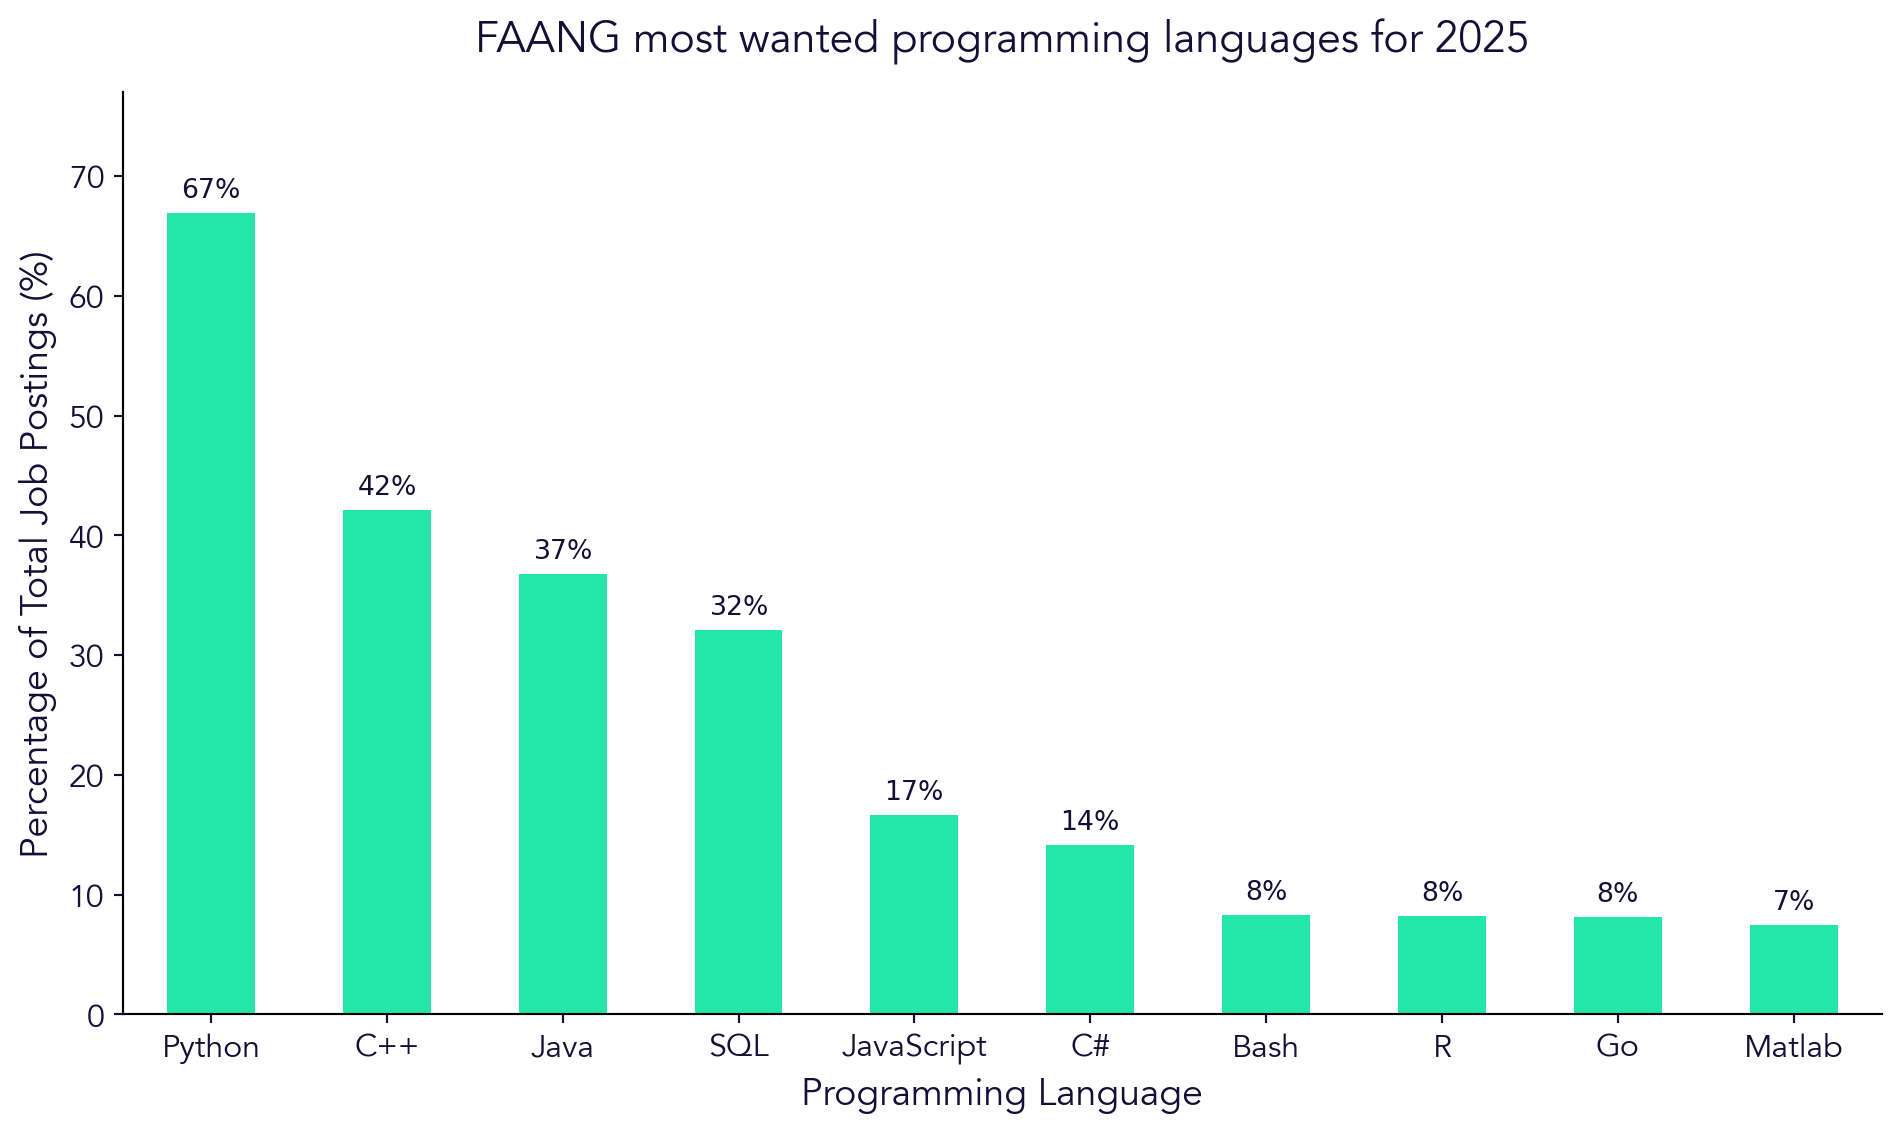

In [28]:
#| label: fig-langs-faang
#| fig-cap: "Distribution of demanded languages within the FAANG companies."

plot_language_market_share(df_fang, prog_languages, multipliers, title="FAANG most wanted programming languages for 2025")

### MANGO

In this section, we pivot our focus to the "MANGO" cohort—Meta, Apple, NVIDIA, Google, and Oracle—representing a more hardware and AI-centric evolution of the traditional tech giants. Analyzing this group allows us to see how the demand for talent shifts when emphasizing cutting-edge infrastructure and silicon innovation.

According to @fig-dist-mango-companies, Google stands as the dominant hiring force in this group, responsible for 34% of the job postings. Microsoft and Apple maintain a strong presence with 19% and 17% respectively, while NVIDIA—fueled by the ongoing AI hardware boom—accounts for 15% of the requirements. Meta occupies a smaller portion of the current hiring landscape at 3%. This distribution underscores a market where established cloud and hardware leaders are currently driving the bulk of new technical opportunities.

The technical stack preferred by these leaders, as seen in @fig-langs-mango, highlights a significant lean toward high-performance computing. Python remains the primary requirement, appearing in 69% of postings. However, the influence of systems engineering is evident in the high demand for C++ (46%), which is considerably higher than the general market average. Java (28%) and SQL (26%) follow as essential enterprise tools, while JavaScript (19%) maintains its necessity for interface and application development.

In [29]:
#| include: false
df_mango = create_mango_df(df)
df_mango.head()

,title,manager,engineer,analyst,scientist,developer,company_name,company_industry,state,created_at,...,Perl,Dart,Bash,Assembly,Go,broad_industry_group,state_clean,state_code,faang_category,mango_category
3,Senior ASIC Synthesis Engineer,0,1,0,0,0,NVIDIA,Computer Hardware Manufacturing,California,2025-07-02 06:12:14+00:00,...,1,0,0,0,0,"Tech, Data & Telecom",California,CA,None,Nvidia
172,"Data Engineering Manager, Analytics (Monetizat...",1,1,0,0,0,Meta,Software Development,California,2025-02-12 07:57:01+00:00,...,0,0,0,0,0,"Tech, Data & Telecom",California,CA,Meta,Meta
323,"Software Engineer - Systems, Multiple Locations",0,1,0,0,0,Microsoft,Software Development,Washington,2025-05-06 06:38:11+00:00,...,0,0,0,0,0,"Tech, Data & Telecom",Washington,WA,Microsoft,Microsoft
902,"Software Engineer, Android",0,1,0,0,0,Meta,Software Development,California,2025-01-21 20:37:05+00:00,...,0,0,0,0,0,"Tech, Data & Telecom",California,CA,Meta,Meta
1035,"Fixed Income Portfolio Analyst, Treasury",0,0,1,0,0,Google,Software Development,New York,2025-09-09 23:25:07.631027+00:00,...,0,0,0,0,0,"Tech, Data & Telecom",New York,NY,Google,Google/DeepMind


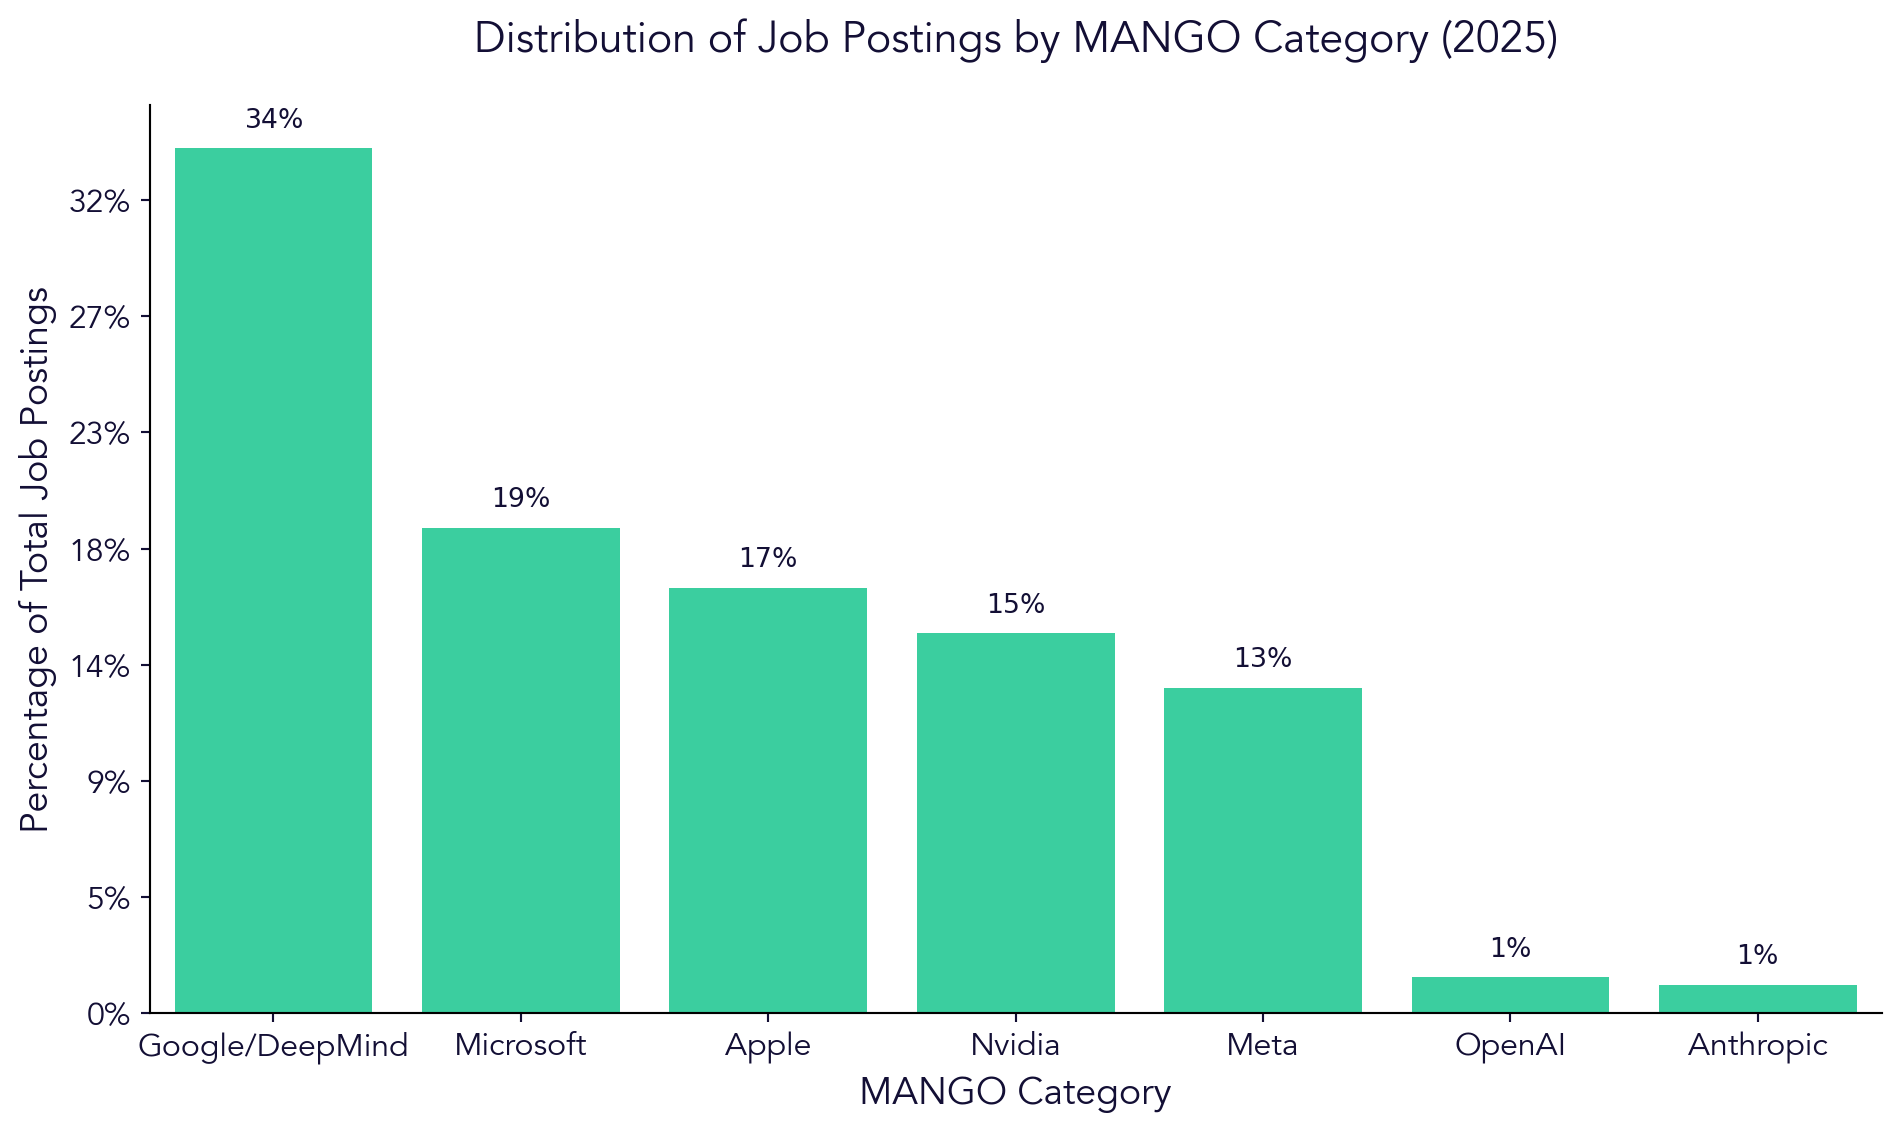

In [30]:
#| label: fig-dist-mango-companies
#| fig-cap: "Distribution of job postings within the MANGO companies."
total_jobs = len(df_mango)
top_categories = df_mango["mango_category"].value_counts().nlargest(15).index
subset = df_mango[df_mango["mango_category"].isin(top_categories)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=subset, 
    x="mango_category", 
    order=top_categories, 
    color="#23E6A8"
)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs
   
    label = f"${percentage:.0f}\\%$"
    
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center", 
        va="bottom",
        xytext=(0, 5), 
        textcoords="offset points",
        fontsize=10,
        fontweight="bold"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%"))

plt.ylabel("Percentage of Total Job Postings")

plt.title("Distribution of Job Postings by MANGO Category (2025)", pad=20)
plt.xlabel("MANGO Category")


plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

(<Figure size 960x576 with 1 Axes>,
 <Axes: title={'center': 'MANGO most wanted programming languages for 2025'}, xlabel='Programming Language', ylabel='Percentage of Total Job Postings (%)'>)

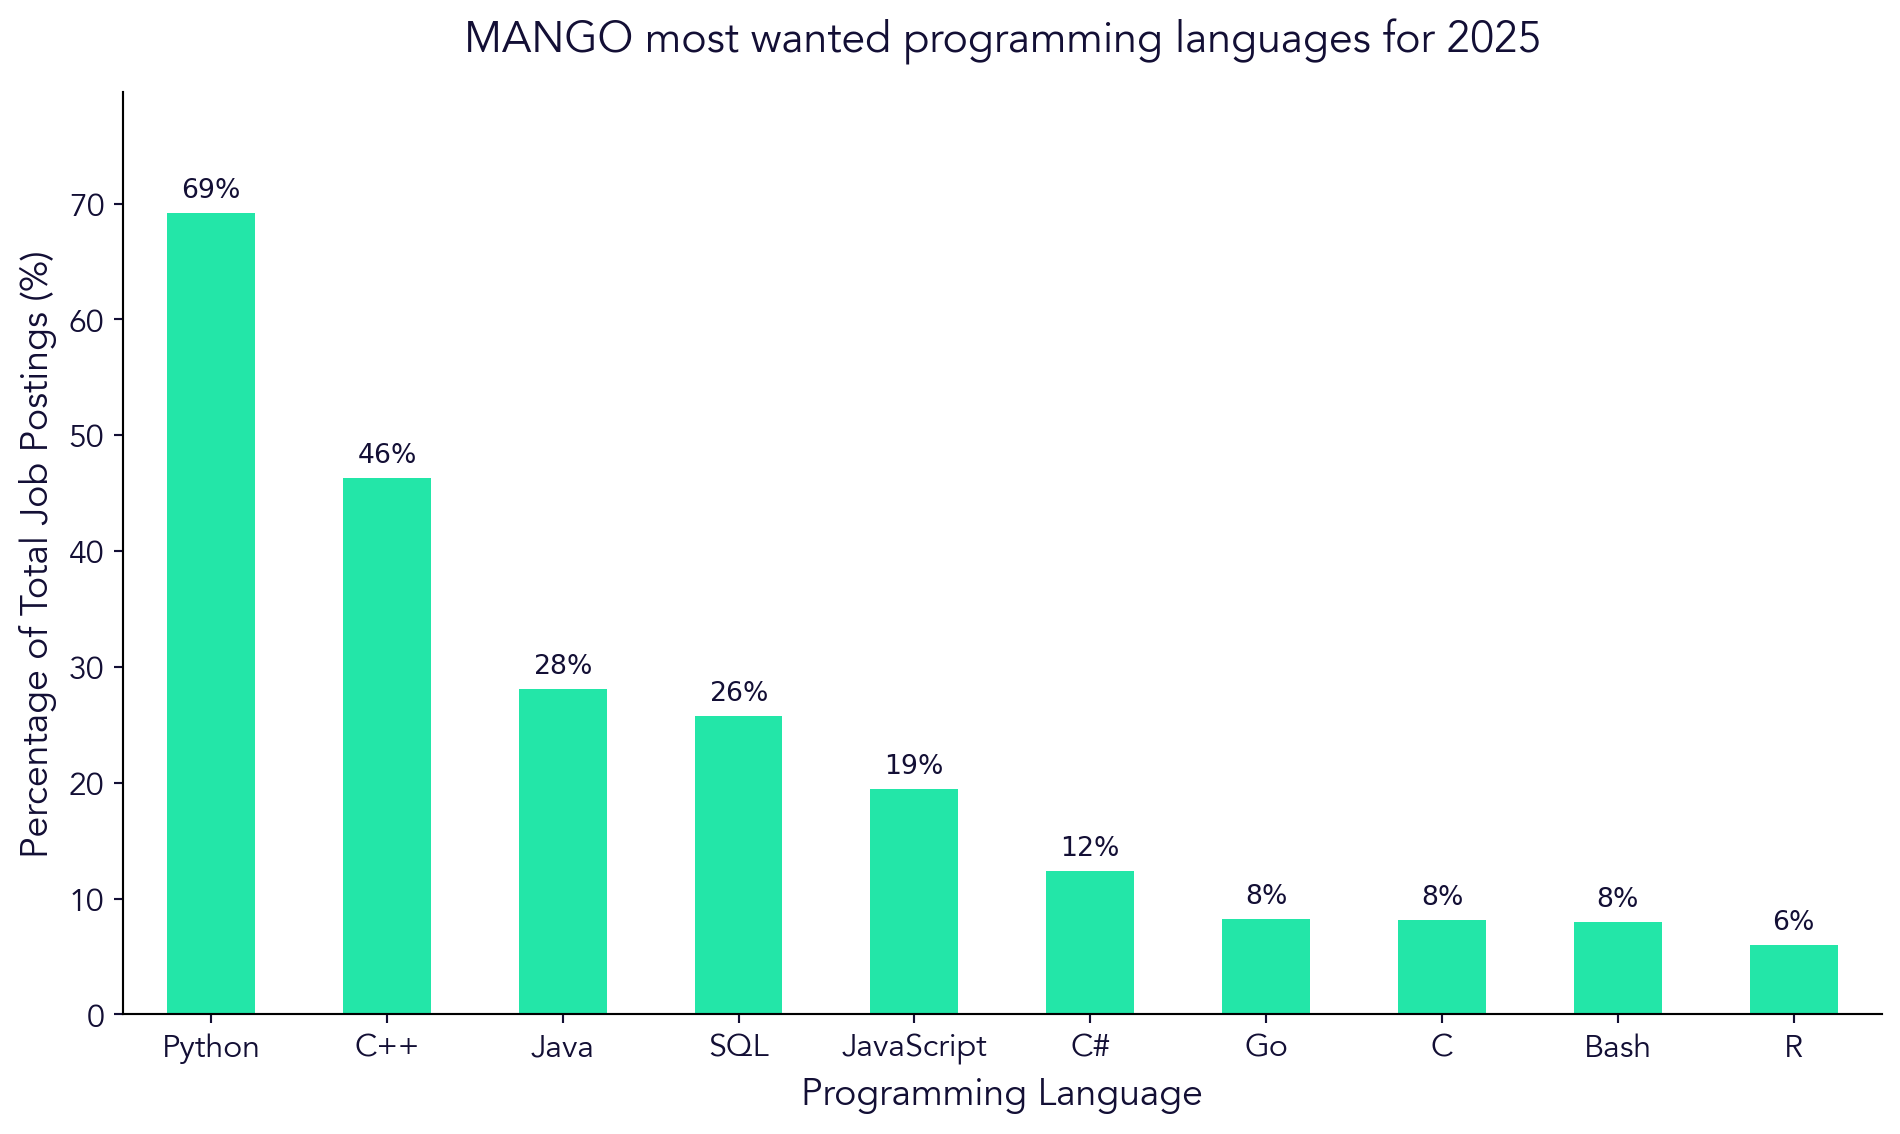

In [31]:
#| label: fig-langs-mango
#| fig-cap: "Distribution of demanded languages within the MANGO companies."
plot_language_market_share(df_mango, prog_languages, multipliers, title="MANGO most wanted programming languages for 2025")

# Key Insights

The Foundational Duo: Python (47%) and SQL (44%) are no longer specialized skills but are instead the baseline requirements for modern technical literacy. Their dominance across industries indicates that automation and data management are core priorities for organizations of all sizes.

Role-Specific Specialization: There is a clear divide in technology stacks between roles. Data Scientists are increasingly expected to master Python and R, whereas Developers and Engineers show a higher requirement for JavaScript, TypeScript, and Java. Analysts remain primarily focused on SQL for data retrieval.

The AI Tech Stack Pivot: The "MANGO" group (Microsoft, Apple, Nvidia, Google, OpenAI/Anthropic) shows a distinct preference for languages that support AI development and hardware optimization, such as Python, C++, and Go, compared to the broader market.

Enterprise Stability: Despite the rise of newer languages, Java and C++ maintain strong double-digit market shares (20.5% and 11.5% respectively), highlighting their continued importance in maintaining legacy systems and performance-critical applications.

Geographic Concentration: Approximately 25% of the analyzed US technical demand is concentrated in just two states—California and Texas—suggesting that despite the rise of remote work, regional tech ecosystems continue to drive the bulk of hiring volume.

# Summary

The 2025 technical job market is characterized by a massive reliance on data processing, automation, and infrastructure maintenance. Through the analysis of over 600,000 job postings, it is evident that Python and SQL have established themselves as the "lingua franca" of the industry, appearing in nearly half of all technical job listings.

While traditional enterprise languages like Java and JavaScript remain vital for web and corporate development, there is a visible shift in the requirements of market-leading organizations. Companies at the forefront of the AI era are prioritizing languages like C++ and Python to build the next generation of hardware and software.

Hiring activity remains concentrated in established technology hubs, with California and Texas leading the demand in the United States. Across different specializations, the "Engineer" category remains the most dominant, representing 59% of the market share. This confirms that companies are prioritizing the foundational technical infrastructure and construction of systems over purely analytical or management roles for the 2025 calendar year.

# Suggestions for Further Improvements

Based on the patterns observed and the performance metrics analyzed, this section outlines potential next steps for refining the data collection process, enhancing the proxy network infrastructure, or expanding the scope of the analysis. These suggestions are intended to maximize efficiency and further optimize the data scraping solutions.